# One Dimensional Sonar

In [124]:
using FFTW
using PyPlot
using SerialPorts
list_serialports()

33-element Array{String,1}:
 "/dev/ttyACM17"
 "/dev/ttyS0"   
 "/dev/ttyS1"   
 "/dev/ttyS10"  
 "/dev/ttyS11"  
 "/dev/ttyS12"  
 "/dev/ttyS13"  
 "/dev/ttyS14"  
 "/dev/ttyS15"  
 "/dev/ttyS16"  
 "/dev/ttyS17"  
 "/dev/ttyS18"  
 "/dev/ttyS19"  
 ⋮              
 "/dev/ttyS27"  
 "/dev/ttyS28"  
 "/dev/ttyS29"  
 "/dev/ttyS3"   
 "/dev/ttyS30"  
 "/dev/ttyS31"  
 "/dev/ttyS4"   
 "/dev/ttyS5"   
 "/dev/ttyS6"   
 "/dev/ttyS7"   
 "/dev/ttyS8"   
 "/dev/ttyS9"   

In [125]:
sp=SerialPort("/dev/ttyACM17", 9600)

SerialPort("/dev/ttyACM17", 9600, 8, "N", 1, nothing, false, false, false, PyObject Serial<id=0x7f3e2eb706a0, open=True>(port='/dev/ttyACM17', baudrate=9600, bytesize=8, parity='N', stopbits=1, timeout=None, xonxoff=False, rtscts=False, dsrdtr=False))

## Chirp Pulse

In [116]:
x_rx=Int16[2067, 2072, 2066, 2067, 2070, 2080, 2074, 2008, 2258, 2456, 2545, 2502, 2339, 2104, 1852, 1659, 1582, 1628, 1794, 2030, 2278, 2468, 2544, 2487, 2322, 2094, 1855, 1678, 1604, 1655, 1803, 2036, 2259, 2430, 2508, 2462, 2316, 2108, 1886, 1716, 1640, 1673, 1807, 2009, 2220, 2386, 2473, 2450, 2326, 2130, 1922, 1750, 1666, 1686, 1805, 1986, 2204, 2364, 2450, 2434, 2318, 2138, 1939, 1777, 1693, 1707, 1819, 1991, 2182, 2332, 2414, 2399, 2297, 2136, 1957, 1813, 1737, 1753, 1843, 1993, 2158, 2291, 2360, 2352, 2269, 2136, 1989, 1866, 1797, 1803, 1874, 1987, 2125, 2240, 2304, 2306, 2248, 2142, 2024, 1921, 1851, 1841, 1893, 1983, 2095, 2208, 2263, 2273, 2229, 2145, 2044, 1950, 1893, 1876, 1912, 1986, 2079, 2167, 2221, 2235, 2205, 2138, 2057, 1977, 1926, 1914, 1941, 1995, 2070, 2132, 2192, 2194, 2174, 2123, 2062, 2008, 1967, 1955, 1973, 2014, 2062, 2111, 2165, 2158, 2143, 2114, 2076, 2037, 2009, 1994, 1998, 2017, 2046, 2080, 2107, 2110, 2127, 2118, 2091, 2065, 2042, 2020, 2013, 2018, 2035, 2059, 2084, 2105, 2116, 2112, 2101, 2076, 2052, 2034, 2026, 2026, 2036, 2050, 2070, 2088, 2110, 2099, 2091, 2080, 2067, 2059, 2049, 2046, 2043, 2047, 2055, 2064, 2074, 2085, 2090, 2097, 2096, 2086, 2070, 2053, 2037, 2029, 2032, 2041, 2062, 2103, 2105, 2111, 2113, 2098, 2078, 2048, 2028, 2015, 2020, 2036, 2059, 2087, 2109, 2119, 2116, 2098, 2073, 2053, 2031, 2021, 2019, 2032, 2054, 2079, 2098, 2113, 2114, 2108, 2086, 2064, 2041, 2024, 2015, 2023, 2042, 2065, 2094, 2116, 2127, 2125, 2102, 2076, 2046, 2021, 2004, 2007, 2022, 2059, 2093, 2121, 2139, 2133, 2110, 2076, 2039, 2009, 1993, 1997, 2024, 2062, 2097, 2125, 2140, 2132, 2108, 2070, 2037, 2008, 1993, 2000, 2023, 2058, 2102, 2120, 2128, 2132, 2108, 2078, 2046, 2017, 2003, 2001, 2017, 2045, 2078, 2107, 2134, 2138, 2121, 2089, 2058, 2022, 2002, 1990, 2006, 2037, 2073, 2112, 2134, 2146, 2134, 2098, 2057, 2019, 1993, 1987, 2003, 2034, 2075, 2116, 2142, 2152, 2134, 2097, 2054, 2019, 1995, 1989, 2006, 2040, 2076, 2111, 2136, 2142, 2144, 2099, 2060, 2028, 2003, 1994, 2005, 2030, 2063, 2098, 2125, 2138, 2131, 2110, 2075, 2041, 2012, 1995, 1998, 2018, 2052, 2090, 2119, 2141, 2138, 2113, 2084, 2040, 2008, 1990, 1993, 2013, 2050, 2088, 2121, 2142, 2134, 2117, 2084, 2045, 2010, 1993, 1997, 2014, 2052, 2084, 2115, 2134, 2132, 2113, 2096, 2052, 2024, 2006, 2004, 2020, 2042, 2073, 2099, 2123, 2129, 2120, 2099, 2069, 2037, 2014, 2002, 2010, 2032, 2060, 2092, 2117, 2128, 2127, 2107, 2078, 2045, 2019, 2002, 2005, 2024, 2057, 2088, 2116, 2131, 2126, 2112, 2078, 2050, 2023, 2005, 2008, 2027, 2055, 2085, 2110, 2114, 2132, 2110, 2085, 2060, 2031, 2020, 2015, 2024, 2051, 2071, 2097, 2111, 2140, 2114, 2096, 2075, 2046, 2023, 2014, 2017, 2034, 2062, 2088, 2110, 2124, 2110, 2110, 2083, 2057, 2029, 2009, 2010, 2023, 2053, 2083, 2111, 2125, 2125, 2110, 2085, 2060, 2026, 2013, 2008, 2022, 2048, 2077, 2103, 2120, 2122, 2110, 2092, 2065, 2037, 2017, 2013, 2019, 2039, 2068, 2090, 2113, 2122, 2116, 2100, 2076, 2052, 2020, 2014, 2009, 2028, 2053, 2086, 2108, 2121, 2121, 2111, 2086, 2056, 2023, 2010, 2007, 2018, 2050, 2080, 2112, 2128, 2128, 2117, 2090, 2057, 2029, 2008, 2004, 2020, 2043, 2075, 2103, 2124, 2127, 2116, 2092, 2061, 2033, 2012, 2008, 2016, 2037, 2068, 2093, 2120, 2127, 2120, 2097, 2075, 2041, 2021, 2009, 2011, 2030, 2060, 2088, 2114, 2129, 2127, 2109, 2080, 2046, 2020, 1999, 2004, 2021, 2051, 2084, 2117, 2132, 2127, 2111, 2078, 2047, 2017, 2002, 2003, 2020, 2048, 2086, 2114, 2130, 2129, 2120, 2086, 2052, 2023, 2006, 2000, 2016, 2047, 2079, 2106, 2132, 2129, 2116, 2085, 2059, 2030, 2011, 2004, 2014, 2040, 2067, 2098, 2119, 2129, 2125, 2100, 2069, 2034, 2017, 1997, 2002, 2029, 2060, 2093, 2121, 2135, 2128, 2104, 2071, 2035, 2009, 1997, 2006, 2031, 2063, 2097, 2125, 2135, 2128, 2106, 2075, 2038, 2015, 2004, 2011, 2030, 2057, 2088, 2115, 2131, 2124, 2108, 2080, 2049, 2020, 2006, 2007, 2024, 2051, 2081, 2110, 2124, 2128, 2114, 2090, 2053, 2025, 2007, 2003, 2018, 2039, 2077, 2108, 2126, 2134, 2119, 2094, 2060, 2028, 2005, 2001, 2016, 2044, 2072, 2105, 2127, 2132, 2114, 2092, 2060, 2029, 2007, 2005, 2016, 2040, 2076, 2100, 2116, 2127, 2116, 2094, 2066, 2037, 2018, 2003, 2015, 2035, 2066, 2094, 2116, 2124, 2119, 2104, 2072, 2046, 2021, 2007, 2011, 2026, 2056, 2092, 2105, 2124, 2125, 2108, 2079, 2049, 2020, 2005, 2007, 2024, 2054, 2087, 2113, 2127, 2128, 2108, 2082, 2051, 2023, 2011, 2010, 2027, 2052, 2082, 2105, 2124, 2122, 2107, 2082, 2054, 2032, 2015, 2012, 2023, 2048, 2075, 2102, 2120, 2123, 2112, 2092, 2065, 2040, 2018, 2013, 2018, 2042, 2064, 2095, 2116, 2125, 2119, 2100, 2066, 2039, 2015, 2012, 2016, 2036, 2064, 2094, 2115, 2123, 2118, 2099, 2072, 2044, 2020, 2008, 2016, 2035, 2062, 2090, 2111, 2114, 2117, 2098, 2072, 2044, 2026, 2017, 2018, 2034, 2057, 2083, 2103, 2119, 2118, 2103, 2081, 2059, 2034, 2017, 2019, 2029, 2050, 2074, 2100, 2116, 2113, 2110, 2089, 2061, 2036, 2019, 2014, 2024, 2043, 2070, 2097, 2115, 2124, 2110, 2090, 2061, 2035, 2021, 2016, 2023, 2051, 2073, 2093, 2113, 2119, 2105, 2092, 2067, 2046, 2026, 2019, 2025, 2042, 2060, 2088, 2104, 2116, 2114, 2098, 2073, 2052, 2031, 2021, 2022, 2036, 2069, 2090, 2103, 2115, 2114, 2114, 2081, 2055, 2034, 2025, 2021, 2031, 2051, 2079, 2103, 2116, 2117, 2106, 2082, 2057, 2036, 2021, 2022, 2030, 2051, 2074, 2095, 2116, 2118, 2106, 2084, 2062, 2045, 2023, 2024, 2030, 2047, 2069, 2088, 2106, 2109, 2110, 2090, 2073, 2050, 2032, 2024, 2029, 2042, 2061, 2086, 2100, 2109, 2108, 2097, 2092, 2053, 2034, 2021, 2023, 2037, 2051, 2077, 2098, 2109, 2111, 2101, 2080, 2057, 2033, 2022, 2020, 2031, 2053, 2076, 2097, 2111, 2112, 2100, 2085, 2063, 2044, 2026, 2024, 2034, 2048, 2072, 2090, 2104, 2110, 2103, 2088, 2071, 2051, 2036, 2025, 2032, 2044, 2064, 2082, 2100, 2106, 2106, 2093, 2076, 2064, 2036, 2023, 2026, 2035, 2055, 2080, 2100, 2108, 2107, 2097, 2081, 2061, 2033, 2028, 2028, 2037, 2055, 2076, 2096, 2105, 2107, 2099, 2082, 2062, 2044, 2032, 2029, 2035, 2052, 2070, 2089, 2100, 2104, 2100, 2085, 2067, 2047, 2036, 2029, 2032, 2049, 2065, 2085, 2108, 2104, 2101, 2090, 2069, 2053, 2033, 2029, 2031, 2043, 2060, 2079, 2095, 2115, 2105, 2091, 2076, 2059, 2043, 2031, 2030, 2040, 2057, 2079, 2097, 2105, 2095, 2096, 2079, 2060, 2046, 2030, 2033, 2042, 2056, 2076, 2096, 2101, 2102, 2096, 2080, 2064, 2047, 2042, 2037, 2043, 2053, 2066, 2086, 2098, 2102, 2095, 2079, 2066, 2053, 2036, 2032, 2037, 2050, 2065, 2085, 2093, 2098, 2094, 2085, 2069, 2047, 2040, 2036, 2037, 2050, 2068, 2082, 2094, 2098, 2095, 2087, 2067, 2050, 2040, 2036, 2040, 2052, 2067, 2080, 2093, 2096, 2092, 2083, 2067, 2054, 2045, 2038, 2044, 2052, 2063, 2078, 2091, 2095, 2095, 2085, 2071, 2057, 2046, 2044, 2043, 2049, 2063, 2078, 2090, 2096, 2093, 2089, 2076, 2060, 2046, 2040, 2040, 2051, 2063, 2078, 2089, 2095, 2096, 2088, 2074, 2059, 2046, 2037, 2041, 2052, 2061, 2080, 2090, 2092, 2091, 2085, 2068, 2060, 2048, 2042, 2041, 2052, 2061, 2071, 2081, 2090, 2089, 2084, 2073, 2058, 2048, 2042, 2043, 2050, 2062, 2069, 2084, 2090, 2091, 2084, 2076, 2062, 2050, 2043, 2041, 2048, 2061, 2074, 2086, 2092, 2091, 2086, 2076, 2073, 2050, 2039, 2040, 2047, 2062, 2073, 2085, 2094, 2093, 2084, 2072, 2062, 2054, 2040, 2044, 2048, 2061, 2075, 2087, 2095, 2093, 2085, 2077, 2062, 2050, 2038, 2047, 2049, 2058, 2073, 2085, 2084, 2091, 2087, 2076, 2063, 2053, 2044, 2042, 2048, 2054, 2068, 2081, 2095, 2095, 2091, 2078, 2065, 2052, 2043, 2042, 2044, 2059, 2067, 2081, 2093, 2090, 2091, 2078, 2063, 2052, 2045, 2043, 2040, 2053, 2070, 2086, 2094, 2095, 2092, 2079, 2066, 2054, 2045, 2040, 2046, 2056, 2067, 2082, 2092, 2094, 2091, 2082, 2068, 2054, 2044, 2038, 2047, 2048, 2066, 2082, 2090, 2094, 2095, 2087, 2072, 2058, 2044, 2039, 2043, 2051, 2064, 2079, 2093, 2098, 2097, 2087, 2071, 2057, 2041, 2038, 2041, 2049, 2065, 2081, 2093, 2100, 2093, 2091, 2073, 2056, 2040, 2038, 2039, 2049, 2061, 2078, 2093, 2100, 2095, 2089, 2091, 2057, 2044, 2037, 2037, 2046, 2059, 2075, 2089, 2095, 2099, 2092, 2079, 2063, 2045, 2035, 2035, 2037, 2057, 2075, 2092, 2099, 2099, 2093, 2080, 2078, 2044, 2035, 2030, 2042, 2054, 2069, 2091, 2100, 2097, 2093, 2079, 2063, 2048, 2036, 2032, 2041, 2054, 2072, 2088, 2099, 2101, 2094, 2081, 2066, 2061, 2038, 2034, 2038, 2052, 2070, 2086, 2098, 2100, 2096, 2081, 2068, 2053, 2040, 2028, 2039, 2048, 2031, 2078, 2096, 2103, 2100, 2085, 2069, 2052, 2041, 2034, 2037, 2048, 2063, 2081, 2100, 2102, 2098, 2084, 2069, 2052, 2041, 2035, 2037, 2047, 2061, 2080, 2093, 2098, 2096, 2088, 2071, 2055, 2044, 2042, 2038, 2044, 2059, 2077, 2089, 2098, 2096, 2093, 2076, 2060, 2043, 2040, 2039, 2044, 2056, 2073, 2088, 2096, 2096, 2091, 2076, 2062, 2048, 2040, 2033, 2044, 2055, 2071, 2087, 2095, 2097, 2093, 2078, 2065, 2052, 2041, 2037, 2043, 2055, 2070, 2085, 2093, 2095, 2091, 2080, 2066, 2054, 2044, 2042, 2059, 2056, 2067, 2077, 2089, 2095, 2091, 2084, 2070, 2056, 2050, 2041, 2047, 2055, 2066, 2078, 2087, 2093, 2093, 2085, 2073, 2060, 2051, 2044, 2044, 2065, 2062, 2073, 2082, 2089, 2090, 2083, 2075, 2063, 2050, 2044, 2043, 2049, 2063, 2071, 2080, 2088, 2093, 2086, 2077, 2064, 2056, 2049, 2048, 2051, 2058, 2069, 2076, 2081, 2087, 2084, 2080, 2072, 2061, 2053, 2049, 2050, 2058, 2064, 2070, 2045, 2076, 2083, 2081, 2074, 2064, 2054, 2051, 2048, 2054, 2068, 2072, 2077, 2076, 2087, 2083, 2077, 2066, 2058, 2053, 2049, 2052, 2060, 2066, 2075, 2079, 2085, 2074, 2078, 2067, 2062, 2055, 2054, 2054, 2059, 2069, 2072, 2081, 2083, 2083, 2081, 2072, 2066, 2062, 2058, 2055, 2057, 2065, 2069, 2075, 2077, 2080, 2080, 2078, 2070, 2066, 2057, 2057, 2057, 2062, 2064, 2073, 2077, 2082, 2084, 2078, 2073, 2067, 2057, 2056, 2055, 2057, 2065, 2073, 2073, 2080, 2078, 2081, 2078, 2070, 2065, 2059, 2056, 2056, 2063, 2084, 2072, 2076, 2079, 2077, 2080, 2073, 2067, 2060, 2057, 2057, 2059, 2063, 2071, 2072, 2076, 2082, 2079, 2080, 2070, 2063, 2060, 2057, 2056, 2062, 2081, 2072, 2076, 2078, 2078, 2074, 2071, 2065, 2058, 2056, 2059, 2062, 2066, 2071, 2074, 2076, 2079, 2077, 2073, 2070, 2064, 2063, 2061, 2055, 2064, 2075, 2071, 2075, 2076, 2074, 2083, 2066, 2066, 2064, 2057, 2057, 2060, 2065, 2068, 2071, 2079, 2080, 2077, 2081, 2068, 2063, 2060, 2058, 2058, 2060, 2071, 2071, 2072, 2079, 2080, 2076, 2071, 2070, 2062, 2060, 2059, 2064, 2068, 2071, 2074, 2075, 2076, 2075, 2071, 2070, 2065, 2061, 2060, 2059, 2061, 2066 , 2071, 2077, 2075, 2076, 2074, 2069, 2064, 2066, 2063, 2058, 2063, 2066, 2070, 2075, 2075, 2076, 2074, 2072, 2063, 2063, 2057, 2058, 2062, 2061, 2075, 2071, 2076, 2075, 2074, 2071, 2069, 2066, 2061, 2062, 2061, 2062, 2068, 2070, 2075, 2074, 2075, 2072, 2072, 2067, 2064, 2063, 2061, 2064, 2065, 2068, 2071, 2075, 2077, 2074, 2073, 2071, 2065, 2062, 2062, 2061, 2063, 2070, 2073, 2075, 2075, 2076, 2072, 2070, 2069, 2064, 2065, 2072, 2065, 2068, 2082, 2072, 2072, 2075, 2077, 2068, 2069, 2064, 2064, 2055, 2065, 2066, 2071, 2072, 2072, 2072, 2073, 2072, 2068, 2066, 2071, 2064, 2063, 2060, 2065, 2085, 2072, 2074, 2073, 2070, 2068, 2066, 2066, 2063, 2065, 2067, 2067, 2071, 2072, 2074, 2074, 2072, 2068, 2068, 2067, 2065, 2064, 2065, 2068, 2069, 2086, 2073, 2070, 2071, 2069, 2068, 2067, 2065, 2061, 2062, 2062, 2068, 2070, 2072, 2074, 2076, 2070, 2072, 2068, 2065, 2065, 2065, 2066, 2062, 2069, 2086, 2073, 2069, 2068, 2069, 2068, 2064, 2064, 2066, 2062, 2065, 2068, 2069, 2069, 2066, 2069, 2069, 2066, 2066, 2066, 2065, 2065, 2066, 2066, 2067, 2084, 2069, 2067, 2068, 2067, 2067, 2067, 2065, 2066, 2068, 2065, 2066, 2068, 2080, 2068, 2064, 2067, 2068, 2067, 2067, 2066, 2065, 2068, 2064, 2068, 2073, 2072, 2067, 2066, 2066, 2068, 2066, 2066, 2063, 2062, 2064, 2067, 2070, 2067, 2069, 2067, 2070, 2069, 2069, 2068, 2066, 2067, 2066, 2066, 2068, 2068, 2064, 2065, 2068, 2064, 2068, 2066, 2066, 2066, 2061, 2066, 2065, 2067, 2067, 2065, 2066, 2071, 2070, 2069, 2070, 2068, 2069, 2065, 2064, 2068, 2080, 2068, 2068, 2068, 2069, 2066, 2069, 2068, 2064, 2064, 2066, 2065, 2071, 2071, 2066, 2069, 2067, 2070, 2070, 2071, 2068, 2070, 2069, 2066, 2068, 2067, 2074, 2068, 2069, 2070, 2071, 2070, 2071, 2071, 2073, 2067, 2066, 2066, 2070, 2070, 2072, 2072, 2075, 2072, 2071, 2068, 2067, 2066, 2067, 2068, 2065, 2068, 2071, 2073, 2069, 2069, 2070, 2066, 2067, 2063, 2064, 2066, 2070, 2070, 2071, 2071, 2073, 2070, 2072, 2072, 2067, 2069, 2066, 2063, 2066, 2083, 2070, 2071, 2074, 2078, 2072, 2068, 2068, 2069, 2065, 2064, 2064, 2066, 2069, 2069, 2072, 2070, 2071, 2071, 2069, 2066, 2064, 2064, 2065, 2067, 2084, 2071, 2070, 2072, 2072, 2072, 2069, 2066, 2066, 2062, 2060, 2070, 2069, 2068, 2070, 2071, 2073, 2073, 2072, 2067, 2067, 2063, 2066, 2063, 2074, 2084, 2070, 2074, 2074, 2071, 2071, 2068, 2064, 2063, 2064, 2063, 2062, 2068, 2074, 2074, 2073, 2071, 2071, 2068, 2066, 2063, 2061, 2062, 2065, 2102, 2074, 2074, 2074, 2074, 2071, 2069, 2065, 2065, 2063, 2063, 2062, 2069, 2079, 2081, 2073, 2076, 2070, 2071, 2065, 2064, 2065, 2062, 2065, 2066, 2068, 2064, 2077, 2072, 2071, 2071, 2066, 2066, 2062, 2063, 2060, 2064, 2069, 2071, 2082, 2080, 2071, 2068, 2067, 2066, 2062, 2064, 2065, 2067, 2069, 2073, 2080, 2075, 2077, 2067, 2068, 2065, 2061, 2061, 2063, 2064, 2064, 2071, 2075, 2074, 2068, 2070, 2068, 2065, 2063, 2062, 2062, 2065, 2066, 2069, 2073, 2083, 2074, 2072, 2071, 2067, 2064, 2064, 2063, 2066, 2068, 2067, 2073, 2075, 2075, 2071, 2070, 2065, 2063, 2064, 2062, 2066, 2070, 2077, 2072, 2076, 2084, 2074, 2067, 2064, 2065, 2063, 2063, 2063, 2066, 2070, 2070, 2071, 2072, 2076, 2069, 2068, 2065, 2066, 2065, 2064, 2066, 2067, 2070, 2071, 2072, 2088, 2073, 2069, 2066, 2067, 2063, 2062, 2064, 2068, 2071, 2077, 2070, 2073, 2070, 2070, 2067, 2062, 2067, 2066, 2066, 2068, 2070, 2073, 2075, 2069, 2070, 2071, 2066, 2068, 2065, 2056, 2066, 2066, 2069, 2072, 2072, 2070, 2075, 2068, 2067, 2066, 2054, 2062, 2064, 2066, 2070, 2072, 2074, 2072, 2073, 2086, 2068, 2066, 2061, 2064, 2066, 2064, 2068, 2071, 2072, 2071, 2070, 2070, 2067, 2065, 2064, 2059, 2066, 2066, 2068, 2071, 2073, 2071, 2071, 2072, 2071, 2066, 2065, 2067, 2064, 2067, 2069, 2070, 2070, 2072, 2073, 2073, 2072, 2067, 2066, 2068, 2069, 2067, 2070, 2073, 2072, 2069, 2070, 2070, 2070, 2072, 2067, 2066, 2067, 2068, 2069, 2072, 2071, 2072, 2070, 2072, 2070, 2072, 2069, 2066, 2063, 2070, 2069, 2068, 2072, 2070, 2070, 2071, 2070, 2071, 2077, 2069, 2066, 2070, 2069, 2070, 2071, 2073, 2074, 2071, 2070, 2069, 2067, 2070, 2068, 2069, 2069, 2071, 2073, 2072, 2070, 2070, 2068, 2067, 2071, 2082, 2071, 2066, 2069, 2068, 2069, 2073, 2073, 2071, 2069, 2066, 2072, 2071, 2070, 2068, 2067, 2068, 2070, 2070, 2072, 2068, 2069, 2068, 2068, 2066, 2080, 2065, 2066, 2070, 2078, 2069, 2069, 2071, 2068, 2068, 2066, 2067, 2070, 2067, 2067, 2074, 2068, 2070, 2071, 2069, 2070, 2069, 2067, 2068, 2068, 2067, 2064, 2068, 2069, 2069, 2068, 2071, 2068, 2068, 2067, 2068, 2063, 2064, 2068, 2066, 2071, 2073, 2070, 2071, 2072, 2068, 2065, 2066, 2059, 2063, 2065, 2070, 2069, 2071, 2071, 2074, 2069, 2071, 2068, 2069, 2066, 2068, 2072, 2068, 2070, 2069, 2070, 2069, 2068, 2067, 2067, 2065, 2063, 2068, 2073, 2069, 2068, 2070, 2071, 2073, 2069, 2070, 2068, 2065, 2064, 2066, 2065, 2068, 2069, 2066, 2070, 2069, 2070, 2063, 2064, 2062, 2064, 2063, 2068, 2065, 2068, 2069, 2069, 2067, 2068, 2070, 2066, 2065, 2063, 2067, 2066, 2066, 2072, 2070, 2066, 2066, 2072, 2071, 2068, 2068, 2067, 2065, 2065, 2067, 2071, 2082, 2069, 2069, 2070, 2070, 2073, 2067, 2070, 2066, 2066, 2069, 2069, 2069, 2066, 2068, 2067, 2070, 2069, 2065, 2067, 2066, 2064, 2064, 2068, 2070, 2080, 2069, 2072, 2068, 2067, 2068, 2066, 2066, 2065, 2066, 2066, 2070, 2073, 2072, 2070, 2068, 2067, 2066, 2067, 2069, 2067, 2062, 2067, 2067, 2070, 2066, 2072, 2071, 2070, 2068, 2067, 2068, 2065, 2060, 2062, 2068, 2070, 2075, 2070, 2070, 2068, 2065, 2068, 2066, 2064, 2067, 2067, 2070, 2066, 2069, 2069, 2068, 2066, 2067, 2067, 2064, 2066, 2066, 2061, 2065, 2070, 2070, 2072, 2070, 2066, 2067, 2066, 2076, 2063, 2067, 2067, 2067, 2067, 2068, 2070, 2068, 2066, 2072, 2070, 2068, 2066, 2068, 2066, 2067, 2069, 2068, 2067, 2072, 2072, 2067, 2067, 2066, 2064, 2066, 2066, 2067, 2068, 2063, 2069, 2072, 2067, 2068, 2064, 2064, 2065, 2067, 2070, 2073, 2072, 2068, 2069, 2064, 2066, 2068, 2066, 2067, 2065, 2071, 2070, 2070, 2071, 2071, 2071, 2069, 2071, 2082, 2067, 2069, 2067, 2068, 2069, 2070, 2070, 2073, 2070, 2070, 2070, 2075, 2069, 2067, 2067, 2067, 2067, 2068, 2072, 2072, 2071, 2065, 2067, 2068, 2065, 2069, 2066, 2067, 2068, 2069, 2072, 2068, 2069, 2067, 2067, 2068, 2071, 2070, 2067, 2067, 2069, 2069, 2073, 2071, 2070, 2071, 2067, 2068, 2067, 2066, 2066, 2067, 2068, 2068, 2070, 2070, 2071, 2069, 2068, 2070, 2068, 2069, 2069, 2066, 2073, 2068, 2067, 2069, 2069, 2069, 2068, 2067, 2064, 2068, 2066, 2067, 2066, 2067, 2069, 2068, 2069, 2071, 2070, 2068, 2069, 2066, 2066, 2072, 2067, 2068, 2068, 2067, 2069, 2065, 2066, 2069, 2068, 2066, 2067, 2075, 2066, 2065, 2066, 2068, 2070, 2068, 2070, 2067, 2068, 2069, 2068, 2067, 2065, 2065, 2068, 2068, 2069, 2067, 2066, 2069, 2064, 2066, 2066, 2071, 2066, 2067, 2066, 2067, 2069, 2068, 2067, 2069, 2069, 2066, 2064, 2064, 2066, 2069, 2064, 2065, 2068, 2068, 2068, 2067, 2067, 2065, 2064, 2065, 2067, 2080, 2066, 2066, 2066, 2067, 2068, 2065, 2066, 2067, 2066, 2069, 2069, 2069, 2066, 2068, 2067, 2068, 2066, 2069, 2067, 2068, 2064, 2066, 2062, 2068, 2064, 2068, 2067, 2068, 2075, 2065, 2064, 2069, 2067, 2069, 2069, 2070, 2071, 2068, 2069, 2064, 2066, 2065, 2064, 2067, 2067, 2069, 2067, 2068, 2068, 2067, 2067, 2068, 2063, 2069, 2071, 2068, 2066, 2069, 2062, 2069, 2071, 2072, 2070, 2063, 2070, 2069, 2069, 2068, 2071, 2072, 2070, 2069, 2066, 2069, 2063, 2067, 2068, 2066, 2070, 2072, 2071, 2073, 2068, 2069, 2069, 2069, 2071, 2066, 2076, 2065, 2069, 2068, 2067, 2068, 2068, 2068, 2069, 2069, 2070, 2076, 2066, 2068, 2066, 2067, 2067, 2067, 2069, 2068, 2064, 2066, 2068, 2067, 2067, 2063, 2064, 2069, 2067, 2070, 2070, 2069, 2069, 2070, 2069, 2068, 2078, 2067, 2067, 2068, 2068, 2070, 2070, 2067, 2070, 2069, 2069, 2071, 2071, 2068, 2069, 2066, 2070, 2070, 2071, 2071, 2073, 2070, 2069, 2071, 2070, 2068, 2071, 2071, 2068, 2071, 2073, 2073, 2069, 2070, 2071, 2068, 2070, 2072, 2070, 2068, 2067, 2065, 2068, 2074, 2070, 2070, 2068, 2070, 2070, 2069, 2069, 2069, 2069, 2066, 2068, 2067, 2068, 2070, 2068, 2067, 2067, 2072, 2072, 2071, 2069, 2070, 2067, 2070, 2072, 2067, 2068, 2064, 2070, 2069, 2065, 2072, 2068, 2068, 2069, 2067, 2069, 2068, 2069, 2066, 2069, 2067, 2070, 2069, 2069, 2069, 2068, 2068, 2067, 2068, 2068, 2069, 2065, 2068, 2069, 2064, 2063, 2067, 2065, 2065, 2066, 2065, 2065, 2067, 2067, 2069, 2067, 2069, 2071, 2069, 2063, 2067, 2068, 2068, 2067, 2068, 2066, 2068, 2066, 2069, 2069, 2075, 2064, 2068, 2067, 2067, 2066, 2066, 2069, 2067, 2067, 2067, 2067, 2068, 2069, 2066, 2068, 2069, 2071, 2069, 2067, 2065, 2068, 2067, 2069, 2068, 2079, 2071, 2067, 2066, 2069, 2067, 2069, 2068, 2067, 2068, 2068, 2068, 2069, 2068, 2061, 2067, 2066, 2065, 2068, 2068, 2065, 2065, 2067, 2066, 2066, 2065, 2065, 2066, 2067, 2064, 2066, 2067, 2067, 2068, 2070, 2068, 2068, 2071, 2069, 2073, 2066, 2066, 2067, 2067, 2067, 2068, 2068, 2068, 2068, 2068, 2065, 2067, 2066, 2064, 2062, 2065, 2066, 2067, 2070, 2064, 2071, 2070, 2071, 2069, 2068, 2072, 2068, 2065, 2069, 2068, 2068, 2065, 2068, 2067, 2066, 2065, 2066, 2067, 2066, 2066, 2069, 2067, 2069, 2069, 2070, 2070, 2069, 2070, 2068, 2066, 2066, 2066, 2065, 2065, 2069, 2068, 2071, 2069, 2069, 2069, 2067, 2067, 2065, 2065, 2066, 2066, 2069, 2069, 2066, 2068, 2069, 2068, 2070, 2066, 2065, 2064, 2066, 2065, 2065, 2070, 2068, 2068, 2068, 2069, 2068, 2066, 2067, 2062, 2065, 2064, 2071, 2069, 2060, 2069, 2067, 2068, 2066, 2068, 2064, 2065, 2065, 2074, 2065, 2066, 2068, 2066, 2068, 2071, 2069, 2066, 2068, 2067, 2067, 2065, 2065, 2066, 2065, 2064, 2066, 2070, 2077, 2066, 2068, 2068, 2065, 2068, 2065, 2066, 2069, 2055, 2067, 2067, 2068, 2063, 2066, 2064, 2065, 2063, 2066, 2072, 2071, 2065, 2069, 2070, 2072, 2068, 2069, 2070, 2071, 2070, 2066, 2068, 2071, 2070, 2070, 2071, 2072, 2064, 2072, 2070, 2066, 2069, 2065, 2068, 2068, 2066, 2070, 2073, 2074, 2071, 2071, 2070, 2073, 2070, 2068, 2070, 2067, 2069, 2069, 2070, 2072, 2070, 2070, 2067, 2070, 2066, 2067, 2064, 2070, 2070, 2067, 2071, 2072, 2071, 2070, 2069, 2071, 2074, 2070, 2069, 2069, 2069, 2070, 2071, 2071, 2073, 2073, 2069, 2068, 2070, 2067, 2068, 2065, 2068, 2068, 2070, 2068, 2067, 2068, 2069, 2069, 2067, 2070, 2069, 2067, 2060, 2069, 2066, 2066, 2067, 2069, 2065, 2064, 2066, 2068, 2069, 2068, 2066, 2066, 2068, 2068, 2068, 2068, 2066, 2065, 2066, 2066, 2069, 2066, 2065, 2066, 2069, 2068, 2070, 2068, 2067, 2065, 2066, 2067, 2067, 2065, 2066, 2068, 2067, 2065, 2066, 2068, 2069, 2070, 2069, 2068, 2067, 2069, 2069, 2066, 2071, 2070, 2070, 2067, 2069, 2070, 2071, 2068, 2068, 2072, 2068, 2069, 2066, 2066, 2067, 2068, 2067, 2067, 2066, 2068, 2068, 2067, 2073, 2067, 2068, 2063, 2065, 2066, 2068, 2068, 2067, 2066, 2068, 2067, 2070, 2067, 2067, 2065, 2066, 2067, 2068, 2064, 2069, 2066, 2065, 2068, 2068, 2070, 2071, 2066, 2068, 2066, 2069, 2067, 2070, 2071, 2071, 2072, 2069, 2069, 2066, 2068, 2068, 2065, 2066, 2070, 2068, 2067, 2070, 2066, 2072, 2069, 2069, 2068, 2064, 2066, 2066, 2067, 2067, 2067, 2068, 2068, 2069, 2069, 2069, 2065, 2067, 2065, 2064, 2064, 2067, 2068, 2068, 2069, 2071, 2069, 2070, 2071, 2072, 2068, 2066, 2067, 2068, 2066, 2068, 2069, 2071, 2071, 2071, 2072, 2067, 2068, 2066, 2066, 2068, 2070, 2068, 2070, 2071, 2074, 2069, 2069, 2071, 2071, 2066, 2067, 2065, 2067, 2068, 2069, 2068, 2069, 2068, 2069, 2069, 2067, 2066, 2065, 2065, 2064, 2069, 2066, 2067, 2068, 2070, 2070, 2068, 2072, 2069, 2066, 2065, 2065, 2066, 2067, 2069, 2071, 2071, 2071, 2071, 2072, 2062, 2069, 2066, 2066, 2065, 2071, 2071, 2072, 2071, 2072, 2071, 2067, 2071, 2071, 2068, 2067, 2068, 2068, 2070, 2066, 2070, 2071, 2070, 2070, 2070, 2067, 2068, 2066, 2069, 2069, 2071, 2070, 2071, 2070, 2071, 2070, 2071, 2076, 2070, 2068, 2069, 2068, 2070, 2072, 2071, 2073, 2068, 2070, 2069, 2070, 2070, 2067, 2067, 2067, 2068, 2068, 2066, 2071, 2078, 2072, 2070, 2070, 2069, 2070, 2068, 2066, 2067, 2062, 2066, 2068, 2071, 2070, 2070, 2069, 2068, 2069, 2066, 2072, 2064, 2069, 2069, 2071, 2070, 2067, 2069, 2071, 2069, 2077, 2071, 2062, 2065, 2069, 2069, 2069, 2070, 2070, 2071, 2067, 2070, 2070, 2070, 2070, 2068, 2069, 2069, 2069, 2069, 2069, 2070, 2071, 2070, 2070, 2070, 2069, 2069, 2067, 2068, 2068, 2066, 2068, 2070, 2070, 2066, 2070, 2069, 2069, 2066, 2066, 2065, 2066, 2070, 2069, 2070, 2069, 2070, 2067, 2069, 2071, 2072, 2066, 2067, 2066, 2070, 2071, 2070, 2068, 2070, 2068, 2070, 2070, 2067, 2070, 2072, 2067, 2069, 2068, 2073, 2073, 2071, 2068, 2067, 2069, 2069, 2068, 2070, 2070, 2073, 2069, 2068, 2067, 2068, 2067, 2068, 2069, 2068, 2070, 2067, 2069, 2068, 2068, 2066, 2069, 2066, 2059, 2065, 2067, 2066, 2068, 2065, 2064, 2067, 2068, 2065, 2067, 2068, 2068, 2069, 2068, 2067, 2068, 2063, 2068, 2067, 2069, 2067, 2065, 2065, 2066, 2067, 2063, 2066, 2068, 2069, 2065, 2068, 2065, 2064, 2061, 2066, 2069, 2067, 2066, 2066, 2068, 2067, 2059, 2069, 2064, 2066, 2067, 2066, 2068, 2066, 2068, 2068, 2066, 2068, 2066, 2069, 2066, 2066, 2073, 2069, 2066, 2064, 2069, 2065, 2067, 2070, 2070, 2069, 2069, 2064, 2065, 2067, 2064, 2067, 2067, 2068, 2068, 2070, 2069, 2072, 2068, 2067, 2067, 2065, 2063, 2069, 2068, 2071, 2070, 2070, 2070, 2070, 2070, 2070, 2069, 2067, 2067, 2068, 2071, 2069, 2071, 2067, 2069, 2067, 2071, 2072, 2067, 2066, 2070, 2064, 2067, 2070, 2068, 2070, 2069, 2069, 2068, 2066, 2065, 2067, 2066, 2067, 2069, 2065, 2066, 2068, 2068, 2068, 2066, 2069, 2068, 2064, 2066, 2064, 2067, 2070, 2068, 2068, 2069, 2068, 2068, 2068, 2064, 2066, 2068, 2066, 2066, 2068, 2066, 2066, 2067, 2067, 2070, 2069, 2071, 2068, 2065, 2066, 2066, 2068, 2065, 2070, 2072, 2068, 2072, 2068, 2067, 2066, 2070, 2069, 2065, 2066, 2067, 2071, 2069, 2069, 2069, 2068, 2069, 2070, 2069, 2066, 2065, 2064, 2067, 2067, 2067, 2068, 2068, 2070, 2068, 2068, 2069, 2065, 2068, 2059, 2065, 2068, 2064, 2069, 2066, 2067, 2068, 2065, 2070, 2068, 2064, 2067, 2066, 2068, 2065, 2067, 2065, 2068, 2069, 2066, 2070, 2065, 2069, 2064, 2064, 2066, 2067, 2070, 2068, 2067, 2068, 2067, 2074, 2069, 2068, 2064, 2065, 2067, 2068, 2067, 2071, 2070, 2068, 2069, 2069, 2069, 2065, 2066, 2068, 2065, 2065, 2067, 2068, 2067, 2071, 2069, 2068, 2066, 2070, 2071, 2069, 2068, 2067, 2071, 2073, 2069, 2068, 2066, 2068, 2068, 2069, 2066, 2067, 2066, 2069, 2068, 2067, 2070, 2070, 2067, 2071, 2071, 2065, 2065, 2068, 2067, 2068, 2068, 2069, 2069, 2068, 2067, 2067, 2062, 2069, 2069, 2066, 2067, 2065, 2066, 2068, 2068, 2071, 2067, 2069, 2070, 2066, 2069, 2071, 2070, 2068, 2069, 2067, 2067, 2069, 2068, 2068, 2067, 2070, 2070, 2069, 2067, 2069, 2066, 2067, 2066, 2071, 2069, 2069, 2070, 2066, 2068, 2069, 2071, 2069, 2066, 2066, 2070, 2068, 2070, 2069, 2069, 2067, 2069, 2068, 2056, 2063, 2068, 2066, 2067, 2068, 2069, 2070, 2072, 2069, 2069, 2067, 2069, 2068, 2067, 2068, 2063, 2066, 2068, 2069, 2068, 2067, 2067, 2068, 2066, 2068, 2063, 2067, 2068, 2066, 2069, 2067, 2069, 2069, 2068, 2067, 2067, 2068, 2063, 2066, 2065, 2067, 2069, 2066, 2070, 2067, 2066, 2068, 2067, 2068, 2067, 2066, 2069, 2066, 2068, 2067, 2068, 2067, 2067, 2066, 2064, 2067, 2068, 2066, 2069, 2067, 2066, 2066, 2068, 2068, 2065, 2068, 2064, 2066, 2063, 2068, 2065, 2066, 2067, 2064, 2068, 2066, 2067, 2066, 2063, 2067, 2068, 2068, 2070, 2070, 2070, 2069, 2071, 2071, 2067, 2068, 2069, 2069, 2068, 2068, 2069, 2067, 2068, 2066, 2068, 2067, 2070, 2071, 2070, 2066, 2069, 2067, 2069, 2070, 2070, 2071, 2070, 2069, 2069, 2066, 2067, 2066, 2068, 2068, 2068, 2068, 2067, 2069, 2068, 2069, 2067, 2066, 2068, 2066, 2065, 2063, 2069, 2067, 2069, 2070, 2067, 2071, 2070, 2070, 2067, 2071, 2069, 2068, 2068, 2070, 2071, 2072, 2069, 2069, 2070, 2069, 2069, 2067, 2069, 2067, 2069, 2071, 2068, 2072, 2072, 2070, 2070, 2068, 2069, 2070, 2070, 2067, 2069, 2069, 2071, 2071, 2068, 2067, 2070, 2068, 2067, 2068, 2066, 2068, 2067, 2069, 2068, 2069, 2072, 2068, 2068, 2066, 2064, 2066, 2070, 2065, 2067, 2070, 2069, 2070, 2072, 2068, 2068, 2066, 2068, 2066, 2066, 2067, 2068, 2067, 2067, 2069, 2069, 2071, 2068, 2067, 2067, 2062, 2066, 2067, 2069, 2068, 2070, 2068, 2066, 2073, 2071, 2069, 2067, 2068, 2067, 2066, 2067, 2076, 2068, 2068, 2068, 2068, 2072, 2068, 2065, 2067, 2063, 2067, 2069, 2071, 2068, 2067, 2070, 2069, 2068, 2071, 2069, 2068, 2071, 2069, 2071, 2070, 2069, 2068, 2070, 2069, 2072, 2072, 2063, 2072, 2066, 2066, 2068, 2068, 2070, 2067, 2062, 2070, 2068, 2069, 2067, 2068, 2069, 2068, 2067, 2069, 2068, 2068, 2067, 2068, 2067, 2068, 2070, 2068, 2067, 2065, 2067, 2068, 2070, 2067, 2067, 2068, 2068, 2070, 2069, 2069, 2066, 2065, 2066, 2065, 2065, 2068, 2066, 2066, 2070, 2068, 2068, 2071, 2068, 2066, 2068, 2068, 2065, 2065, 2069, 2068, 2067, 2066, 2068, 2066, 2070, 2065, 2069, 2065, 2067, 2066, 2068, 2068, 2067, 2066, 2068, 2069, 2072, 2067, 2069, 2064, 2065, 2066, 2068, 2071, 2069, 2070, 2069, 2070, 2070, 2069, 2065, 2067, 2070, 2068, 2070, 2070, 2070, 2066, 2068, 2068, 2068, 2072, 2069, 2067, 2065, 2069, 2068, 2068, 2070, 2070, 2066, 2068, 2070, 2070, 2065, 2067, 2065, 2069, 2065, 2072, 2071, 2072, 2074, 2070, 2068, 2063, 2060, 2060, 2056, 2064, 2070, 2076, 2078, 2078, 2078, 2071, 2062, 2057, 2053, 2052, 2061, 2069, 2079, 2092, 2096, 2095, 2079, 2066, 2047, 2036, 2034, 2038, 2053, 2073, 2094, 2114, 2118, 2106, 2087, 2060, 2030, 2013, 2010, 2015, 2043, 2077, 2113, 2137, 2144, 2135, 2099, 2051, 2014, 1982, 1971, 1983, 2019, 2064, 2127, 2168, 2185, 2172, 2129, 2069, 2003, 1935, 1925, 1938, 1980, 2055, 2133, 2195, 2230, 2222, 2171, 2088, 2000, 1921, 1873, 1878, 1931, 2027, 2129, 2221, 2273, 2282, 2230, 2132, 2025, 1897, 1836, 1819, 1867, 1967, 2100, 2227, 2316, 2345, 2307, 2201, 2059, 1909, 1802, 1754, 1789, 1890, 2046, 2207, 2334, 2401, 2384, 2285, 2125, 1947, 1792, 1705, 1706, 1803, 1958, 2156, 2334, 2444, 2465, 2382, 2218, 2014, 1817, 1676, 1635, 1696, 1853, 2075, 2288, 2458, 2526, 2483, 2333, 2113, 1871, 1681, 1582, 1601, 1740, 1962, 2212, 2434, 2563, 2573, 2452, 2234, 1971, 1724, 1563, 1524, 1620, 1829, 2105, 2371, 2565, 2638, 2567, 2375, 2098, 1811, 1584, 1477, 1512, 1684, 1958, 2260, 2516, 2668, 2668, 2514, 2250, 1934, 1652, 1464, 1427, 1547, 1798, 2121, 2430, 2648, 2728, 2642, 2414, 2090, 1763, 1505, 1384, 1428, 1633, 1947, 2295, 2582, 2749, 2747, 2574, 2272, 1920, 1598, 1391, 1350, 1484, 1766, 2125, 2467, 2717, 2807, 2713, 2459, 2103, 1738, 1451, 1313, 1363, 1583, 1925, 2310, 2632, 2814, 2814, 2630, 2303, 1917, 1563, 1331, 1281, 1420, 1722, 2117, 2491, 2769, 2870, 2777, 2507, 2123, 1727, 1408, 1255, 1298, 1530, 1901, 2307, 2661, 2866, 2877, 2687, 2341, 1927, 1544, 1291, 1223, 1368, 1683, 2096, 2506, 2802, 2926, 2832, 2550, 2142, 1724, 1380, 1205, 1245, 1485, 1867, 2305, 2682, 2909, 2932, 2736, 2375, 1942, 1531, 1254, 1175, 1318, 1642, 2078, 2509, 2828, 2967, 2884, 2594, 2176, 1726, 1369, 1173, 1198, 1441, 1836, 2296, 2692, 2940, 2971, 2783, 2413, 1958, 1532, 1229, 1139, 1272, 1601, 2060, 2505, 2846, 2998, 2923, 2632, 2195, 1735, 1351, 1140, 1157, 1402, 1807, 2280, 2694, 2964, 3011, 2817, 2444, 1974, 1528, 1211, 1101, 1240, 1574, 2032, 2500, 2860, 3025, 2956, 2660, 2229, 1747, 1347, 1120, 1131, 1367, 1745, 2261, 2695, 2979, 3033, 2852, 2475, 1996, 1531, 1201, 1081, 1204, 1542, 2009, 2489, 2867, 3040, 2985, 2698, 2252, 1761, 1341, 1104, 1101, 1336, 1753, 2246, 2697, 2991, 3058, 2881, 2504, 2015, 1540, 1194, 1062, 1177, 1511, 1985, 2479, 2870, 3063, 3012, 2725, 2278, 1771, 1348, 1092, 1076, 1307, 1721, 2229, 2686, 2997, 3079, 2912, 2531, 2037, 1551, 1189, 1045, 1151, 1483, 1957, 2465, 2870, 3077, 3039, 2754, 2306, 1794, 1349, 1083, 1052, 1279, 1695, 2203, 2677, 3004, 3096, 2938, 2560, 2058, 1562, 1188, 1026, 1121, 1450, 1933, 2447, 2868, 3088, 3061, 2785, 2330, 1813, 1352, 1074, 1035, 1251, 1670, 2195, 2670, 3012, 3114, 2963, 2587, 2081, 1572, 1185, 1015, 1101, 1429, 1915, 2438, 2866, 3100, 3082, 2809, 2352, 1825, 1358, 1064, 1014, 1227, 1647, 2170, 2669, 3020, 3132, 2984, 2610, 2095, 1576, 1178, 999, 1081, 1403, 1901, 2432, 2870, 3114, 3101, 2830, 2369, 1833, 1359, 1052, 997, 1209, 1634, 2167, 2672, 3028, 3149, 3002, 2621, 2105, 1579, 1171, 985, 1063, 1397, 1890, 2425, 2877, 3127, 3116, 2839, 2380, 1833, 1349, 1043, 984, 1199, 1627, 2163, 2674, 3035, 3159, 3012, 2630, 2102, 1572, 1163, 971, 1057, 1388, 1890, 2434, 2886, 3136, 3124, 2846, 2379, 1828, 1343, 1035, 976, 1192, 1627, 2175, 2688, 3049, 3168, 3017, 2627, 2098, 1557, 1151, 961, 1049, 1391, 1899, 2448, 2902, 3150, 3134, 2845, 2367, 1812, 1324, 1019, 1000, 1201, 1639, 2188, 2703, 3064, 3179, 3014, 2621, 2085, 1539, 1133, 951, 1046, 1400, 1919, 2476, 2924, 3159, 3128, 2834, 2347, 1787, 1300, 997, 968, 1205, 1659, 2211, 2729, 3081, 3182, 3002, 2594, 2053, 1511, 1111, 946, 1058, 1425, 1965, 2500, 2943, 3171, 3123, 2813, 2310, 1753, 1299, 986, 969, 1227, 1690, 2248, 2760, 3099, 3194, 2984, 2556, 2014, 1477, 1087, 942, 1076, 1457, 1990, 2544, 2972, 3176, 3109, 2777, 2268, 1708, 1238, 981, 982, 1261, 1741, 2296, 2800, 3117, 3172, 2953, 2511, 1958, 1434, 1062, 945, 1104, 1507, 2047, 2590, 3005, 3180, 3080, 2727, 2211, 1656, 1201, 970, 1004, 1303, 1797, 2353, 2838, 3131, 3157, 2910, 2452, 1895, 1385, 1042, 955, 1144, 1563, 2111, 2646, 3032, 3177, 3047, 2670, 2141, 1594, 1167, 965, 1033, 1364, 1873, 2424, 2885, 3141, 3132, 2850, 2377, 1826, 1330, 1026, 972, 1198, 1640, 2190, 2706, 3060, 3167, 3000, 2595, 2063, 1528, 1128, 965, 1075, 1436, 1956, 2504, 2934, 3150, 3099, 2786, 2292, 1743, 1274, 1007, 1001, 1264, 1727, 2278, 2768, 3084, 3145, 2936, 2506, 1966, 1453, 1092, 978, 1134, 1523, 2052, 2580, 2976, 3145, 3046, 2698, 2192, 1652, 1217, 1003, 1045, 1349, 1830, 2373, 2832, 3104, 3111, 2858, 2406, 1868, 1382, 1065, 999, 1206, 1627, 2155, 2662, 3020, 3131, 2980, 2597, 2082, 1562, 1176, 1009, 1104, 1448, 1946, 2473, 2897, 3108, 3059, 2761, 2288, 1760, 1307, 1047, 1046, 1296, 1748, 2275, 2740, 3046, 3101, 2893, 2480, 1961, 1470, 1135, 1025, 1183, 1562, 2074, 2576, 2949, 3100, 2992, 2650, 2160, 1648, 1242, 1047, 1106, 1407, 1876, 2393, 2821, 3064, 3051, 2791, 2347, 1836, 1377, 1104, 1062, 1283, 1696, 2206, 2675, 2990, 3075, 2904, 2521, 2024, 1538, 1189, 1065, 1181, 1531, 2014, 2514, 2890, 3063, 2983, 2674, 2202, 1708, 1306, 1087, 1121, 1395, 1833, 2340, 2766, 3017, 3028, 2796, 2379, 1885, 1437, 1143, 1094, 1284, 1669, 2158, 2624, 2941, 3040, 2889, 2534, 2056, 1587, 1238, 1098, 1203, 1525, 1982, 2466, 2841, 3023, 2957, 2672, 2227, 1747, 1350, 1131, 1149, 1399, 1822, 2303, 2722, 2974, 2993, 2785, 2389, 1912, 1477, 1191, 1126, 1300, 1667, 2135, 2584, 2902, 3007, 2869, 2533, 2078, 1623, 1276, 1131, 1227, 1529, 1974, 2435, 2809, 2985, 2930, 2657, 2233, 1771, 1384, 1168, 1178, 1415, 1814, 2280, 2690, 2938, 2964, 2765, 2384, 1927, 1501, 1225, 1160, 1319, 1675, 2127, 2564, 2871, 2974, 2845, 2523, 2082, 1639, 1307, 1167, 1253, 1550, 1973, 2427, 2781, 2955, 2905, 2637, 2227, 1778, 1402, 1197, 1207, 1440, 1832, 2280, 2674, 2916, 2932, 2737, 2364, 1920, 1515, 1248, 1189, 1353, 1700, 2136, 2557, 2851, 2945, 2816, 2493, 2062, 1639, 1317, 1190, 1287, 1579, 1995, 2433, 2772, 2938, 2866, 2606, 2201, 1763, 1407, 1213, 1242, 1477, 1864, 2302, 2677, 2897, 2906, 2700, 2331, 1896, 1507, 1258, 1217, 1390, 1735, 2162, 2573, 2842, 2924, 2779, 2452, 2028, 1616, 1319, 1209, 1324, 1623, 2037, 2455, 2776, 2915, 2838, 2562, 2157, 1732, 1393, 1225, 1272, 1518, 1908, 2336, 2695, 2893, 2881, 2658, 2282, 1853, 1484, 1257, 1238, 1438, 1790, 2213, 2603, 2851, 2899, 2734, 2396, 1974, 1578, 1305, 1228, 1364, 1679, 2092, 2502, 2795, 2905, 2803, 2505, 2096, 1684, 1366, 1231, 1308, 1577, 1973, 2392, 2731, 2894, 2850, 2600, 2216, 1793, 1439, 1249 , 1265, 1490, 1860, 2284, 2649, 2865, 2882, 2688, 2330, 1904, 1524, 1281, 1243, 1413, 1749, 2164, 2557, 2822, 2893, 2752, 2436, 2017, 1617, 1330, 1235, 1350, 1650, 2056, 2466, 2772, 2899, 2806, 2534, 2130, 1712, 1391, 1240, 1301, 1562, 1943, 2365, 2704, 2881, 2847, 2616, 2232, 1824, 1462, 1260, 1265, 1477, 1840, 2282, 2635, 2859, 2877, 2684, 2344, 1921, 1541, 1308, 1243, 1406, 1740, 2158, 2552, 2818, 2889, 2753, 2437, 2025, 1623, 1335, 1237, 1350, 1648, 2055, 2459, 2770, 2893, 2808, 2526, 2134, 1714, 1392, 1242, 1301, 1560, 1951, 2369, 2710, 2884, 2850, 2609, 2232, 1809, 1453, 1258, 1263, 1478, 1846, 2275, 2643, 2866, 2879, 2688, 2330, 1915, 1527, 1283, 1239, 1409, 1751, 2172, 2566, 2830, 2899, 2750, 2426, 2007, 1605, 1317, 1224, 1348, 1660, 2071, 2487, 2788, 2908, 2810, 2519, 2109, 1695, 1366, 1223, 1299, 1568, 1970, 2396, 2732, 2901, 2856, 2600, 2211, 1785, 1428, 1229, 1259, 1487, 1879, 2304, 2672, 2886, 2887, 2678, 2306, 1876, 1508, 1261, 1224, 1414, 1767, 2203, 2599, 2858, 2911, 2747, 2405, 1974, 1568, 1290, 1212, 1353, 1677, 2107, 2521, 2820, 2923, 2806, 2498, 2080, 1652, 1337, 1205, 1301, 1591, 2006, 2439, 2769, 2921, 2855, 2583, 2175, 1740, 1388, 1218, 1257, 1505, 1902, 2342, 2711, 2912, 2892, 2662, 2277, 1831, 1454, 1238, 1222, 1434, 1805, 2245, 2643, 2883, 2919, 2727, 2371, 1934, 1529, 1263, 1205, 1367, 1712, 2148, 2562, 2849, 2931, 2790, 2461, 2030, 1612, 1305, 1204, 1311, 1627, 2052, 2476, 2801, 2934, 2842, 2547, 2128, 1694, 1358, 1203, 1269, 1545, 1951, 2390, 2739, 2922, 2878, 2625, 2224, 1786, 1416, 1219, 1241, 1469, 1857, 2298, 2678, 2897, 2903, 2690, 2318, 1880, 1487, 1249, 1210, 1410, 1766, 2203, 2601, 2863, 2918, 2751, 2406, 1974, 1566, 1286, 1213, 1360, 1685, 2111, 2533, 2822, 2922, 2800, 2489, 2065, 1645, 1334, 1209, 1310, 1606, 2018, 2442, 2770, 2910, 2839, 2546, 2159, 1729, 1390, 1223, 1275, 1543, 1927, 2357, 2709, 2899, 2866, 2628, 2245, 1817, 1451, 1244, 1252, 1469, 1843, 2273, 2646, 2869, 2887, 2691, 2329, 1901, 1518, 1275, 1237, 1417, 1766, 2184, 2581, 2837, 2899, 2740, 2408, 1988, 1589, 1314, 1232, 1370, 1688, 2102, 2507, 2796, 2895, 2781, 2480, 2073, 1664, 1359, 1238, 1333, 1618, 2027, 2435, 2750, 2887, 2814, 2546, 2155, 1736, 1408, 1249, 1303, 1553, 1943, 2356, 2695, 2868, 2838, 2608, 2232, 1816, 1466, 1271, 1285, 1499, 1863, 2282, 2637, 2846, 2854, 2659, 2305, 1894, 1526, 1299, 1268, 1449, 1791, 2201, 2578, 2819, 2863, 2702, 2372, 1966, 1589, 1333, 1266, 1409, 1723, 2127, 2515, 2786, 2865, 2739, 2440, 2042, 1651, 1363, 1269, 1375, 1665, 2054, 2448, 2742, 2862, 2767, 2501, 2114, 1719, 1414, 1275, 1347, 1603, 1972, 2378, 2704, 2848, 2797, 2554, 2180, 1784, 1458, 1292, 1324, 1551, 1911, 2309, 2648, 2830, 2812, 2599, 2249, 1852, 1513, 1315, 1313, 1506, 1850, 2245, 2594, 2808, 2823, 2645, 2315, 1917, 1564, 1341, 1306, 1469, 1787, 2179, 2538, 2776, 2828, 2680, 2373, 1986, 1623, 1372, 1305, 1434, 1727, 2109, 2479, 2739, 2826, 2707, 2428, 2051, 1680, 1410, 1311, 1409, 1675, 2045, 2421, 2700, 2816, 2736, 2474, 2112, 1738, 1450, 1325, 1390, 1628, 1985, 2359, 2655, 2797, 2752, 2519, 2174, 1800, 1498, 1344, 1377, 1592, 1927, 2299, 2609, 2775, 2756, 2558, 2230, 1863, 1549, 1373, 1375, 1561, 1877, 2240, 2561, 2748, 2756, 2589, 2280, 1922, 1599, 1401, 1378, 1534, 1828, 2183, 2506, 2714, 2750, 2606, 2329, 1982, 1653, 1437, 1387, 1515, 1787, 2128, 2457, 2669, 2740, 2620, 2366, 2026, 1701, 1477, 1408, 1507, 1756, 2082, 2403, 2632, 2713, 2625, 2385, 2078, 1749, 1517, 1430, 1510, 1729, 2038, 2355, 2598, 2692, 2623, 2413, 2113, 1803, 1559, 1456, 1512, 1711, 2006, 2312, 2549, 2661, 2613, 2425, 2143, 1844, 1604, 1491, 1524, 1705, 1980, 2273, 2511, 2632, 2599, 2431, 2163, 1879, 1644, 1515, 1539, 1696, 1957, 2236, 2473, 2598, 2583, 2429, 2184, 1904, 1677, 1547, 1560, 1702, 1942, 2208, 2439, 2566, 2560, 2420, 2193, 1929, 1706, 1579, 1580, 1713, 1937, 2194, 2414, 2536, 2533, 2411, 2194, 1946, 1730, 1610, 1610, 1724, 1934, 2178, 2389, 2511, 2515, 2398, 2193, 1957, 1752, 1634, 1627, 1739, 1941, 2170, 2374, 2487, 2494, 2380, 2192, 1958, 1760, 1648, 1643, 1757, 1947, 2171, 2362, 2474, 2475, 2368, 2177, 1958, 1769, 1663, 1661, 1774, 1955, 2172, 2357, 2462, 2456, 2350, 2166, 1951, 1775, 1669, 1677, 1788, 1970, 2180, 2356, 2457, 2448, 2337, 2153, 1944, 1771, 1675, 1687, 1801, 1989, 2189, 2365, 2457, 2442, 2326, 2141, 1932, 1763, 1674, 1690, 1809, 1998, 2203, 2375, 2460, 2438, 2316, 2128, 1920, 1748, 1666, 1690, 1816, 2009, 2219, 2389, 2469, 2444, 2315, 2120, 1909, 1739, 1658, 1685, 1814, 2017, 2226, 2404, 2477, 2449, 2315, 2114, 1899, 1723, 1645, 1670, 1804, 2020, 2240, 2415, 2495, 2457, 2319, 2109, 1889, 1713, 1630, 1663, 1806, 2021, 2248, 2426, 2510, 2470, 2327, 2111, 1879, 1698, 1613, 1649, 1796, 2016, 2251, 2442, 2528, 2493, 2341, 2119, 1877, 1688, 1601, 1631, 1782, 2009, 2255, 2449, 2545, 2512, 2359, 2124, 1874, 1681, 1579, 1608, 1763, 1997, 2251, 2461, 2561, 2534, 2378, 2136, 1882, 1670, 1564, 1589, 1742, 1984, 2245, 2461, 2575, 2553, 2398, 2157, 1899, 1661, 1547, 1568, 1719, 1960, 2236, 2464, 2587, 2575, 2428, 2181, 1895, 1668, 1536, 1549, 1695, 1940, 2222, 2462, 2594, 2594, 2441, 2202, 1916, 1671, 1530, 1532, 1673, 1920, 2205, 2457, 2603, 2614, 2469, 2223, 1935, 1680, 1530, 1517, 1652, 1897, 2184, 2438, 2605, 2624, 2488, 2247, 1954, 1692, 1527, 1505, 1633, 1880, 2171, 2428, 2596, 2622, 2502, 2268, 1979, 1711, 1536, 1511, 1621, 1854, 2140, 2406, 2579, 2618, 2516, 2289, 2008, 1737, 1560, 1510, 1610, 1825, 2107, 2374, 2558, 2616, 2524, 2318, 2046, 1779, 1591, 1520, 1596, 1800, 2065, 2333, 2530, 2604, 2541, 2350, 2086, 1823, 1621, 1536, 1593, 1772, 2027, 2288, 2497, 2586, 2545, 2378, 2134, 1873, 1667, 1564, 1586, 1743, 1972, 2232, 2445, 2558, 2541, 2402, 2179, 1930, 1718, 1593, 1591, 1714, 1926, 2172, 2386, 2518, 2534, 2426, 2228, 1990, 1776, 1636, 1607, 1694, 1877, 2109, 2327, 2473, 2519, 2443, 2278, 2055, 1837, 1685, 1626, 1680, 1832, 2045, 2258, 2421, 2488, 2450, 2314, 2112, 1907, 1740, 1659, 1678, 1799, 1987, 2191, 2361, 2454, 2445, 2342, 2170, 1974, 1802, 1699, 1694, 1775, 1936, 2125, 2298, 2404, 2432, 2363, 2217, 2040, 1865, 1745, 1711, 1764, 1892, 2065, 2235, 2358, 2409, 2369, 2255, 2095, 1931, 1803, 1743, 1765, 1863, 2015, 2172, 2305, 2374, 2364, 2279, 2142, 1990, 1856, 1780, 1774, 1845, 1968, 2116, 2249, 2333, 2350, 2292, 2184, 2042, 1907, 1821, 1796, 1838, 1934, 2065, 2194, 2288, 2324, 2297, 2209, 2090, 1963, 1869, 1822, 1844, 1914, 2030, 2145, 2243, 2294, 2287, 2225, 2120, 2008, 1912, 1853, 1854, 1903, 1993, 2100, 2198, 2262, 2271, 2230, 2146, 2042, 1952, 1889, 1867, 1903, 1972, 2068, 2157, 2224, 2249, 2226, 2163, 2079, 1994, 1924, 1894, 1914, 1963, 2041, 2123, 2190, 2222, 2216, 2170, 2098, 2026, 1957, 1920, 1922, 1964, 2023, 2094, 2156, 2194, 2203, 2171, 2115, 2052, 1985, 1951, 1942, 1965, 2011, 2070, 2130, 2166, 2177, 2160, 2118, 2065, 2015, 1978, 1967, 1973, 2014, 2061, 2099, 2139, 2152, 2146, 2119, 2080, 2039, 2006, 1990, 1994, 2015, 2052, 2085, 2111, 2130, 2130, 2114, 2087, 2056, 2030, 2014, 2014, 2021, 2046, 2068, 2091, 2109, 2114, 2105, 2092, 2067, 2047, 2039, 2030, 2034, 2047, 2064, 2080, 2089, 2098, 2094, 2084, 2075, 2065, 2056, 2049, 2051, 2055, 2057, 2068, 2076, 2078, 2077, 2078, 2072, 2073, 2071, 2071, 2066, 2066, 2065, 2062, 2061, 2061, 2063, 2070, 2081, 2078, 2081, 2079, 2082, 2074, 2065, 2061, 2050, 2050, 2050, 2056, 2067, 2080, 2089, 2090, 2092, 2088, 2076, 2061, 2047, 2038, 2039, 2042, 2058, 2076, 2092, 2100, 2102, 2098, 2081, 2059, 2046, 2032, 2033, 2037, 2049, 2069, 2089, 2104, 2110, 2108, 2089, 2073, 2052, 2034, 2022, 2029, 2040, 2062, 2088, 2105, 2116, 2111, 2104, 2076, 2049, 2032, 2020, 2020, 2028, 2052, 2078, 2104, 2114, 2116, 2104, 2084, 2060, 2038, 2022, 2020, 2024, 2042, 2072, 2096, 2110, 2118, 2111, 2093, 2072, 2043, 2029, 2017, 2022, 2041, 2062, 2092, 2110, 2122, 2118, 2101, 2076, 2053, 2029, 2018, 2016, 2031, 2057, 2084, 2103, 2116, 2117, 2104, 2081, 2059, 2031, 2026, 2026, 2030, 2047, 2075, 2096, 2114, 2113, 2105, 2092, 2067, 2044, 2031, 2025, 2030, 2045, 2066, 2088, 2102, 2115, 2108, 2094, 2073, 2053, 2028, 2030, 2030, 2038, 2065, 2080, 2100, 2105, 2106, 2095, 2077, 2059, 2043, 2035, 2035, 2040, 2057, 2073, 2090, 2100, 2100, 2091, 2078, 2063, 2047, 2034, 2041, 2045, 2052, 2070, 2085, 2098, 2094, 2093, 2079, 2067, 2054, 2048, 2045, 2048, 2059, 2068, 2078, 2084, 2088, 2087, 2080, 2069, 2057, 2056, 2042, 2051, 2055, 2066, 2074, 2080, 2085, 2081, 2081, 2071, 2064, 2056, 2056, 2056, 2060, 2067, 2070, 2080, 2076, 2078, 2075, 2068, 2064, 2059, 2058, 2055, 2071, 2069, 2070, 2071, 2073, 2072, 2062, 2069, 2063, 2067, 2068, 2068, 2073, 2074, 2070, 2070, 2069, 2065, 2065, 2064, 2063, 2065, 2069, 2072, 2073, 2085, 2072, 2067, 2057, 2058, 2054, 2057, 2061, 2065, 2074, 2071, 2083, 2082, 2079, 2071, 2063, 2057, 2050, 2058, 2050, 2061, 2074, 2082, 2088, 2085, 2084, 2070, 2053, 2047, 2045, 2045, 2048, 2059, 2073, 2085, 2096, 2087, 2092, 2077, 2063, 2048, 2041, 2040, 2046, 2065, 2063, 2082, 2094, 2097, 2092, 2086, 2065, 2050, 2054, 2036, 2042, 2052, 2068, 2078, 2093, 2098, 2096, 2086, 2069, 2053, 2035, 2033, 2037, 2047, 2064, 2078, 2095, 2104, 2103, 2087, 2076, 2057, 2039, 2028, 2033, 2042, 2057, 2076, 2092, 2102, 2105, 2097, 2085, 2062, 2044, 2030, 2029, 2038, 2051, 2071, 2094, 2105, 2108, 2102, 2079, 2067, 2048, 2033, 2030, 2036, 2047, 2067, 2087, 2101, 2106, 2101, 2092, 2075, 2053, 2034, 2024, 2030, 2043, 2060, 2081, 2096, 2108, 2105, 2094, 2074, 2063, 2040, 2028, 2027, 2033, 2054, 2073, 2094, 2104, 2109, 2101, 2084, 2068, 2047, 2030, 2026, 2033, 2047, 2068, 2086, 2104, 2108, 2103, 2092, 2066, 2057, 2037, 2026, 2029, 2039, 2057, 2082, 2098, 2103, 2104, 2096, 2081, 2065, 2042, 2030, 2029, 2036, 2050, 2071, 2089, 2099, 2108, 2100, 2087, 2061, 2052, 2032, 2023, 2030, 2044, 2065, 2084, 2098, 2108, 2104, 2092, 2073, 2056, 2039, 2025, 2027, 2034, 2053, 2076, 2093, 2105, 2108, 2096, 2082, 2056, 2044, 2032, 2027, 2031, 2047, 2071, 2092, 2102, 2108, 2100, 2090, 2072, 2054, 2035, 2027, 2028, 2041, 2061, 2080, 2100, 2105, 2110, 2095, 2075, 2053, 2039, 2027, 2026, 2034, 2050, 2073, 2094, 2106, 2109, 2104, 2086, 2064, 2045, 2033, 2027, 2034, 2046, 2066, 2085, 2101, 2107, 2105, 2092, 2071, 2055, 2036, 2030, 2026, 2039, 2055, 2078, 2100, 2108, 2108, 2098, 2078, 2062, 2042, 2028, 2024, 2034, 2051, 2068, 2092, 2105, 2111, 2101, 2085, 2066, 2039, 2031, 2026, 2032, 2042, 2066, 2084, 2100, 2110, 2105, 2095, 2073, 2053, 2037, 2026, 2025, 2037, 2056, 2076, 2096, 2108, 2109, 2097, 2078, 2059, 2033, 2028, 2024, 2032, 2047, 2072, 2092, 2105, 2108, 2104, 2089, 2068, 2045, 2031, 2024, 2027, 2043, 2062, 2086, 2104, 2108, 2104, 2094, 2077, 2054, 2029, 2029, 2028, 2037, 2056, 2075, 2101, 2108, 2112, 2096, 2078, 2056, 2040, 2029, 2028, 2032, 2051, 2072, 2092, 2106, 2105, 2102, 2085, 2066, 2046, 2025, 2029, 2031, 2047, 2067, 2085, 2104, 2108, 2100, 2090, 2072, 2051, 2035, 2030, 2031, 2043, 2062, 2082, 2099, 2109, 2107, 2093, 2076, 2056, 2040, 2023, 2034, 2036, 2054, 2072, 2093, 2105, 2105, 2097, 2079, 2063, 2045, 2034, 2033, 2040, 2053, 2072, 2089, 2101, 2104, 2099, 2084, 2063, 2049, 2038, 2027, 2044, 2051, 2062, 2081, 2094, 2102, 2096, 2087, 2069, 2053, 2040, 2038, 2043, 2054, 2063, 2082, 2094, 2100, 2096, 2089, 2072, 2059, 2045, 2039, 2031, 2051, 2061, 2074, 2087, 2094, 2096, 2089, 2076, 2063, 2050, 2040, 2043, 2051, 2063, 2074, 2085, 2093, 2090, 2088, 2075, 2064, 2051, 2047, 2046, 2044, 2061, 2072, 2079, 2089, 2092, 2086, 2079, 2068, 2057, 2047, 2045, 2048, 2059, 2069, 2078, 2086, 2089, 2089, 2080, 2070, 2059, 2052, 2048, 2050, 2052, 2070, 2076, 2083, 2084, 2082, 2089, 2072, 2057, 2055, 2052, 2052, 2058, 2069, 2076, 2092, 2090, 2078, 2078, 2073, 2063, 2055, 2055, 2057, 2062, 2030, 2073, 2082, 2079, 2082, 2077, 2070, 2066, 2059, 2055, 2053, 2063, 2067, 2073, 2080, 2079, 2076, 2076, 2070, 2065, 2060, 2052, 2057, 2062, 2067, 2067, 2081, 2078, 2077, 2075, 2076, 2067, 2063, 2058, 2059, 2062, 2068, 2076, 2077, 2080, 2082, 2070, 2067, 2063, 2062, 2060, 2061, 2060, 2068, 2072, 2072, 2083, 2076, 2071, 2066, 2063, 2061, 2059, 2059, 2066, 2063, 2069, 2079, 2081, 2075, 2073, 2068, 2061, 2060, 2057, 2058, 2069, 2068, 2074, 2073, 2072, 2079, 2072, 2066, 2061, 2058, 2061, 2060, 2063, 2065, 2075, 2077, 2079, 2081, 2072, 2059, 2062, 2059, 2057, 2058, 2063, 2068, 2074, 2080, 2080, 2072, 2079, 2068, 2062, 2058, 2056, 2062, 2061, 2068, 2075, 2078, 2077, 2078, 2079, 2071, 2060, 2061, 2056, 2059, 2063, 2072, 2070, 2079, 2080, 2081, 2070, 2076, 2063, 2060, 2052, 2056, 2061, 2064, 2074, 2077, 2080, 2078, 2076, 2072, 2064, 2057, 2054, 2057, 2061, 2065, 2071, 2080, 2080, 2078, 2077, 2063, 2068, 2064, 2058, 2056, 2061, 2060, 2073, 2076, 2079, 2082, 2074, 2072, 2065, 2060, 2053, 2053, 2055, 2062, 2071, 2076, 2080, 2081, 2077, 2070, 2060, 2063, 2056, 2053, 2057, 2064, 2068, 2072, 2078, 2079, 2077, 2072, 2066, 2061, 2058, 2058, 2059, 2065, 2068, 2074, 2078, 2077, 2079, 2072, 2069, 2054, 2065, 2055, 2060, 2062, 2068, 2072, 2079, 2079, 2078, 2073, 2069, 2065, 2062, 2061, 2059, 2062, 2069, 2073, 2078, 2076, 2079, 2073, 2070, 2067, 2058, 2060, 2059, 2063, 2068, 2072, 2075, 2073, 2076, 2071, 2071, 2062, 2056, 2060, 2064, 2063, 2068, 2069, 2073, 2075, 2072, 2072, 2070, 2068, 2064, 2063, 2062, 2064, 2067, 2072, 2075, 2074, 2073, 2073, 2066, 2067, 2063, 2063, 2064, 2066, 2066, 2071, 2074, 2075, 2072, 2072, 2066, 2066, 2063, 2064, 2058, 2066, 2069, 2069, 2071, 2071, 2072, 2070, 2068, 2067, 2065, 2058, 2064, 2067, 2070, 2070, 2071, 2075, 2075, 2072, 2069, 2065, 2063, 2063, 2065, 2063, 2068, 2072, 2074, 2072, 2070, 2072, 2067, 2064, 2065, 2064, 2064, 2066, 2068, 2066, 2071, 2073, 2068, 2067, 2066, 2064, 2063, 2063, 2066, 2065, 2064, 2071, 2071, 2071, 2074, 2072, 2067, 2063, 2060, 2063, 2065, 2068, 2069, 2072, 2076, 2073, 2072, 2071, 2066, 2065, 2064, 2061, 2061, 2063, 2068, 2066, 2075, 2073, 2074, 2071, 2065, 2066, 2064, 2060, 2062, 2063, 2068, 2070, 2076, 2077, 2074, 2072, 2068, 2065, 2061, 2059, 2063, 2063, 2066, 2069, 2068, 2074, 2073, 2072, 2072, 2065, 2066, 2058, 2055, 2062, 2062, 2068, 2075, 2077, 2074, 2073, 2071, 2069, 2064, 2064, 2060, 2059, 2062, 2064, 2072, 2070, 2078, 2077, 2071, 2069, 2065, 2061, 2070, 2060, 2063, 2065, 2071, 2075, 2078, 2079, 2074, 2070, 2068, 2062, 2064, 2059, 2062, 2067, 2068, 2073, 2071, 2078, 2078, 2071, 2068, 2065, 2064, 2066, 2066, 2064, 2068, 2072, 2076, 2080, 2078, 2072, 2069, 2066, 2066, 2062, 2060, 2060, 2063, 2070, 2076, 2073, 2081, 2075, 2069, 2066, 2061, 2059, 2059, 2062, 2065, 2070, 2074, 2079, 2084, 2075, 2071, 2067, 2057, 2060, 2058, 2061, 2064, 2066, 2069, 2075, 2071, 2082, 2073, 2068, 2062, 2058, 2058, 2058, 2062, 2067, 2069, 2075, 2080, 2079, 2074, 2070, 2065, 2058, 2058, 2058, 2061, 2069, 2070, 2076, 2078, 2073, 2080, 2070, 2065, 2061, 2061, 2057, 2059, 2060, 2071, 2074, 2077, 2078, 2076, 2072, 2067, 2062, 2057, 2053, 2057, 2062, 2068, 2075, 2078, 2082, 2074, 2071, 2068, 2061, 2058, 2055, 2057, 2061, 2069, 2073, 2078, 2079, 2081, 2079, 2071, 2062, 2058, 2058, 2056, 2062, 2069, 2073, 2077, 2078, 2081, 2073, 2072, 2063, 2059, 2055, 2056, 2061, 2068, 2071, 2080, 2081, 2080, 2080, 2071, 2066, 2060, 2056, 2058, 2057, 2066, 2069, 2078, 2079, 2081, 2081, 2070, 2070, 2064, 2056, 2053, 2057, 2062, 2072, 2072, 2082, 2081, 2081, 2079, 2069, 2062, 2055, 2057, 2057, 2064, 2068, 2076, 2080, 2083, 2079, 2077, 2063, 2064, 2056, 2054, 2054, 2061, 2068, 2075, 2083, 2082, 2081, 2076, 2071, 2060, 2056, 2053, 2058, 2058, 2064, 2070, 2077, 2083, 2080, 2078, 2071, 2062, 2060, 2056, 2054, 2056, 2065, 2068, 2077, 2086, 2081, 2080, 2073, 2066, 2060, 2055, 2060, 2059, 2062, 2068, 2076, 2079, 2082, 2075, 2073, 2068, 2046, 2057, 2054, 2053, 2060, 2072, 2075, 2079, 2082, 2078, 2082, 2069, 2062, 2055, 2058, 2056, 2062, 2070, 2076, 2096, 2083, 2081, 2072, 2071, 2064, 2054, 2054, 2058, 2059, 2059, 2067, 2077, 2082, 2081, 2078, 2071, 2066, 2058, 2056, 2060, 2059, 2063, 2073, 2074, 2081, 2080, 2080, 2075, 2068, 2069, 2053, 2054, 2056, 2061, 2069, 2073, 2080, 2083, 2076, 2070, 2071, 2062, 2059, 2055, 2060, 2061, 2067, 2074, 2078, 2074, 2076, 2077, 2069, 2063, 2058, 2052, 2057, 2060, 2063, 2080, 2081, 2080, 2080, 2075, 2071, 2065, 2059, 2056, 2060, 2058, 2063, 2071, 2079, 2080, 2082, 2078, 2074, 2059, 2066, 2055, 2056, 2059, 2063, 2072, 2077, 2077, 2087, 2079, 2078, 2069, 2065, 2056, 2059, 2059, 2062, 2062, 2066, 2079, 2081, 2083, 2076, 2068, 2065, 2058, 2048, 2054, 2061, 2065, 2069, 2074, 2077, 2080, 2074, 2074, 2064, 2059, 2055, 2057, 2059, 2063, 2068, 2072, 2075, 2081, 2078, 2075, 2068, 2062, 2055, 2054, 2055, 2065, 2068, 2071, 2078, 2084, 2079, 2077, 2068, 2066, 2061, 2057, 2057, 2063, 2066, 2070, 2074, 2076, 2075, 2075, 2071, 2066, 2060, 2060, 2057, 2060, 2067, 2067, 2070, 2075, 2077, 2074, 2072, 2069, 2065, 2061, 2062, 2062, 2065, 2066, 2068, 2076, 2072, 2072, 2072, 2072, 2066, 2063, 2059, 2057, 2060, 2063, 2071, 2072, 2073, 2075, 2073, 2071, 2065, 2064, 2064, 2061, 2062, 2068, 2069, 2071, 2071, 2075, 2073, 2073, 2072, 2067, 2065, 2064, 2065, 2067, 2070, 2069, 2066, 2072, 2069, 2070, 2071, 2072, 2068, 2065, 2065, 2065, 2071, 2069, 2069, 2069, 2069, 2071, 2071, 2067, 2068, 2066, 2066, 2066, 2063, 2069, 2070, 2068, 2070, 2070, 2073, 2072, 2070, 2067, 2068, 2067, 2065, 2066, 2064, 2067, 2067, 2069, 2071, 2073, 2073, 2071, 2069, 2066, 2065, 2066, 2067, 2065, 2066, 2069, 2071, 2072, 2073, 2073, 2067, 2067, 2066, 2066, 2063, 2067, 2058, 2065, 2069, 2072, 2072, 2073, 2070, 2072, 2066, 2065, 2065, 2058, 2064, 2064, 2066, 2068, 2072, 2072, 2073, 2076, 2070, 2069, 2064, 2065, 2062, 2063, 2067, 2068, 2073, 2075, 2076, 2072, 2072, 2066, 2065, 2063, 2059, 2065, 2065, 2066, 2072, 2075, 2075, 2071, 2071, 2063, 2065, 2064, 2060, 2060, 2064, 2063, 2070, 2075, 2077, 2074, 2073, 2070, 2066, 2064, 2060, 2060, 2061, 2062, 2067, 2072, 2077, 2076, 2073, 2069, 2068, 2063, 2059, 2058, 2062, 2058, 2066, 2071, 2074, 2074, 2074, 2072, 2067, 2063, 2063, 2058, 2062, 2063, 2068, 2071, 2075, 2079, 2079, 2077, 2076, 2067, 2062, 2062, 2062, 2063, 2066, 2066, 2076, 2080, 2076, 2077, 2071, 2067, 2063, 2059, 2056, 2061, 2065, 2066, 2072, 2079, 2079, 2080, 2075, 2069, 2063, 2064, 2058, 2062, 2062, 2066, 2071, 2076, 2079, 2077, 2078, 2071, 2066, 2062, 2063, 2059, 2064, 2062, 2071, 2075, 2079, 2078, 2078, 2073, 2067, 2062, 2062, 2058, 2060, 2063, 2068, 2071, 2078, 2079, 2073, 2076, 2070, 2066, 2063, 2060, 2062, 2064, 2070, 2072, 2077, 2081, 2075, 2076, 2070, 2066, 2061, 2059, 2059, 2064, 2068, 2069, 2079, 2077, 2076, 2073, 2070, 2066, 2062, 2062, 2061, 2060, 2063, 2071, 2075, 2076, 2076, 2075, 2071, 2071, 2063, 2055, 2056, 2064, 2065, 2071, 2073, 2075, 2074, 2078, 2077, 2068, 2066, 2062, 2056, 2061, 2063, 2066, 2073, 2073, 2076, 2075, 2076, 2070, 2066, 2062, 2064, 2063, 2063, 2069, 2073, 2072, 2076, 2076, 2074, 2071, 2071, 2064, 2060, 2060, 2059, 2064, 2069, 2072, 2075, 2071, 2073, 2072, 2068, 2067, 2063, 2068, 2067, 2069, 2072, 2072, 2071, 2076, 2072, 2070, 2069, 2065, 2061, 2062, 2063, 2062, 2067, 2070, 2074, 2072, 2073, 2073, 2071, 2068, 2062, 2065, 2064, 2063, 2068, 2070, 2078, 2071, 2073, 2073, 2074, 2068, 2068, 2066, 2066, 2065, 2067, 2068, 2071, 2072, 2069, 2075, 2072, 2064, 2074, 2065, 2065, 2064, 2065, 2067, 2070, 2071, 2082, 2077, 2075, 2070, 2066, 2067, 2067, 2065, 2066, 2064, 2071, 2069, 2071, 2072, 2071, 2073, 2072, 2068, 2065, 2072, 2068, 2070, 2070, 2069, 2069, 2068, 2070, 2071, 2071, 2072, 2068, 2066, 2068, 2066, 2068, 2067, 2072, 2072, 2068, 2067, 2070, 2071, 2072, 2069, 2066, 2065, 2068, 2064, 2064, 2066, 2068, 2068, 2071, 2070, 2076, 2068, 2071, 2066, 2065, 2065, 2067, 2065, 2065, 2069, 2070, 2073, 2072, 2074, 2071, 2068, 2065, 2065, 2065, 2066, 2066, 2064, 2073, 2071, 2075, 2075, 2073, 2070, 2070, 2061, 2062, 2065, 2066, 2065, 2069, 2074, 2074, 2076, 2071, 2072, 2065, 2065, 2056, 2062, 2063, 2066, 2068, 2072, 2075, 2078, 2075, 2076, 2062, 2064, 2058, 2061, 2062, 2065, 2069, 2073, 2072, 2076, 2078, 2074, 2072, 2066, 2059, 2056, 2059, 2064, 2066, 2072, 2074, 2075, 2079, 2075, 2070, 2065, 2062, 2059, 2059, 2060, 2060, 2067, 2074, 2075, 2079, 2074, 2072, 2068, 2062, 2056, 2061, 2058, 2062, 2068, 2071, 2075, 2077, 2076, 2072, 2069, 2062, 2058, 2052, 2058, 2060, 2068, 2069, 2073, 2076, 2075, 2073, 2070, 2064, 2059, 2057, 2059, 2059, 2065, 2071, 2074, 2077, 2079, 2078, 2073, 2067, 2063, 2058, 2054, 2057, 2064, 2073, 2074, 2078, 2079, 2080, 2078, 2071, 2064, 2058, 2057, 2059, 2058, 2069, 2075, 2078, 2080, 2079, 2078, 2070, 2064, 2060, 2056, 2058, 2061, 2066, 2071, 2077, 2079, 2080, 2077, 2068, 2064, 2059, 2056, 2054, 2059, 2064, 2074, 2076, 2078, 2080, 2078, 2072, 2069, 2059, 2056, 2055, 2056, 2061, 2071, 2078, 2080, 2081, 2079, 2076, 2071, 2064, 2060, 2055, 2059, 2063, 2067, 2076, 2078, 2080, 2078, 2078, 2070, 2066, 2060, 2055, 2056, 2059, 2065, 2073, 2076, 2079, 2079, 2078, 2072, 2068, 2062, 2059, 2055, 2058, 2064, 2068, 2077, 2079, 2081, 2077, 2075, 2067, 2059, 2057, 2055, 2058, 2060, 2068, 2073, 2079, 2079, 2077, 2076, 2068, 2064, 2058, 2055, 2058, 2061, 2066, 2069, 2075, 2078, 2076, 2073, 2072, 2065, 2060, 2056, 2057, 2059, 2063, 2071, 2078, 2079, 2081, 2075, 2070, 2066, 2062, 2055, 2058, 2060, 2063, 2070, 2072, 2084, 2079, 2078, 2071, 2068, 2063, 2062, 2051, 2058, 2063, 2066, 2071, 2078, 2078, 2078, 2077, 2071, 2068, 2060, 2060, 2060, 2059, 2066, 2069, 2076, 2079, 2078, 2078, 2067, 2067, 2061, 2058, 2060, 2059, 2062, 2067, 2072, 2079, 2081, 2075, 2072, 2068, 2062, 2061, 2060, 2060, 2061, 2066, 2069, 2073, 2079, 2078, 2078, 2070, 2064, 2060, 2059, 2061, 2063, 2069, 2070, 2072, 2076, 2076, 2072, 2070, 2067, 2058, 2062, 2062, 2063, 2068, 2070, 2074, 2074, 2078, 2074, 2068, 2066, 2064, 2063, 2063, 2063, 2066, 2065, 2070, 2074, 2077, 2075, 2068, 2067, 2066, 2063, 2062, 2064, 2067, 2066, 2073, 2069, 2074, 2076, 2071, 2070, 2067, 2064, 2064, 2064, 2067, 2067, 2070, 2073, 2075, 2076, 2071, 2072, 2066, 2065, 2065, 2066, 2067, 2069, 2070, 2073, 2068, 2070, 2071, 2070, 2068, 2065, 2066, 2065, 2067, 2070, 2072, 2071, 2071, 2073, 2076, 2072, 2069, 2068, 2065, 2066, 2063, 2069, 2068, 2074, 2070, 2071, 2071, 2070, 2068, 2067, 2066, 2066, 2067, 2072, 2070, 2071, 2071, 2071, 2072, 2074, 2070, 2071, 2069, 2068, 2068, 2070, 2069, 2069, 2071, 2070, 2071, 2068, 2074, 2069, 2071, 2067, 2068, 2070, 2068, 2071, 2070, 2071, 2070, 2068, 2068, 2071, 2074, 2071, 2071, 2068, 2070, 2070, 2071, 2071, 2070, 2070, 2074, 2066, 2073, 2068, 2069, 2070, 2072, 2069, 2069, 2069, 2071, 2066, 2069, 2071, 2069, 2070, 2071, 2069, 2071, 2071, 2071, 2071, 2069, 2070, 2067, 2071, 2073, 2068, 2071, 2074, 2073, 2071, 2071, 2072, 2068, 2069, 2066, 2069, 2070, 2069, 2068, 2069, 2071, 2070, 2070, 2067, 2068, 2068, 2066, 2064, 2065, 2072, 2071, 2068, 2071, 2070, 2070, 2071, 2071, 2068, 2066, 2069, 2067, 2073, 2071, 2071, 2071, 2072, 2071, 2070, 2070, 2068, 2066, 2072, 2068, 2068, 2070, 2072, 2070, 2071, 2074, 2068, 2068, 2067, 2066, 2066, 2067, 2068, 2072, 2070, 2071, 2070, 2071, 2072, 2070, 2069, 2069, 2066, 2069, 2068, 2070, 2076, 2073, 2072, 2068, 2071, 2070, 2067, 2065, 2066, 2066, 2069, 2066, 2074, 2074, 2071, 2069, 2068, 2069, 2065, 2066, 2065, 2064, 2065, 2068, 2069, 2072, 2071, 2070, 2070, 2069, 2072, 2066, 2064, 2064, 2065, 2066, 2072, 2076, 2073, 2069, 2071, 2068, 2066, 2066, 2065, 2060, 2063, 2064, 2068, 2072, 2072, 2070, 2070, 2069, 2068, 2066, 2064, 2064, 2064, 2064, 2068, 2071, 2076, 2072, 2070, 2070, 2069, 2066, 2066, 2065, 2067, 2064, 2067, 2063, 2071, 2074, 2074, 2073, 2070, 2067, 2069, 2065, 2064, 2064, 2067, 2068, 2073, 2077, 2073, 2072, 2074, 2072, 2066, 2063, 2064, 2067, 2066, 2068, 2067, 2070, 2074, 2075, 2069, 2070, 2067, 2064, 2063, 2066, 2067, 2066, 2071, 2076, 2078, 2081, 2074, 2070, 2068, 2066, 2064, 2064, 2063, 2066, 2071, 2072, 2074, 2076, 2075, 2068, 2065, 2065, 2063, 2063, 2063, 2066, 2068, 2070, 2076, 2079, 2074, 2069, 2070, 2064, 2066, 2066, 2064, 2065, 2065, 2070, 2071, 2076, 2072, 2076, 2065, 2068, 2063, 2064, 2061, 2064, 2065, 2068, 2071, 2072, 2076, 2076, 2068, 2067, 2062, 2062, 2061, 2063, 2065, 2067, 2070, 2073, 2076, 2076, 2073, 2066, 2063, 2064, 2063, 2063, 2065, 2067, 2069, 2073, 2076, 2079, 2079, 2071, 2067, 2069, 2063, 2066, 2063, 2066, 2071, 2072, 2074, 2075, 2075, 2071, 2068, 2065, 2062, 2060, 2064, 2064, 2068, 2072, 2072, 2073, 2080, 2074, 2068, 2065, 2059, 2061, 2061, 2063, 2065, 2069, 2072, 2073, 2073, 2071, 2074, 2066, 2063, 2058, 2059, 2065, 2064, 2070, 2073, 2076, 2077, 2077, 2071, 2070, 2066, 2059, 2062, 2063, 2063, 2070, 2071, 2077, 2074, 2076, 2073, 2070, 2066, 2063, 2063, 2060, 2062, 2069, 2072, 2076, 2073, 2076, 2078, 2071, 2066, 2063, 2060, 2060, 2062, 2066, 2070, 2075, 2077, 2075, 2076, 2071, 2068, 2062, 2058, 2057, 2060, 2064, 2068, 2076, 2074, 2076, 2073, 2074, 2072, 2063, 2061, 2056, 2060, 2063, 2066, 2072, 2076, 2078, 2074, 2074, 2071, 2065, 2062, 2059, 2060, 2063, 2067, 2069, 2073, 2079, 2077, 2075, 2075, 2068, 2061, 2059, 2057, 2061, 2063, 2069, 2072, 2073, 2080, 2075, 2071, 2070, 2065, 2060, 2057, 2062, 2065, 2066, 2072, 2073, 2078, 2079, 2073, 2074, 2066, 2064, 2055, 2060, 2062, 2067, 2070, 2075, 2076, 2078, 2075, 2069, 2072, 2062, 2063, 2057, 2063, 2065, 2068, 2071, 2077, 2076, 2077, 2071, 2072, 2064, 2060, 2058, 2059, 2062, 2066, 2071, 2080, 2076, 2075, 2074, 2072, 2063, 2062, 2065, 2063, 2063, 2062, 2069, 2071, 2079, 2077, 2075, 2072, 2068, 2063, 2082, 2056, 2061, 2063, 2069, 2072, 2076, 2074, 2076, 2072, 2070, 2064, 2062, 2057, 2060, 2063, 2067, 2070, 2071, 2076, 2081, 2079, 2071, 2071, 2071, 2064, 2060, 2059, 2062, 2068, 2078, 2077, 2076, 2074, 2074, 2069, 2067, 2064, 2062, 2065, 2065, 2065, 2069, 2073, 2074, 2074, 2073, 2070, 2070, 2068, 2062, 2062, 2062, 2065, 2070, 2074, 2075, 2075, 2076, 2070, 2067, 2067, 2062, 2060, 2059, 2065, 2068, 2071, 2074, 2075, 2076, 2071, 2070, 2072, 2065, 2064, 2062, 2064, 2067, 2069, 2074, 2076, 2074, 2071, 2071, 2070, 2068, 2064, 2062, 2065, 2066, 2064, 2073, 2075, 2074, 2074, 2072, 2068, 2070, 2066, 2063, 2063, 2063, 2068, 2071, 2077, 2073, 2073, 2072, 2069, 2066, 2064, 2060, 2060, 2064, 2065, 2068, 2071, 2075, 2073, 2071, 2070, 2067, 2069, 2064, 2063, 2062, 2067, 2068, 2070, 2075, 2073, 2072, 2070, 2068, 2067, 2066, 2063, 2063, 2066, 2068, 2066, 2070, 2071, 2077, 2070, 2070, 2068, 2067, 2066, 2062, 2066, 2069, 2071, 2071, 2077, 2072, 2073, 2069, 2065, 2065, 2068, 2064, 2065, 2066, 2068, 2071, 2075, 2077, 2072, 2066, 2068, 2067, 2070, 2065, 2066, 2063, 2067, 2070, 2072, 2075, 2070, 2069, 2071, 2069, 2066, 2066, 2062, 2064, 2065, 2070, 2073, 2073, 2072, 2072, 2070, 2068, 2065, 2067, 2073, 2066, 2067, 2068, 2070, 2073, 2074, 2073, 2072, 2071, 2071, 2067, 2067, 2069, 2070, 2069, 2069, 2072, 2072, 2072, 2072, 2067, 2069, 2066, 2072, 2070, 2067, 2065, 2068, 2070, 2072, 2074, 2069, 2071, 2069, 2068, 2068, 2069, 2066, 2066, 2066, 2070, 2070, 2073, 2072, 2070, 2070, 2070, 2066, 2073, 2068, 2066, 2066, 2066, 2073, 2072, 2069, 2071, 2071, 2070, 2070, 2068, 2069, 2069, 2066, 2072, 2067, 2070, 2070, 2072, 2072, 2071, 2071, 2069, 2074, 2070, 2065, 2069, 2069, 2073, 2071, 2072, 2072, 2073, 2071, 2072, 2068, 2070, 2064, 2067, 2067, 2071, 2070, 2070, 2072, 2073, 2071, 2072, 2071, 2075, 2071, 2070, 2066, 2069, 2070, 2069, 2072, 2071, 2072, 2071, 2070, 2069, 2071, 2069, 2069, 2069, 2066, 2068, 2069, 2068, 2070, 2070, 2073, 2070, 2073, 2069, 2066, 2065, 2066, 2070, 2068, 2069, 2067, 2076, 2073, 2072, 2070, 2070, 2067, 2067, 2066, 2069, 2062, 2070, 2070, 2070, 2072, 2069, 2072, 2077, 2076, 2068, 2066, 2063, 2067, 2069, 2067, 2069, 2069, 2072, 2072, 2073, 2071, 2070, 2067, 2066, 2069, 2063, 2068, 2068, 2069, 2072, 2070, 2074, 2075, 2074, 2069, 2065, 2059, 2063, 2066, 2066, 2068, 2069, 2070, 2073, 2075, 2073, 2070, 2069, 2066, 2063, 2064, 2065, 2066, 2069, 2070, 2071, 2073, 2076, 2077, 2067, 2068, 2063, 2064, 2063, 2065, 2064, 2066, 2070, 2075, 2076, 2075, 2075, 2067, 2064, 2063, 2063, 2064, 2064, 2066, 2070, 2072, 2075, 2081, 2075, 2070, 2068, 2064, 2062, 2060, 2063, 2066, 2067, 2071, 2075, 2077, 2076, 2072, 2070, 2065, 2060, 2059, 2061, 2063, 2065, 2069, 2074, 2077, 2079, 2075, 2072, 2065, 2064, 2062, 2059, 2060, 2063, 2066, 2071, 2077, 2077, 2080, 2076, 2069, 2066, 2061, 2057, 2057, 2058, 2063, 2068, 2072, 2078, 2082, 2078, 2074, 2067, 2065, 2060, 2057, 2060, 2060, 2063, 2070, 2075, 2077, 2078, 2078, 2075, 2069, 2061, 2057, 2052, 2055, 2061, 2065, 2070, 2077, 2080, 2080, 2075, 2070, 2065, 2057, 2057, 2055, 2060, 2062, 2071, 2072, 2080, 2080, 2082, 2075, 2066, 2065, 2058, 2055, 2057, 2060, 2066, 2074, 2079, 2087, 2085, 2077, 2072, 2064, 2059, 2055, 2055, 2056, 2063, 2070, 2076, 2081, 2081, 2081, 2073, 2069, 2055, 2057, 2054, 2057, 2059, 2067, 2072, 2080, 2089, 2085, 2079, 2077, 2066, 2057, 2055, 2053, 2056, 2062, 2069, 2076, 2079, 2087, 2082, 2079, 2070, 2061, 2053, 2052, 2050, 2057, 2068, 2070, 2078, 2089, 2090, 2081, 2071, 2065, 2061, 2055, 2050, 2052, 2063, 2068, 2074, 2081, 2085, 2088, 2075, 2075, 2060, 2052, 2050, 2050, 2056, 2065, 2069, 2077, 2096, 2078, 2080, 2073, 2066, 2054, 2053, 2052, 2052, 2059, 2063, 2079, 2081, 2083, 2082, 2076, 2067, 2062, 2054, 2044, 2055, 2058, 2064, 2067, 2077, 2086, 2085, 2079, 2067, 2070, 2057, 2055, 2054, 2057, 2060, 2067, 2076, 2087, 2079, 2082, 2077, 2071, 2065, 2055, 2056, 2055, 2058, 2066, 2070, 2077, 2085, 2082, 2080, 2073, 2071, 2053, 2056, 2054, 2055, 2062, 2068, 2074, 2079, 2082, 2081, 2078, 2070, 2065, 2061, 2056, 2058, 2057, 2065, 2073, 2078, 2084, 2084, 2081, 2073, 2070, 2065, 2058, 2049, 2053, 2060, 2064, 2071, 2077, 2081, 2083, 2078, 2073, 2060, 2064, 2057, 2056, 2058, 2060, 2066, 2067, 2080, 2083, 2083, 2077, 2072, 2064, 2061, 2056, 2054, 2056, 2061, 2068, 2073, 2082, 2080, 2080, 2075, 2071, 2062, 2057, 2055, 2057, 2060, 2065, 2069, 2080, 2084, 2079, 2075, 2073, 2067, 2064, 2059, 2057, 2056, 2060, 2065, 2076, 2077, 2078, 2079, 2078, 2071, 2067, 2061, 2055, 2057, 2059, 2063, 2070, 2079, 2083, 2082, 2083, 2077, 2070, 2064, 2058, 2054, 2056, 2060, 2064, 2070, 2081, 2084, 2079, 2078, 2072, 2068, 2061, 2055, 2054, 2055, 2060, 2066, 2076, 2081, 2082, 2083, 2076, 2073, 2067, 2056, 2051, 2053, 2053, 2060, 2068, 2077, 2079, 2082, 2080, 2073, 2066, 2060, 2054, 2053, 2052, 2056, 2063, 2076, 2081, 2083, 2083, 2081, 2071, 2067, 2060, 2052, 2050, 2052, 2058, 2068, 2074, 2083, 2083, 2083, 2078, 2071, 2060, 2052, 2050, 2048, 2054, 2064, 2074, 2085, 2087, 2084, 2082, 2073, 2067, 2055, 2048, 2047, 2050, 2061, 2068, 2078, 2087, 2088, 2086, 2079, 2067, 2061, 2051, 2046, 2050, 2056, 2065, 2078, 2089, 2093, 2087, 2084, 2074, 2062, 2056, 2048, 2048, 2050, 2058, 2068, 2080, 2089, 2088, 2086, 2080, 2073, 2058, 2049, 2045, 2047, 2057, 2065, 2078, 2088, 2090, 2088, 2083, 2074, 2062, 2056, 2048, 2047, 2052, 2059, 2073, 2082, 2089, 2090, 2088, 2076, 2070, 2058, 2048, 2046, 2053, 2054, 2065, 2080, 2088, 2085, 2087, 2081, 2074, 2062, 2052, 2045, 2046, 2049, 2088, 2066, 2082, 2090, 2090, 2084, 2078, 2068, 2060, 2049, 2050, 2041, 2055, 2066, 2078, 2093, 2088, 2088, 2081, 2070, 2069, 2057, 2049, 2044, 2052, 2059, 2070, 2081, 2089, 2081, 2088, 2082, 2068, 2061, 2051, 2046, 2049, 2057, 2072, 2079, 2088, 2088, 2088, 2081, 2073, 2065, 2057, 2050, 2056, 2055, 2063, 2072, 2082, 2086, 2089, 2082, 2078, 2070, 2061, 2052, 2049, 2051, 2058, 2065, 2077, 2082, 2086, 2086, 2080, 2074, 2064, 2056, 2050, 2046, 2053, 2062, 2070, 2079, 2085, 2086, 2084, 2078, 2071, 2059, 2052, 2050, 2052, 2057, 2064, 2073, 2083, 2085, 2084, 2079, 2075, 2064, 2056, 2050, 2050, 2062, 2064, 2071, 2079, 2085, 2084, 2083, 2077, 2067, 2059, 2055, 2050, 2054, 2060, 2067, 2078, 2086, 2085, 2084, 2078, 2069, 2064, 2054, 2056, 2052, 2055, 2058, 2071, 2078, 2086, 2085, 2082, 2073, 2066, 2059, 2052, 2050, 2053, 2059, 2067, 2080, 2092, 2083, 2082, 2082, 2067, 2062, 2056, 2055, 2054, 2060, 2066, 2073, 2073, 2085, 2084, 2078, 2070, 2064, 2056, 2056, 2046, 2048, 2064, 2073, 2081, 2087, 2085, 2078, 2076, 2080, 2069, 2055, 2054, 2054, 2061, 2069, 2077, 2083, 2083, 2086, 2071, 2069, 2061, 2056, 2048, 2054, 2060, 2062, 2073, 2083, 2090, 2082, 2076, 2069, 2064, 2055, 2053, 2052, 2057, 2060, 2072, 2075, 2084, 2082, 2079, 2074, 2064, 2058, 2054, 2050, 2056, 2059, 2069, 2075, 2083, 2086, 2080, 2074, 2068, 2058, 2055, 2054, 2052, 2058, 2067, 2074, 2079, 2083, 2082, 2073, 2061, 2060, 2053, 2053, 2053, 2058, 2063, 2073, 2079, 2085, 2086, 2075, 2069, 2059, 2055, 2053, 2051, 2058, 2062, 2073, 2081, 2084, 2082, 2078, 2072, 2063, 2054, 2048, 2052, 2052, 2062, 2072, 2080, 2086, 2090, 2085, 2075, 2062, 2056, 2049, 2051, 2052, 2059, 2065, 2076, 2084, 2086, 2085, 2077, 2067, 2055, 2049, 2048, 2049, 2055, 2065, 2078, 2084, 2088, 2083, 2084, 2068, 2053, 2048, 2047, 2048, 2054, 2063, 2075, 2084, 2086, 2088, 2087, 2073, 2061, 2051, 2050, 2045, 2049, 2060, 2070, 2081, 2089, 2091, 2086, 2087, 2067, 2054, 2047, 2044, 2050, 2058, 2067, 2080, 2089, 2090, 2088, 2081, 2069, 2058, 2044, 2042, 2044, 2051, 2063, 2074, 2083, 2091, 2093, 2085, 2075, 2058, 2045, 2042, 2043, 2046, 2057, 2070, 2084, 2094, 2094, 2087, 2081, 2062, 2052, 2041, 2040, 2045, 2053, 2071, 2088, 2095, 2098, 2094, 2084, 2072, 2055, 2044, 2034, 2045, 2051, 2060, 2077, 2089, 2096, 2096, 2086, 2074, 2060, 2044, 2035, 2039, 2046, 2058, 2071, 2087, 2097, 2099, 2094, 2084, 2070, 2050, 2038, 2037, 2038, 2052, 2066, 2083, 2095, 2108, 2094, 2087, 2071, 2056, 2041, 2034, 2034, 2045, 2059, 2071, 2090, 2099, 2099, 2094, 2079, 2066, 2047, 2036, 2036, 2039, 2054, 2072, 2087, 2100, 2102, 2098, 2086, 2070, 2050, 2039, 2028, 2033, 2049, 2064, 2082, 2097, 2106, 2104, 2089, 2084, 2060, 2043, 2031, 2027, 2036, 2051, 2069, 2088, 2099, 2108, 2100, 2087, 2071, 2049, 2032, 2025, 2028, 2039, 2059, 2078, 2100, 2106, 2110, 2101, 2085, 2066, 2041, 2026, 2019, 2031, 2045, 2067, 2090, 2107, 2115, 2115, 2098, 2073, 2050, 2027, 2018, 2019, 2031, 2052, 2077, 2096, 2114, 2122, 2113, 2095, 2067, 2040, 2016, 2012, 2013, 2035, 2063, 2092, 2109, 2131, 2126, 2107, 2085, 2051, 2022, 2006, 2003, 2017, 2042, 2073, 2108, 2130, 2134, 2124, 2103, 2073, 2038, 2009, 1996, 2002, 2023, 2056, 2090, 2123, 2140, 2145, 2121, 2090, 2054, 2015, 1997, 1988, 2003, 2033, 2069, 2105, 2136, 2148, 2141, 2115, 2080, 2036, 2000, 1982, 1985, 2006, 2044, 2084, 2127, 2152, 2154, 2138, 2102, 2058, 2013, 1981, 1971, 1985, 2018, 2061, 2105, 2141, 2161, 2155, 2126, 2088, 2036, 1993, 1969, 1966, 1992, 2035, 2081, 2127, 2159, 2166, 2152, 2117, 2065, 2015, 1978, 1962, 1970, 2004, 2052, 2103, 2146, 2172, 2167, 2141, 2091, 2041, 1993, 1961, 1957, 1978, 2020, 2075, 2128, 2165, 2178, 2165, 2122, 2070, 2014, 1972, 1951, 1958, 1993, 2044, 2101, 2148, 2176, 2181, 2152, 2107, 2047, 1992, 1955, 1946, 1968, 2011, 2068, 2126, 2169, 2187, 2174, 2136, 2078, 2017, 1972, 1946, 1950, 1981, 2035, 2095, 2153, 2188, 2190, 2166, 2119, 2050, 1991, 1953, 1939, 1957, 1999, 2062, 2120, 2174, 2194, 2185, 2146, 2090, 2024, 1969, 1940, 1936, 1970, 2027, 2091, 2154, 2187, 2197, 2173, 2119, 2058, 1997, 1949, 1932, 1947, 1992, 2056, 2121, 2173, 2198, 2201, 2146, 2098, 2029, 1969, 1939, 1932, 1963, 2013, 2082, 2156, 2188, 2200, 2180, 2135, 2062, 1998, 1947, 1929, 1939, 1991, 2049, 2115, 2172, 2203, 2198, 2164, 2101, 2032, 1971, 1942, 1923, 1955, 2009, 2080, 2142, 2190, 2207, 2189, 2143, 2063, 2000, 1949, 1923, 1936, 1978, 2041, 2110, 2170, 2204, 2200, 2173, 2108, 2042, 1972, 1930, 1921, 1947, 2002, 2071, 2142, 2186, 2210, 2193, 2149, 2073, 2008, 1947, 1917, 1929, 1971, 2038, 2106, 2171, 2209, 2209, 2175, 2114, 2043, 1974, 1930, 1915, 1942, 1997, 2071, 2143, 2195, 2213, 2198, 2159, 2080, 2007, 1948, 1921, 1927, 1965, 2033, 2107, 2171, 2207, 2208, 2185, 2120, 2044, 1976, 1931, 1918, 1940, 1998, 2070, 2140, 2193, 2216, 2199, 2156, 2081, 2009, 1947, 1917, 1924, 1965, 2033, 2104, 2170, 2209, 2211, 2180, 2120, 2047, 1973, 1929, 1918, 1942, 1994, 2066, 2138, 2192, 2214, 2199, 2157, 2081, 2007, 1949, 1919, 1925, 1966, 2031, 2103, 2168, 2207, 2208, 2180, 2120, 2047, 1978, 1933, 1917, 1941, 1998, 2065, 2138, 2186, 2213, 2195, 2155, 2083, 2009, 1951, 1923, 1927, 1967, 2032, 2101, 2157, 2201, 2203, 2174, 2117, 2047, 1980, 1937, 1921, 1946, 1998, 2064, 2136, 2181, 2204, 2188, 2138, 2080, 2008, 1955, 1927, 1932, 1970, 2031, 2099, 2158, 2196, 2197, 2171, 2116, 2047, 1983, 1943, 1931, 1952, 2000, 2064, 2129, 2180, 2199, 2185, 2147, 2081, 2017, 1966, 1933, 1940, 1976, 2032, 2098, 2155, 2190, 2190, 2164, 2114, 2050, 1990, 1951, 1940, 1960, 2003, 2064, 2123, 2167, 2192, 2177, 2143, 2083, 2021, 1973, 1945, 1949, 1978, 2030, 2093, 2145, 2175, 2184, 2160, 2111, 2056, 1997, 1961, 1948, 1966, 2005, 2060, 2116, 2154, 2178, 2169, 2140, 2085, 2031, 1982, 1954, 1956, 1980, 2030, 2083, 2131, 2171, 2175, 2157, 2115, 2060, 2010, 1969, 1958, 1967, 2003, 2051, 2109, 2147, 2175, 2165, 2139, 2090, 2039, 1991, 1964, 1963, 1985, 2028, 2075, 2124, 2158, 2170, 2158, 2122, 2072, 2021, 1982, 1967, 1966, 2000, 2046, 2094, 2141, 2161, 2164, 2146, 2100, 2048, 2004, 1971, 1966, 1980, 2019, 2071, 2113, 2154, 2169, 2158, 2127, 2080, 2036, 1990, 1972, 1970, 1996, 2037, 2090, 2134, 2161, 2164, 2139, 2109, 2060, 2009, 1978, 1967, 1974, 2010, 2056, 2107, 2148, 2167, 2165, 2130, 2087, 2038, 1995, 1966, 1965, 1990, 2029, 2080, 2126, 2165, 2169, 2158, 2118, 2067, 2020, 1977, 1962, 1969 , 2002, 2049, 2102, 2147, 2168, 2169, 2142, 2093, 2044, 1995, 1966, 1959, 1979, 2019, 2074, 2126, 2162, 2171, 2164, 2119, 2068, 2019, 1977, 1956, 1964, 1996, 2046, 2096, 2147, 2173, 2175, 2150, 2103, 2047, 1997, 1962, 1953, 1971, 2014, 2070, 2126, 2169, 2184, 2169, 2132, 2078, 2019, 1971, 1949, 1956, 1989, 2043, 2097, 2152, 2183, 2183, 2155, 2101, 2045, 1989, 1953, 1943, 1965, 2014, 2075, 2131, 2176, 2188, 2183, 2133, 2073, 2008, 1960, 1940, 1946, 1981, 2042, 2106, 2161, 2191, 2193, 2160, 2103, 2038, 1980, 1942, 1936, 1962, 2013, 2079, 2146, 2190, 2197, 2187, 2131, 2065, 1998, 1951, 1932, 1941, 1985, 2050, 2114, 2174, 2201, 2196, 2158, 2095, 2029, 1958, 1930, 1924, 1960, 2021, 2092, 2154, 2203, 2207, 2186, 2123, 2052, 1983, 1935, 1918, 1941, 1990, 2063, 2135, 2187, 2211, 2198, 2153, 2082, 2012, 1950, 1920, 1925, 1967, 2033, 2108, 2173, 2210, 2207, 2176, 2112, 2037, 1966, 1926, 1916, 1945, 2005, 2079, 2152, 2199, 2217, 2195, 2139, 2064, 1990, 1935, 1913, 1930, 1980, 2053, 2130, 2190, 2216, 2209, 2160, 2090, 2013, 1946, 1912, 1915, 1956, 2026, 2103, 2172, 2213, 2218, 2185, 2117, 2040, 1966, 1921, 1908, 1939, 1999, 2076, 2151, 2202, 2221, 2200, 2147, 2069, 1990, 1932, 1909, 1923, 1977, 2052, 2128, 2192, 2217, 2211, 2164, 2095, 2017, 1950, 1913, 1917, 1957, 2023, 2103, 2167, 2213, 2217, 2181, 2119, 2041, 1971, 1924, 1917, 1940, 2004, 2077, 2151, 2200, 2219, 2197, 2142, 2066, 1990, 1937, 1914, 1927, 1980, 2052, 2126, 2189, 2214, 2206, 2157, 2091, 2017, 1955, 1920, 1921, 1962, 2025, 2102, 2169, 2207, 2211, 2176, 2116, 2040, 1970, 1926, 1919, 1947, 2006, 2080, 2152, 2198, 2213, 2191, 2134, 2055, 1989, 1938, 1920, 1938, 1988, 2060, 2129, 2185, 2207, 2196, 2151, 2089, 2016, 1955, 1925, 1931, 1971, 2039, 2109, 2170, 2203, 2202, 2166, 2103, 2027, 1972, 1931, 1930, 1962, 2016, 2085, 2149, 2192, 2202, 2175, 2126, 2056, 1992, 1946, 1929, 1949, 1999, 2070, 2128, 2180, 2200, 2182, 2142, 2070, 2017, 1956, 1934, 1944, 1986, 2047, 2117, 2165, 2191, 2183, 2152, 2092, 2024, 1972, 1939, 1941, 1974, 2033, 2096, 2154, 2188, 2190, 2162, 2110, 2041, 1990, 1945, 1936, 1964, 2022, 2079, 2138, 2178, 2190, 2166, 2122, 2062, 2002, 1989, 1949, 1958, 2004, 2065, 2124, 2167, 2185, 2173, 2129, 2071, 2014, 1975, 1947, 1956, 1994, 2051, 2109, 2158, 2182, 2172, 2143, 2090, 2032, 1979, 1957, 1954, 1984, 2036, 2094, 2148, 2181, 2176, 2149, 2101, 2039, 1995, 1957, 1953, 1974, 2023, 2081, 2134, 2166, 2176, 2155, 2113, 2055, 2002, 1965, 1958, 1976, 2014, 2072, 2126, 2164, 2176, 2161, 2121, 2072, 2017, 1975, 1959, 1968, 2005, 2057, 2109, 2152, 2172, 2165, 2133, 2081, 2025, 1983, 1962, 1965, 1996, 2046, 2095, 2143, 2169, 2167, 2138, 2091, 2040, 1991, 1957, 1969, 1990, 2034, 2086, 2139, 2162, 2167, 2145, 2100, 2052, 1998, 1971, 1965, 1985, 2022, 2076, 2123, 2157, 2166, 2148, 2112, 2063, 2011, 1978, 1957, 1985, 2015, 2066, 2113, 2151, 2169, 2159, 2125, 2072, 2022, 1982, 1964, 1975, 2008, 2054, 2103, 2145, 2167, 2162, 2131, 2084, 2033, 1991, 1970, 1969, 2008, 2039, 2090, 2135, 2161, 2162, 2137, 2094, 2043, 1998, 1970, 1969, 1990, 2033, 2082, 2127, 2158, 2165, 2144, 2105, 2056, 2010, 1976, 1972, 1981, 2026, 2069, 2116, 2150, 2162, 2149, 2114, 2066, 2021, 1982, 1967, 1978, 2010, 2054, 2104, 2142, 2164, 2152, 2122, 2078, 2032, 1993, 1973, 1978, 2000, 2047, 2093, 2134, 2157, 2158, 2135, 2093, 2044, 2000, 1975, 1973, 1992, 2032, 2079, 2120, 2154, 2158, 2143, 2106, 2059, 2015, 1984, 1974, 1987, 2019, 2063, 2112, 2146, 2159, 2149, 2116, 2073, 2027, 1991, 1976, 1984, 2014, 2056, 2099, 2138, 2158, 2149, 2124, 2084, 2038, 2000, 1977, 1974, 1999, 2038, 2089, 2128, 2151, 2156, 2134, 2098, 2054, 2008, 1982, 1981, 1995, 2031, 2074, 2119, 2147, 2155, 2140, 2107, 2064, 2023, 1990, 1978, 1985, 2019, 2061, 2107, 2139, 2152, 2144, 2117, 2079, 2037, 1997, 1978, 1983, 2007, 2048, 2095, 2130, 2150, 2149, 2126, 2091, 2046, 2009, 1982, 1981, 2000, 2037, 2079, 2125, 2147, 2151, 2136, 2101, 2059, 2017, 1988, 1980, 1994, 2027, 2069, 2111, 2144, 2151, 2142, 2110, 2070, 2031, 1995, 1979, 1988, 2016, 2059, 2096, 2144, 2152, 2144, 2120, 2086, 2041, 2004, 1985, 1985, 2008, 2046, 2089, 2127, 2150, 2150, 2125, 2090, 2055, 2014, 1988, 1984, 2001, 2035, 2078, 2118, 2152, 2152, 2137, 2103, 2063, 2021, 1991, 1982, 1994, 2021, 2067, 2107, 2137, 2151, 2140, 2111, 2072, 2031, 1999, 1985, 1992, 2017, 2055, 2098, 2130, 2153, 2146, 2118, 2082, 2038, 2005, 1988, 1988, 2011, 2047, 2092, 2125, 2148, 2146, 2126, 2092, 2048, 2010, 1986, 1983, 2001, 2034, 2079, 2116, 2140, 2143, 2134, 2095, 2060, 2018, 1989, 1983, 1995, 2029, 2071, 2110, 2141, 2149, 2139, 2106, 2066, 2026, 1995, 1982, 1985, 2016, 2062, 2106, 2137, 2148, 2144, 2114, 2074, 2033, 1997, 1982, 1985, 2010, 2052, 2094, 2132, 2148, 2148, 2123, 2079, 2041, 2000, 1980, 1982, 2005, 2044, 2087, 2125, 2151, 2148, 2135, 2094, 2047, 2008, 1981, 1978, 1996, 2033, 2081, 2122, 2151, 2159, 2143, 2106, 2063, 2015, 1986, 1975, 1988, 2023, 2070, 2115, 2149, 2158, 2142, 2122, 2069, 2018, 1989, 1975, 1985, 2017, 2061, 2110, 2142, 2160, 2151, 2121, 2078, 2032, 1989, 1971, 1981, 2011, 2055, 2103, 2140, 2160, 2157, 2127, 2095, 2037, 1994, 1972, 1973, 1997, 2043, 2093, 2135, 2165, 2160, 2137, 2092, 2042, 1999, 1972, 1971, 1992, 2033, 2083, 2129, 2160, 2163, 2142, 2098, 2043, 2006, 1973, 1968, 1988, 2026, 2076, 2124, 2155, 2163, 2147, 2106, 2061, 2011, 1978, 1965, 1978, 2017, 2066, 2116, 2150, 2165, 2153, 2118, 2067, 2025, 1984, 1964, 1977, 2014, 2057, 2104, 2148, 2165, 2159, 2126, 2078, 2032, 1991, 1967, 1974, 2001, 2049, 2100, 2140, 2165, 2160, 2134, 2087, 2036, 1994, 1970, 1970, 1996, 2041, 2091, 2136, 2160, 2163, 2140, 2094, 2044, 2000, 1973, 1966, 1989, 2032, 2082, 2129, 2159, 2165, 2143, 2102, 2054, 2005, 1977, 1969, 1988, 2026, 2077, 2119, 2154, 2162, 2145, 2108, 2060, 2013, 1982, 1971, 1985, 2019, 2066, 2118, 2150, 2160, 2146, 2114, 2069, 2023, 1983, 1966, 1982, 2017, 2060, 2107, 2145, 2160, 2150, 2118, 2074, 2026, 1993, 1973, 1985, 2010, 2055, 2101, 2139, 2158, 2155, 2122, 2078, 2035, 1997, 1974, 1991, 2007, 2051, 2096, 2133, 2151, 2151, 2125, 2084, 2037, 2000, 1981, 1981, 2003, 2045, 2089, 2130, 2148, 2150, 2126, 2088, 2043, 2008, 1983, 1984, 1993, 2042, 2083, 2123, 2148, 2142, 2130, 2088, 2047, 2007, 1987, 1987, 2007, 2048, 2084, 2121, 2144, 2147, 2131, 2091, 2050, 2012, 1989, 1987, 2004, 2039, 2080, 2112, 2141, 2146, 2129, 2094, 2055, 2016, 1992, 1988, 2007, 2040, 2079, 2116, 2138, 2144, 2128, 2097, 2056, 2019, 1995, 1991, 2007, 2036, 2079, 2114, 2140, 2141, 2126, 2095, 2060, 2023, 1998, 1997, 2003, 2037, 2073, 2106, 2136, 2143, 2131, 2100, 2060, 2025, 1995, 1990, 2005, 2033, 2066, 2110, 2136, 2140, 2125, 2100, 2062, 2024, 1996, 1989, 2002, 2028, 2070, 2112, 2135, 2144, 2124, 2103, 2066, 2026, 1997, 1987, 1999, 2030, 2068, 2078, 2132, 2144, 2135, 2105, 2071, 2030, 1998, 1985, 1999, 2030, 2069, 2106, 2139, 2145, 2135, 2107, 2070, 2031, 1998, 1982, 1997, 2024, 2064, 2103, 2129, 2156, 2139, 2111, 2072, 2030, 2006, 1991, 1995, 2022, 2060, 2099, 2132, 2148, 2138, 2114, 2078, 2035, 2003, 1986, 1990, 2017, 2054, 2096, 2132, 2140, 2132, 2112, 2075, 2036, 2003, 1987, 1989, 2015, 2053, 2094, 2128, 2147, 2144, 2119, 2082, 2039, 2006, 1985, 1990, 2012, 2049, 2092, 2125, 2142, 2142, 2130, 2084, 2041, 2010, 1984, 1986, 2008, 2044, 2087, 2121, 2144, 2145, 2126, 2091, 2048, 2012, 1991, 1990, 2008, 2046, 2082, 2119, 2139, 2144, 2124, 2085, 2052, 2015, 1990, 1990, 2008, 2039, 2080, 2114, 2141, 2143, 2126, 2102, 2058, 2020, 1992, 1990, 2005, 2034, 2074, 2111, 2135, 2140, 2126, 2095, 2059, 2025, 2000, 1997, 2004, 2033, 2070, 2106, 2131, 2135, 2126, 2101, 2066, 2031, 2005, 1993, 2006, 2036, 2069, 2104, 2129, 2136, 2126, 2103, 2064, 2035, 2007, 1998, 2007, 2031, 2065, 2103, 2127, 2135, 2128, 2105, 2072, 2041, 2011, 1999, 2007, 2030, 2065, 2098, 2122, 2132, 2124, 2104, 2073, 2034, 2019, 2004, 2008, 2034, 2059, 2092, 2115, 2129, 2122, 2096, 2073, 2042, 2018, 2006, 2011, 2030, 2062, 2092, 2118, 2126, 2122, 2100, 2074, 2045, 2018, 2003, 2015, 2031, 2056, 2090, 2114, 2125, 2122, 2103, 2078, 2050, 2025, 2015, 2015, 2032, 2068, 2088, 2110, 2121, 2117, 2103, 2075, 2048, 2031, 2017, 2022, 2036, 2057, 2087, 2109, 2121, 2117, 2103, 2077, 2050, 2030, 2018, 2021, 2033, 2059, 2094, 2106, 2117, 2115, 2100, 2075, 2052, 2030, 2021, 2026, 2024, 2057, 2082, 2104, 2115, 2108, 2103, 2113, 2056, 2033, 2022, 2022, 2037, 2056, 2080, 2101, 2111, 2115, 2103, 2083, 2057, 2036, 2021, 2022, 2028, 2050, 2068, 2095, 2112, 2114, 2107, 2085, 2059, 2043, 2031, 2020, 2030, 2049, 2071, 2095, 2108, 2113, 2110, 2090, 2072, 2046, 2030, 2025, 2026, 2043, 2066, 2088, 2103, 2118, 2112, 2099, 2075, 2054, 2034, 2022, 2028, 2033, 2064, 2082, 2102, 2112, 2110, 2098, 2079, 2060, 2039, 2029, 2029, 2036, 2052, 2077, 2091, 2105, 2106, 2102, 2085, 2062, 2049, 2030, 2029, 2030, 2048, 2071, 2087, 2100, 2106, 2103, 2089, 2071, 2052, 2041, 2032, 2034, 2044, 2061, 2084, 2095, 2102, 2102, 2091, 2077, 2060, 2043, 2034, 2036, 2041, 2056, 2077, 2088, 2099, 2100, 2091, 2082, 2061, 2048, 2041, 2034, 2040, 2054, 2065, 2088, 2089, 2097, 2091, 2085, 2077, 2057, 2047, 2042, 2041, 2049, 2062, 2073, 2084, 2088, 2092, 2086, 2075, 2064, 2054, 2050, 2048, 2049, 2057, 2070, 2085, 2086, 2087, 2085, 2079, 2071, 2064, 2056, 2052, 2050, 2056, 2063, 2074, 2079, 2085, 2086, 2080, 2074, 2067, 2058, 2055, 2053, 2054, 2062, 2068, 2077, 2079, 2081, 2081, 2077, 2072, 2067, 2061, 2056, 2054, 2055, 2059, 2071, 2074, 2077, 2078, 2083, 2077, 2072, 2064, 2061, 2056, 2061, 2060, 2059, 2055, 2071, 2075, 2078, 2083, 2076, 2070, 2068, 2060, 2057, 2058, 2062, 2064, 2069, 2073, 2076, 2078, 2078, 2076, 2070, 2064, 2060, 2057, 2061, 2058, 2052, 2069, 2076, 2077, 2080, 2079, 2072, 2065, 2060, 2058, 2053, 2054, 2062, 2058, 2068, 2075, 2076, 2081, 2078, 2071, 2066, 2061, 2047, 2055, 2055, 2055, 2069, 2074, 2080, 2080, 2074, 2077, 2068, 2063, 2056, 2052, 2055, 2061, 2065, 2079, 2086, 2080, 2083, 2081, 2076, 2067, 2058, 2057, 2048, 2054, 2065, 2066, 2074, 2079, 2084, 2078, 2078, 2076, 2058, 2056, 2054, 2056, 2062, 2065, 2072, 2078, 2073, 2087, 2083, 2075, 2068, 2060, 2055, 2051, 2057, 2057, 2065, 2078, 2079, 2087, 2085, 2078, 2073, 2063, 2060, 2054, 2054, 2060, 2063, 2073, 2077, 2081, 2084, 2085, 2075, 2070, 2061, 2052, 2053, 2053, 2060, 2064, 2072, 2078, 2081, 2082, 2078, 2073, 2063, 2056, 2050, 2053, 2057, 2063, 2069, 2076, 2083, 2081, 2085, 2072, 2066, 2061, 2051, 2048, 2049, 2065, 2066, 2073, 2078, 2085, 2081, 2080, 2072, 2064, 2055, 2051, 2049, 2055, 2062, 2071, 2080, 2087, 2088, 2087, 2079, 2070, 2060, 2051, 2050, 2051, 2064, 2066, 2076, 2083, 2087, 2086, 2083, 2073, 2063, 2056, 2049, 2048, 2055, 2063, 2071, 2081, 2087, 2088, 2085, 2077, 2068, 2057, 2050, 2044, 2052, 2063, 2067, 2076, 2083, 2089, 2089, 2080, 2072, 2063, 2051, 2048, 2048, 2056, 2064, 2075, 2082, 2090, 2091, 2081, 2074, 2063, 2053, 2045, 2045, 2048, 2052, 2070, 2080, 2086, 2091, 2087, 2076, 2065, 2056, 2048, 2046, 2050, 2056, 2068, 2079, 2085, 2092, 2087, 2082, 2069, 2060, 2049, 2045, 2044, 2053, 2067, 2074, 2082, 2082, 2088, 2080, 2072, 2060, 2050, 2046, 2043, 2052, 2064, 2068, 2079, 2087, 2089, 2084, 2075, 2064, 2053, 2047, 2044, 2047, 2060, 2062, 2079, 2088, 2088, 2085, 2074, 2068, 2058, 2047, 2048, 2049, 2060, 2067, 2076, 2084, 2084, 2084, 2078, 2068, 2058, 2050, 2047, 2053, 2058, 2065, 2066, 2082, 2086, 2087, 2077, 2071, 2060, 2054, 2047, 2050, 2056, 2065, 2075, 2082, 2085, 2084, 2080, 2071, 2062, 2052, 2051, 2049, 2054, 2065, 2072, 2084, 2083, 2085, 2079, 2074, 2064, 2056, 2052, 2052, 2055, 2060, 2070, 2079, 2084, 2081, 2080, 2073, 2066, 2057, 2053, 2053, 2057, 2059, 2068, 2078, 2073, 2082, 2078, 2072, 2068, 2059, 2055, 2055, 2058, 2062, 2069, 2076, 2082, 2083, 2077, 2070, 2067, 2059, 2057, 2060, 2055, 2062, 2068, 2077, 2080, 2071, 2078, 2073, 2071, 2061, 2055, 2059, 2059, 2063, 2069, 2077, 2079, 2082, 2081, 2073, 2069, 2061, 2057, 2052, 2059, 2063, 2068, 2074, 2067, 2072, 2071, 2074, 2068, 2062, 2058, 2055, 2052, 2052, 2070, 2072, 2078, 2081, 2080, 2073, 2069, 2059, 2066, 2060, 2056, 2064, 2069, 2072, 2077, 2081, 2079, 2073, 2061, 2059, 2057, 2056, 2059, 2065, 2067, 2075, 2080, 2079, 2081, 2073, 2068, 2062, 2059, 2052, 2056, 2061, 2064, 2076, 2081, 2078, 2078, 2076, 2063, 2062, 2057, 2055, 2058, 2063, 2060, 2073, 2076, 2080, 2080, 2075, 2071, 2066, 2058, 2056, 2059, 2065, 2066, 2072, 2080, 2082, 2081, 2078, 2068, 2062, 2060, 2054, 2056, 2058, 2066, 2070, 2076, 2080, 2083, 2077, 2073, 2066, 2058, 2054, 2056, 2060, 2063, 2071, 2078, 2079, 2084, 2079, 2074, 2069, 2056, 2056, 2050, 2055, 2063, 2071, 2075, 2080, 2081, 2080, 2074, 2068, 2064, 2057, 2055, 2056, 2060, 2067, 2075, 2084, 2082, 2081, 2072, 2069, 2064, 2062, 2054, 2054, 2058, 2068, 2072, 2078, 2082, 2080, 2076, 2070, 2064, 2060, 2055, 2056, 2061, 2065, 2072, 2078, 2083, 2081, 2078, 2072, 2066, 2060, 2043, 2055, 2056, 2062, 2068, 2075, 2081, 2080, 2079, 2074, 2066, 2062, 2056, 2057, 2058, 2064, 2068, 2074, 2080, 2080, 2079, 2073, 2068, 2063, 2062, 2047, 2061, 2064, 2068, 2072, 2079, 2081, 2076, 2073, 2069, 2061, 2060, 2060, 2059, 2062, 2066, 2070, 2076, 2077, 2076, 2074, 2067, 2064, 2056, 2060, 2049, 2062, 2063, 2071, 2078, 2077, 2074, 2074, 2067, 2064, 2060, 2063, 2065, 2068, 2067, 2071, 2073, 2076, 2076, 2072, 2068, 2065, 2061, 2060, 2064, 2068, 2066, 2066, 2070, 2070, 2072, 2068, 2073, 2068, 2063, 2061, 2063, 2068, 2069, 2069, 2071, 2072, 2070, 2070, 2068, 2064, 2063, 2065, 2067, 2067, 2068, 2071, 2073, 2072, 2070, 2069, 2062, 2065, 2065, 2066, 2067, 2071, 2070, 2076, 2072, 2070, 2069, 2066, 2063, 2066, 2065, 2066, 2070, 2072, 2080, 2078, 2076, 2071, 2066, 2066, 2063, 2062, 2062, 2065, 2068, 2072, 2077, 2079, 2074, 2072, 2068, 2065, 2062, 2059, 2063, 2064, 2069, 2072, 2076, 2079, 2079, 2068, 2069, 2063, 2061, 2057, 2058, 2060, 2068, 2073, 2099, 2077, 2076, 2074, 2070, 2062, 2053, 2054, 2059, 2061, 2074, 2080, 2077, 2082, 2082, 2076, 2067, 2063, 2057, 2055, 2059, 2057, 2062, 2070, 2078, 2083, 2085, 2084, 2074, 2059, 2058, 2049, 2053, 2055, 2062, 2073, 2076, 2080, 2084, 2085, 2076, 2069, 2054, 2052, 2052, 2053, 2060, 2065, 2073, 2082, 2090, 2079, 2079, 2068, 2060, 2050, 2049, 2052, 2056, 2063, 2068, 2086, 2086, 2087, 2081, 2064, 2063, 2054, 2049, 2051, 2054, 2064, 2075, 2084, 2087, 2088, 2083, 2076, 2064, 2053, 2047, 2046, 2052, 2060, 2069, 2079, 2086, 2091, 2086, 2077, 2056, 2060, 2049, 2044, 2049, 2057, 2065, 2071, 2086, 2091, 2088, 2079, 2069, 2061, 2048, 2042, 2044, 2052, 2063, 2074, 2086, 2086, 2089, 2084, 2075, 2067, 2053, 2047, 2045, 2049, 2060, 2069, 2081, 2087, 2089, 2084, 2079, 2069, 2061, 2050, 2045, 2047, 2054, 2066, 2077, 2086, 2090, 2087, 2082, 2071, 2053, 2050, 2047, 2045, 2054, 2062, 2073, 2081, 2087, 2093, 2087, 2076, 2066, 2055, 2046, 2046, 2051, 2061, 2070, 2082, 2086, 2088, 2088, 2080, 2072, 2054, 2050, 2047, 2048, 2054, 2065, 2076, 2081, 2086, 2092, 2078, 2074, 2063, 2055, 2049, 2049, 2052, 2063, 2073, 2081, 2088, 2088, 2084, 2076, 2068, 2060, 2050, 2046, 2047, 2061, 2067, 2078, 2085, 2088, 2086, 2081, 2068, 2064, 2052, 2049, 2048, 2055, 2062, 2074, 2080, 2088, 2087, 2081, 2075, 2065, 2058, 2049, 2047, 2053, 2060, 2070, 2078, 2086, 2087, 2086, 2078, 2071, 2065, 2058, 2049, 2050, 2056, 2068, 2078, 2084, 2085, 2087, 2081, 2071, 2066, 2059, 2056, 2049, 2054, 2063, 2074, 2081, 2082, 2086, 2084, 2081, 2067, 2058, 2053, 2051, 2053, 2061, 2068, 2076, 2093, 2074, 2078, 2078, 2072, 2061, 2052, 2050, 2054, 2055, 2057, 2077, 2076, 2089, 2080, 2081, 2071, 2064, 2062, 2052, 2056, 2056, 2060, 2069, 2075, 2081, 2084, 2085, 2070, 2068, 2061, 2055, 2052, 2054, 2059, 2067, 2076, 2078, 2082, 2084, 2078, 2067, 2064, 2059, 2054, 2053, 2057, 2062, 2072, 2076, 2079, 2084, 2077, 2073, 2062, 2063, 2050, 2055, 2057, 2062, 2068, 2076, 2079, 2081, 2078, 2074, 2068, 2066, 2063, 2056, 2058, 2058, 2063, 2073, 2076, 2078, 2076, 2077, 2070, 2064, 2060, 2051, 2056, 2058, 2063, 2069, 2074, 2078, 2080, 2074, 2072, 2070, 2064, 2062, 2059, 2060, 2062, 2068, 2070, 2078, 2078, 2077, 2072, 2067, 2066, 2065, 2048, 2061, 2063, 2067, 2070, 2076, 2076, 2075, 2072, 2071, 2069, 2058, 2062, 2064, 2061, 2065, 2070, 2072, 2076, 2078, 2074, 2072, 2066, 2063, 2064, 2064, 2062, 2065, 2067, 2071, 2071, 2076, 2073, 2071, 2068, 2067, 2063, 2065, 2062, 2066, 2064, 2070, 2075, 2075, 2072, 2071, 2071, 2070, 2065, 2068, 2053, 2064, 2065, 2068, 2072, 2074, 2073, 2075, 2072, 2067, 2063, 2065, 2064, 2062, 2066, 2070, 2073, 2073, 2073, 2076, 2066, 2069, 2066, 2065, 2066, 2069, 2064, 2066, 2071, 2071, 2073, 2075, 2071, 2065, 2070, 2068, 2066, 2065, 2065, 2067, 2069, 2068, 2073, 2073, 2073, 2069, 2067, 2064, 2064, 2069, 2070, 2060, 2066, 2067, 2073, 2071, 2070, 2071, 2070, 2070, 2068, 2066, 2070, 2067, 2066, 2072, 2069, 2071, 2073, 2074, 2068, 2069, 2068, 2066, 2070, 2071, 2067, 2068, 2069, 2070, 2070, 2073, 2071, 2071, 2071, 2071, 2070, 2070, 2069, 2068, 2066, 2066, 2071, 2072, 2073, 2072, 2064, 2070, 2070, 2071, 2064, 2067, 2068, 2065, 2073, 2069, 2069, 2070, 2074, 2071, 2070, 2070, 2073, 2070, 2064, 2066, 2067, 2069, 2071, 2072, 2076, 2075, 2075, 2072, 2074, 2073, 2067, 2066, 2064, 2065, 2065, 2072, 2072, 2070, 2076, 2076, 2071, 2073, 2066, 2064, 2063, 2069, 2066, 2069, 2073, 2071, 2072, 2073, 2072, 2073, 2071, 2062, 2062, 2065, 2067, 2067, 2074, 2073, 2076, 2073, 2074, 2069, 2067, 2065, 2064, 2062, 2064, 2066, 2067, 2072, 2075, 2074, 2072, 2070, 2070, 2071, 2065, 2063, 2063, 2065, 2071, 2073, 2074, 2077, 2070, 2073, 2076, 2068, 2064, 2061, 2061, 2066, 2067, 2070, 2071, 2071, 2076, 2073, 2068, 2069, 2066, 2062, 2060, 2061, 2066, 2069, 2072, 2072, 2074, 2077, 2071, 2070, 2067, 2064, 2062, 2063, 2066, 2069, 2071, 2075, 2074, 2076, 2076, 2069, 2070, 2066, 2063, 2063, 2064, 2066, 2070, 2076, 2073, 2075, 2076, 2070, 2069, 2068, 2063, 2061, 2061, 2063, 2066, 2072, 2072, 2077, 2074, 2072, 2066, 2068, 2062, 2062, 2060, 2063, 2067, 2071, 2073, 2077, 2076, 2069, 2069, 2067, 2066, 2061, 2057, 2062, 2065, 2069, 2071, 2074, 2075, 2074, 2071, 2069, 2069, 2060, 2051, 2062, 2063, 2067, 2071, 2075, 2078, 2076, 2071, 2068, 2067, 2063, 2065, 2062, 2065, 2064, 2075, 2070, 2076, 2075, 2073, 2070, 2068, 2068, 2056, 2063, 2055, 2066, 2069, 2070, 2074, 2072, 2075, 2068, 2069, 2062, 2064, 2066, 2063, 2066, 2066, 2072, 2072, 2073, 2081, 2058, 2067, 2066, 2068, 2067, 2063, 2062, 2068, 2072, 2068, 2079, 2072, 2070, 2068, 2064, 2067, 2064, 2065, 2063, 2075, 2072, 2070, 2071, 2074, 2073, 2078, 2068, 2068, 2065, 2063, 2070, 2066, 2067, 2069, 2075, 2071, 2072, 2067, 2070, 2068, 2063, 2071, 2065, 2066, 2068, 2070, 2072, 2070, 2071, 2072, 2067, 2069, 2066, 2068, 2070, 2067, 2068, 2071, 2070, 2070, 2070, 2071, 2071, 2069, 2071, 2070, 2075, 2069, 2069, 2067, 2073, 2071, 2068, 2072, 2070, 2072, 2072, 2069, 2069, 2071, 2067, 2066, 2067, 2070, 2071, 2072, 2069, 2070, 2067, 2066, 2069, 2071, 2071, 2070, 2070, 2072, 2072, 2070, 2071, 2070, 2071, 2065, 2071, 2073, 2076, 2070, 2069, 2069, 2069, 2072, 2072, 2066, 2067, 2068, 2069, 2065, 2070, 2068, 2068, 2068, 2070, 2068, 2067, 2069, 2067, 2067, 2067, 2066, 2072, 2070, 2069, 2068, 2068, 2065, 2069, 2067, 2071, 2068, 2068, 2065, 2066, 2069, 2068, 2067, 2068, 2069, 2070, 2067, 2069, 2066, 2068, 2065, 2065, 2069, 2068, 2064, 2063, 2066, 2070, 2071, 2071, 2071, 2069, 2066, 2063, 2070, 2071, 2070, 2072, 2070, 2071, 2072, 2071, 2072, 2071, 2071, 2069, 2067, 2071, 2060, 2069, 2066, 2073, 2072, 2073, 2072, 2070, 2069, 2062, 2068, 2069, 2069, 2067, 2069, 2066, 2071, 2067, 2072, 2068, 2068, 2068, 2065, 2068, 2068, 2068, 2093, 2063, 2068, 2070, 2070, 2070, 2070, 2068, 2067, 2056, 2068, 2066, 2068, 2065, 2068, 2069, 2073, 2073, 2067, 2067, 2067, 2070, 2065, 2069, 2070, 2069, 2068, 2073, 2076, 2071, 2071, 2072, 2069, 2067, 2065, 2065, 2064, 2074, 2067, 2069, 2071, 2072, 2071, 2072, 2070, 2065, 2071, 2064, 2069, 2070, 2069, 2068, 2071, 2078, 2070, 2069, 2069, 2069, 2066, 2066, 2064, 2067, 2066, 2068, 2066, 2066, 2073, 2072, 2074, 2070, 2067, 2064, 2064, 2069, 2070, 2066, 2068, 2072, 2071, 2073, 2072, 2070, 2068, 2066, 2062, 2067, 2067, 2066, 2068, 2070, 2072, 2072, 2075, 2074, 2070, 2069, 2064, 2064, 2068, 2062, 2066, 2067, 2068, 2072, 2072, 2071, 2070, 2070, 2068, 2066, 2066, 2069, 2068, 2067, 2068, 2070, 2074, 2071, 2072, 2071, 2071, 2064, 2066, 2067, 2069, 2065, 2066, 2070, 2073, 2074, 2074, 2069, 2067, 2063, 2073, 2069, 2068, 2066, 2065, 2069, 2071, 2074, 2075, 2073, 2071, 2069, 2066, 2061, 2066, 2064, 2066, 2065, 2070, 2072, 2075, 2073, 2072, 2070, 2064, 2062, 2060, 2064, 2063, 2066, 2068, 2071, 2074, 2074, 2075, 2070, 2071, 2068, 2062, 2065, 2068, 2066, 2070, 2068, 2074, 2076, 2075, 2071, 2072, 2066, 2064, 2057, 2062, 2063, 2065, 2070, 2073, 2076, 2076, 2074, 2072, 2066, 2061, 2060, 2062, 2067, 2063, 2068, 2072, 2074, 2085, 2078, 2074, 2065, 2064, 2060, 2062, 2065, 2061, 2095, 2064, 2078, 2077, 2075, 2076, 2071, 2065, 2063, 2059, 2055, 2072, 2065, 2070, 2075, 2076, 2077, 2076, 2073, 2067, 2062, 2060, 2060, 2061, 2064, 2069, 2068, 2074, 2078, 2067, 2076, 2070, 2061, 2062, 2057, 2062, 2066, 2065, 2073, 2077, 2079, 2078, 2077, 2072, 2066, 2061, 2060, 2068, 2064, 2062, 2068, 2072, 2076, 2076, 2071, 2075, 2068, 2067, 2061, 2058, 2063, 2064, 2066, 2071, 2076, 2081, 2077, 2077, 2070, 2067, 2062, 2059, 2058, 2063, 2063, 2066, 2073, 2080, 2078, 2079, 2076, 2072, 2065, 2060, 2058, 2061, 2065, 2067, 2071, 2077, 2082, 2079, 2078, 2073, 2069, 2061, 2054, 2057, 2055, 2068, 2071, 2075, 2080, 2084, 2080, 2077, 2069, 2062, 2057, 2057, 2057, 2057, 2066, 2073, 2079, 2083, 2083, 2080, 2073, 2066, 2059, 2060, 2056, 2062, 2063, 2070, 2075, 2081, 2082, 2083, 2075, 2070, 2060, 2055, 2055, 2055, 2066, 2065, 2074, 2075, 2084, 2082, 2081, 2075, 2064, 2061, 2052, 2054, 2061, 2062, 2069, 2073, 2084, 2083, 2082, 2076, 2067, 2059, 2054, 2052, 2053, 2062, 2066, 2074, 2081, 2085, 2083, 2081, 2068, 2062, 2056, 2050, 2049, 2060, 2062, 2071, 2079, 2086, 2086, 2083, 2076, 2068, 2059, 2049, 2050, 2054, 2065, 2070, 2078, 2086, 2086, 2086, 2081, 2072, 2062, 2055, 2051, 2052, 2060, 2065, 2073, 2085, 2086, 2088, 2085, 2074, 2064, 2054, 2048, 2048, 2054, 2065, 2070, 2081, 2087, 2088, 2084, 2078, 2069, 2059, 2050, 2049, 2050, 2061, 2062, 2077, 2082, 2087, 2088, 2079, 2072, 2062, 2052, 2046, 2047, 2055, 2068, 2072, 2082, 2087, 2089, 2087, 2076, 2063, 2055, 2049, 2046, 2052, 2063, 2071, 2074, 2089, 2090, 2087, 2079, 2071, 2059, 2051, 2047, 2047, 2052, 2071, 2075, 2088, 2086, 2092, 2084, 2070, 2062, 2065, 2043, 2046, 2054, 2063, 2074, 2085, 2091, 2091, 2086, 2069, 2069, 2054, 2047, 2044, 2048, 2057, 2073, 2082, 2086, 2087, 2092, 2081, 2070, 2057, 2047, 2047, 2048, 2056, 2070, 2074, 2090, 2088, 2091, 2083, 2072, 2062, 2051, 2046, 2048, 2052, 2064, 2077, 2084, 2088, 2088, 2085, 2074, 2063, 2058, 2048, 2045, 2049, 2058, 2067, 2084, 2086, 2086, 2089, 2078, 2069, 2055, 2048, 2045, 2048, 2057, 2066, 2085, 2087, 2089, 2088, 2082, 2073, 2060, 2051, 2049, 2047, 2056, 2063, 2077, 2086, 2089, 2089, 2083, 2074, 2059, 2054, 2047, 2047, 2055, 2062, 2073, 2088, 2092, 2091, 2085, 2075, 2066, 2055, 2052, 2048, 2053, 2058, 2067, 2081, 2086, 2087, 2085, 2078, 2068, 2058, 2050, 2047, 2053, 2058, 2067, 2078, 2090, 2087, 2084, 2076, 2065, 2058, 2047, 2049, 2050, 2057, 2064, 2078, 2087, 2088, 2084, 2074, 2069, 2061, 2052, 2050, 2048, 2052, 2063, 2072, 2083, 2086, 2085, 2077, 2067, 2059, 2054, 2052, 2050, 2056, 2059, 2074, 2080, 2087, 2083, 2078, 2073, 2062, 2053, 2052, 2050, 2055, 2065, 2073, 2080, 2085, 2089, 2080, 2070, 2062, 2057, 2053, 2053, 2054, 2064, 2071, 2082, 2086, 2091, 2080, 2072, 2065, 2057, 2054, 2053, 2056, 2064, 2071, 2080, 2085, 2085, 2086, 2075, 2064, 2057, 2051, 2052, 2058, 2060, 2069, 2079, 2085, 2087, 2085, 2076, 2065, 2056, 2052, 2048, 2054, 2059, 2068, 2074, 2086, 2088, 2086, 2079, 2070, 2060, 2052, 2047, 2053, 2060, 2069, 2074, 2084, 2088, 2086, 2080, 2067, 2063, 2048, 2050, 2048, 2054, 2067, 2075, 2083, 2086, 2088, 2084, 2072, 2063, 2049, 2048, 2050, 2057, 2065, 2076, 2082, 2088, 2088, 2079, 2074, 2068, 2053, 2047, 2046, 2053, 2062, 2075, 2082, 2089, 2090, 2083, 2075, 2067, 2058, 2045, 2046, 2051, 2060, 2071, 2084, 2086, 2091, 2084, 2077, 2072, 2057, 2048, 2047, 2050, 2058, 2069, 2079, 2086, 2091, 2088, 2081, 2070, 2063, 2049, 2046, 2048, 2058, 2068, 2078, 2089, 2089, 2089, 2079, 2078, 2066, 2050, 2049, 2046, 2054, 2064, 2077, 2087, 2093, 2084, 2082, 2071, 2064, 2056, 2043, 2046, 2056, 2059, 2084, 2083, 2089, 2092, 2083, 2080, 2065, 2057, 2049, 2036, 2049, 2057, 2068, 2080, 2087, 2090, 2085, 2076, 2062, 2056, 2048, 2047, 2049, 2054, 2064, 2078, 2078, 2082, 2089, 2084, 2074, 2062, 2052, 2048, 2048, 2070, 2071, 2076, 2085, 2090, 2091, 2084, 2073, 2064, 2042, 2048, 2047, 2050, 2057, 2071, 2080, 2089, 2091, 2094, 2070, 2069, 2058, 2054, 2049, 2051, 2059, 2069, 2078, 2085, 2094, 2087, 2079, 2070, 2062, 2056, 2054, 2057, 2056, 2076, 2076, 2083, 2088, 2088, 2082, 2072, 2064, 2057, 2053, 2054, 2057, 2062, 2074, 2080, 2083, 2087, 2084, 2076, 2066, 2062, 2056, 2055, 2056, 2061, 2066, 2075, 2081, 2085, 2081, 2075, 2067, 2061, 2056, 2057, 2058, 2059, 2065, 2071, 2080, 2085, 2084, 2078, 2071, 2066, 2058, 2057, 2060, 2055, 2063, 2071, 2077, 2078, 2084, 2081, 2075, 2066, 2061, 2060, 2063, 2057, 2063, 2068, 2072, 2077, 2076, 2078, 2073, 2071, 2066, 2062, 2060, 2063, 2063, 2067, 2069, 2074, 2077, 2080, 2076, 2073, 2066, 2061, 2061, 2062, 2063, 2066, 2065, 2072, 2072, 2080, 2069, 2071, 2068, 2065, 2064, 2064, 2065, 2063, 2066, 2068, 2074, 2073, 2074, 2075, 2072, 2066, 2064, 2065, 2066, 2066, 2069, 2069, 2068, 2072, 2070, 2074, 2070, 2070, 2069, 2066, 2067, 2072, 2066, 2069, 2069, 2070, 2071, 2075, 2075, 2072, 2068, 2064, 2071, 2069, 2066, 2064, 2066, 2068, 2068, 2072, 2070, 2073, 2069, 2071, 2069, 2069, 2070, 2066, 2062, 2065, 2068, 2067, 2072, 2072, 2073, 2072, 2069, 2073, 2070, 2068, 2063, 2064, 2062, 2066, 2071, 2068, 2072, 2071, 2075, 2070, 2071, 2072, 2065, 2063, 2063, 2066, 2069, 2068, 2076, 2075, 2075, 2074, 2072, 2071, 2066, 2062, 2058, 2061, 2064, 2069, 2072, 2073, 2073, 2077, 2073, 2071, 2072, 2062, 2062, 2060, 2058, 2063, 2070, 2074, 2077, 2077, 2077, 2073, 2072, 2065, 2058, 2058, 2059, 2063, 2068, 2072, 2080, 2078, 2081, 2075, 2074, 2064, 2062, 2048, 2056, 2058, 2062, 2070, 2076, 2076, 2079, 2077, 2075, 2066, 2062, 2055, 2054, 2056, 2059, 2069, 2073, 2079, 2083, 2081, 2076, 2069, 2069, 2055, 2052, 2052, 2059, 2065, 2072, 2081, 2079, 2083, 2079, 2076, 2068, 2060, 2051, 2053, 2054, 2061, 2078, 2074, 2082, 2085, 2087, 2077, 2068, 2059, 2053, 2063, 2057, 2059, 2066, 2074, 2082, 2086, 2084, 2080, 2073, 2063, 2062, 2049, 2051, 2054, 2063, 2073, 2080, 2086, 2088, 2079, 2077, 2068, 2064, 2050, 2046, 2052, 2060, 2067, 2078, 2086, 2089, 2086, 2079, 2072, 2063, 2054, 2049, 2053, 2057, 2062, 2076 , 2082, 2090, 2087, 2084, 2073, 2064, 2059, 2050, 2041, 2051, 2060, 2069, 2078, 2086, 2088, 2086, 2074, 2073, 2059, 2055, 2048, 2049, 2059, 2067, 2079, 2086, 2089, 2087, 2084, 2072, 2063, 2056, 2046, 2050, 2053, 2066, 2075, 2080, 2089, 2089, 2083, 2075, 2068, 2060, 2048, 2046, 2051, 2054, 2070, 2080, 2085, 2087, 2085, 2077, 2070, 2062, 2054, 2050, 2050, 2054, 2064, 2071, 2081, 2089, 2087, 2081, 2074, 2065, 2060, 2054, 2052, 2055, 2062, 2070, 2079, 2083, 2085, 2085, 2077, 2066, 2061, 2058, 2053, 2053, 2055, 2065, 2073, 2078, 2082, 2081, 2079, 2074, 2065, 2059, 2055, 2052, 2055, 2059, 2068, 2077, 2081, 2084, 2080, 2076, 2067, 2062, 2060, 2051, 2055, 2054, 2065, 2069, 2077, 2080, 2080, 2078, 2073, 2068, 2062, 2058, 2055, 2056, 2062, 2069, 2072, 2079, 2082, 2081, 2075, 2070, 2068, 2059, 2055, 2057, 2059, 2065, 2066, 2073, 2080, 2081, 2080, 2078, 2070, 2066, 2060, 2055, 2058, 2061, 2066, 2073, 2077, 2078, 2080, 2078, 2073, 2065, 2068, 2058, 2053, 2056, 2063, 2067, 2075, 2077, 2081, 2077, 2076, 2070, 2068, 2060, 2054, 2053, 2062, 2060, 2070, 2075, 2077, 2079, 2078, 2074, 2069, 2067, 2056, 2054, 2055, 2059, 2066, 2073, 2078, 2083, 2081, 2077, 2074, 2070, 2060, 2055, 2056, 2055, 2065, 2068, 2076, 2077, 2083, 2076, 2074, 2067, 2063, 2056, 2054, 2055, 2060, 2064, 2071, 2076, 2082, 2080, 2078, 2074, 2072, 2060, 2054, 2054, 2055, 2059, 2068, 2077, 2079, 2084, 2082, 2076, 2071, 2065, 2059, 2054, 2054, 2058, 2063, 2072, 2078, 2083, 2084, 2080, 2077, 2067, 2062, 2057, 2054, 2052, 2061, 2065, 2073, 2078, 2083, 2084, 2079, 2073, 2070, 2060, 2054, 2053, 2056, 2063, 2071, 2076, 2079, 2078, 2083, 2078, 2073, 2063, 2056, 2056, 2062, 2063, 2066, 2071, 2079, 2082, 2084, 2079, 2074, 2072, 2060, 2053, 2053, 2054, 2061, 2067, 2073, 2080, 2086, 2048, 2069, 2074, 2062, 2056, 2054, 2055, 2060, 2066, 2070, 2081, 2082, 2085, 2080, 2076, 2073, 2062, 2054, 2054, 2056, 2064, 2068, 2073, 2081, 2083, 2086, 2083, 2076, 2066, 2058, 2049, 2053, 2058, 2060, 2068, 2075, 2081, 2084, 2082, 2077, 2076, 2064, 2053, 2048, 2045, 2060, 2064, 2071, 2078, 2084, 2080, 2084, 2077, 2065, 2055, 2052, 2048, 2056, 2058, 2065, 2074, 2086, 2087, 2084, 2080, 2072, 2061, 2051, 2047, 2049, 2053, 2068, 2070, 2080, 2088, 2084, 2083, 2075, 2066, 2056, 2051, 2050, 2049, 2058, 2068, 2076, 2083, 2087, 2085, 2075, 2074, 2060, 2051, 2046, 2046, 2056, 2063, 2074, 2084, 2086, 2088, 2085, 2077, 2065, 2053, 2050, 2045, 2048, 2059, 2068, 2080, 2087, 2090, 2087, 2083, 2074, 2058, 2051, 2041, 2043, 2054, 2064, 2077, 2085, 2089, 2092, 2087, 2080, 2064, 2051, 2044, 2043, 2052, 2059, 2069, 2080, 2088, 2091, 2083, 2078, 2073, 2055, 2046, 2041, 2044, 2054, 2066, 2079, 2088, 2093, 2091, 2085, 2073, 2061, 2049, 2043, 2044, 2052, 2063, 2074, 2087, 2092, 2092, 2088, 2071, 2068, 2052, 2043, 2040, 2046, 2058, 2071, 2084, 2088, 2092, 2090, 2081, 2070, 2058, 2042, 2039, 2046, 2055, 2068, 2078, 2090, 2092, 2093, 2082, 2073, 2065, 2049, 2044, 2041, 2052, 2061, 2075, 2085, 2093, 2094, 2085, 2075, 2063, 2052, 2045, 2044, 2048, 2053, 2070, 2081, 2089, 2090, 2087, 2078, 2066, 2063, 2048, 2045, 2048, 2055, 2068, 2078, 2087, 2090, 2090, 2084, 2073, 2064, 2054, 2046, 2047, 2049, 2066, 2076, 2081, 2089, 2087, 2085, 2076, 2065, 2060, 2050, 2048, 2052, 2059, 2068, 2079, 2087, 2084, 2085, 2076, 2070, 2063, 2053, 2047, 2051, 2053, 2066, 2077, 2082, 2088, 2084, 2083, 2069, 2061, 2051, 2049, 2051, 2053, 2062, 2069, 2079, 2082, 2082, 2080, 2072, 2066, 2055, 2053, 2052, 2053, 2060, 2068, 2079, 2082, 2080, 2081, 2075, 2067, 2060, 2057, 2053, 2051, 2060, 2066, 2071, 2079, 2081, 2081, 2076, 2070, 2067, 2062, 2056, 2056, 2061, 2063, 2071, 2078, 2079, 2080, 2079, 2073, 2068, 2062, 2064, 2058, 2057, 2061, 2066, 2074, 2079, 2077, 2076, 2072, 2066, 2067, 2062, 2058, 2056, 2062, 2065, 2070, 2074, 2074, 2078, 2073, 2074, 2066, 2060, 2061, 2061, 2061, 2062, 2066, 2070, 2072, 2075, 2073, 2073, 2072, 2066, 2065, 2061, 2061, 2061, 2060, 2063, 2071, 2072, 2073, 2074, 2071, 2070, 2066, 2068, 2063, 2061, 2063, 2062, 2071, 2071, 2073, 2075, 2073, 2071, 2071, 2071, 2068, 2066, 2062, 2064, 2068, 2075, 2071, 2072, 2074, 2073, 2071, 2070, 2073, 2066, 2063, 2064, 2064, 2066, 2067, 2074, 2073, 2072, 2074, 2074, 2074, 2067, 2062, 2060, 2059, 2062, 2064, 2068, 2073, 2075, 2076, 2073, 2071, 2074, 2064, 2056, 2061, 2058, 2060, 2065, 2070, 2076, 2074, 2076, 2075, 2073, 2068, 2060, 2054, 2056, 2060, 2057, 2067, 2071, 2079, 2080, 2081, 2074, 2073, 2065, 2056, 2058, 2055, 2061, 2065, 2071, 2078, 2079, 2081, 2079, 2073, 2069, 2060, 2055, 2058, 2058, 2064, 2071, 2079, 2079, 2081, 2080, 2078, 2070, 2065, 2058, 2057, 2057, 2062, 2067, 2071, 2078, 2083, 2081, 2081, 2075, 2066, 2059, 2056, 2052, 2060, 2060, 2072, 2077, 2080, 2081, 2076, 2071, 2071, 2061, 2053, 2056, 2056, 2063, 2067, 2075, 2079, 2081, 2080, 2076, 2072, 2062, 2060, 2054, 2056, 2060, 2063, 2074, 2077, 2080, 2082, 2076, 2068, 2069, 2061, 2049, 2056, 2055, 2064, 2071, 2072, 2079, 2079, 2079, 2076, 2072, 2060, 2057, 2057, 2059, 2060, 2065, 2076, 2078, 2080, 2077, 2075, 2070, 2066, 2057, 2058, 2057, 2060, 2067, 2070, 2077, 2076, 2077, 2075, 2070, 2068, 2061, 2053, 2057, 2061, 2064, 2069, 2072, 2077, 2077, 2075, 2072, 2062, 2063, 2057, 2057, 2060, 2063, 2070, 2078, 2076, 2076, 2075, 2073, 2068, 2064, 2061, 2059, 2058, 2062, 2070, 2074, 2076, 2073, 2075, 2074, 2064, 2065, 2062, 2062, 2062, 2062, 2068, 2070, 2074, 2075, 2076, 2071, 2071, 2068, 2064, 2057, 2064, 2060, 2065, 2075, 2073, 2074, 2076, 2071, 2071, 2066, 2062, 2061, 2064, 2064, 2065, 2066, 2073, 2075, 2073, 2071, 2069, 2065, 2065, 2068, 2062, 2065, 2069, 2070, 2072, 2073, 2072, 2074, 2073, 2067, 2067, 2064, 2068, 2065, 2061, 2066, 2071, 2076, 2072, 2070, 2072, 2067, 2066, 2065, 2061, 2064, 2065, 2068, 2070, 2072, 2071, 2073, 2070, 2068, 2066, 2063, 2064, 2068, 2068, 2068, 2070, 2070, 2074, 2072, 2069, 2068, 2066, 2065, 2066, 2069, 2064, 2067, 2069, 2069, 2071, 2071, 2073, 2068, 2065, 2065, 2065, 2065, 2070, 2068, 2068, 2069, 2072, 2070, 2069, 2068, 2061, 2064, 2064, 2068, 2065, 2068, 2066, 2070, 2071, 2072, 2068, 2070, 2066, 2068, 2063, 2064, 2064, 2073, 2073, 2072, 2070, 2071, 2070, 2070, 2067, 2066, 2067, 2067, 2072, 2070, 2071, 2070, 2074, 2070, 2072, 2069, 2071, 2068, 2067, 2068, 2067, 2066, 2072, 2072, 2071, 2075, 2069, 2071, 2069, 2067, 2065, 2066, 2068, 2068, 2072, 2071, 2069, 2071, 2070, 2068, 2067, 2065, 2068, 2068, 2064, 2065, 2065, 2077, 2071, 2070, 2070, 2072, 2075, 2071, 2070, 2066, 2065, 2068, 2066, 2073, 2071, 2076, 2070, 2071, 2071, 2070, 2068, 2065, 2069, 2067, 2067, 2066, 2074, 2069, 2070, 2072, 2070, 2070, 2068, 2068, 2066, 2066, 2067, 2068, 2069, 2071, 2068, 2070, 2072, 2069, 2070, 2066, 2063, 2068, 2066, 2065, 2065, 2072, 2071, 2070, 2070, 2072, 2072, 2068, 2065, 2066, 2068, 2065, 2067, 2069, 2070, 2073, 2072, 2072, 2070, 2069, 2066, 2062, 2066, 2065, 2068, 2071, 2071, 2074, 2075, 2073, 2072, 2065, 2070, 2065, 2066, 2066, 2067, 2067, 2072, 2070, 2073, 2072, 2072, 2071, 2068, 2067, 2068, 2067, 2068, 2065, 2065, 2072, 2071, 2071, 2072, 2074, 2071, 2064, 2064, 2062, 2067, 2067, 2072, 2069, 2073, 2073, 2073, 2067, 2070, 2070, 2068, 2065, 2066, 2067, 2066, 2064, 2072, 2069, 2073, 2073, 2071, 2071, 2068, 2066, 2068, 2064, 2067, 2069, 2074, 2068, 2073, 2070, 2073, 2072, 2070, 2069, 2068, 2063, 2066, 2064, 2066, 2071, 2071, 2073, 2074, 2071, 2073, 2068, 2067, 2067, 2065, 2064, 2067, 2072, 2071, 2073, 2074, 2073, 2075, 2072, 2072, 2067, 2065, 2060, 2063, 2063, 2073, 2072, 2072, 2069, 2072, 2071, 2068, 2062, 2062, 2062, 2058, 2066, 2071, 2072, 2076, 2076, 2074, 2071, 2071, 2064, 2063, 2063, 2062, 2064, 2062, 2075, 2075, 2076, 2078, 2078, 2069, 2066, 2063, 2060, 2056, 2061, 2067, 2070, 2074, 2074, 2075, 2076, 2074, 2067, 2062, 2060, 2055, 2059, 2064, 2063, 2075, 2076, 2077, 2077, 2072, 2072, 2064, 2061, 2052, 2057, 2059, 2067, 2074, 2072, 2076, 2077, 2077, 2071, 2071, 2060, 2060, 2056, 2059, 2061, 2063, 2075, 2079, 2078, 2079, 2074, 2068, 2063, 2057, 2055, 2057, 2063, 2067, 2074, 2080, 2083, 2082, 2075, 2070, 2067, 2064, 2062, 2055, 2067, 2065, 2068, 2079, 2079, 2081, 2077, 2071, 2067, 2063, 2058, 2053, 2059, 2063, 2070, 2079, 2082, 2082, 2078, 2080, 2069, 2065, 2058, 2057, 2054, 2061, 2062, 2069, 2084, 2075, 2081, 2078, 2071, 2065, 2057, 2050, 2052, 2059, 2063, 2075, 2078, 2081, 2085, 2086, 2073, 2069, 2062, 2051, 2053, 2056, 2060, 2066, 2070, 2087, 2084, 2083, 2072, 2072, 2061, 2054, 2050, 2051, 2054, 2063, 2074, 2083, 2084, 2084, 2079, 2074, 2065, 2056, 2051, 2049, 2050, 2061, 2071, 2074, 2087, 2086, 2087, 2078, 2067, 2058, 2054, 2051, 2053, 2057, 2068, 2078, 2087, 2086, 2095, 2077, 2072, 2062, 2056, 2049, 2051, 2056, 2064, 2107, 2071, 2089, 2086, 2085, 2074, 2065, 2054, 2049, 2049, 2046, 2067, 2070, 2082, 2090, 2090, 2084, 2077, 2066, 2058, 2043, 2051, 2048, 2057, 2066, 2075, 2081, 2091, 2088, 2081, 2075, 2064, 2053, 2051, 2049, 2055, 2063, 2074, 2082, 2090, 2096, 2087, 2074, 2063, 2055, 2050, 2046, 2050, 2055, 2072, 2083, 2084, 2095, 2086, 2079, 2072, 2058, 2051, 2054, 2052, 2056, 2067, 2080, 2083, 2094, 2089, 2080, 2064, 2059, 2052, 2046, 2048, 2053, 2063, 2076, 2080, 2082, 2088, 2087, 2072, 2064, 2054, 2050, 2047, 2054, 2061, 2068, 2079, 2089, 2093, 2087, 2078, 2068, 2058, 2059, 2047, 2049, 2060, 2068, 2077, 2086, 2083, 2087, 2071, 2077, 2059, 2051, 2047, 2050, 2055, 2062, 2072, 2077, 2093, 2089, 2084, 2074, 2062, 2056, 2050, 2049, 2046, 2066, 2075, 2079, 2085, 2082, 2087, 2076, 2069, 2054, 2057, 2050, 2054, 2062, 2070, 2074, 2084, 2087, 2079, 2084, 2067, 2059, 2054, 2054, 2051, 2063, 2067, 2073, 2082, 2084, 2076, 2078, 2070, 2061, 2056, 2054, 2054, 2056, 2067, 2073, 2076, 2082, 2080, 2080, 2071, 2064, 2056, 2057, 2058, 2061, 2066, 2075, 2080, 2081, 2078, 2066, 2070, 2063, 2058, 2060, 2060, 2063, 2069, 2080, 2072, 2078, 2078, 2070, 2067, 2062, 2060, 2056, 2067, 2062, 2072, 2078, 2080, 2078, 2076, 2073, 2065, 2051, 2060, 2060, 2058, 2065, 2070, 2078, 2084, 2080, 2076, 2073, 2068, 2058, 2052, 2049, 2058, 2060, 2073, 2081, 2084, 2086, 2078, 2070, 2064, 2051, 2053, 2050, 2054, 2062, 2074, 2080, 2092, 2091, 2079, 2078, 2064, 2056, 2048, 2046, 2050, 2056, 2075, 2082, 2091, 2094, 2091, 2080, 2070, 2057, 2035, 2039, 2045, 2049, 2063, 2074, 2090, 2097, 2097, 2057, 2081, 2060, 2050, 2040, 2038, 2043, 2056, 2074, 2087, 2094, 2099, 2094, 2084, 2064, 2050, 2035, 2036, 2036, 2049, 2068, 2080, 2094, 2103, 2101, 2090, 2073, 2060, 2042, 2031, 2026, 2041, 2056, 2073, 2091, 2102, 2106, 2097, 2082, 2087, 2043, 2028, 2026, 2032, 2044, 2063, 2086, 2100, 2108, 2098, 2090, 2074, 2053, 2038, 2029, 2026, 2037, 2052, 2074, 2091, 2108, 2110, 2105, 2087, 2064, 2042, 2026, 2023, 2021, 2036, 2061, 2085, 2105, 2112, 2110, 2096, 2077, 2053, 2064, 2015, 2024, 2029, 2050, 2074, 2098, 2111, 2114, 2108, 2094, 2066, 2042, 2020, 2015, 2026, 2039, 2063, 2087, 2106, 2117, 2116, 2099, 2078, 2052, 2034, 2023, 2020, 2026, 2047, 2077, 2097, 2114, 2118, 2110, 2093, 2067, 2041, 2020, 2015, 2020, 2037, 2060, 2091, 2111, 2121, 2117, 2105, 2081, 2053, 2031, 2020, 2014, 2023, 2046, 2074, 2098, 2118, 2124, 2112, 2093, 2070, 2041, 2020, 2013, 2016, 2033, 2059, 2086, 2112, 2121, 2115, 2111, 2084, 2056, 2034, 2015, 2019, 2021, 2043, 2070, 2099, 2118, 2127, 2118, 2099, 2070, 2041, 2017, 2011, 2014, 2030, 2056, 2081, 2111, 2126, 2126, 2115, 2088, 2060, 2032, 2014, 2010, 2019, 2038, 2070, 2098, 2120, 2128, 2125, 2102, 2072, 2046, 2016, 2009, 2013, 2022, 2054, 2083, 2113, 2125, 2129, 2113, 2090, 2060, 2029, 2009, 2002, 2012, 2033, 2066, 2100, 2124, 2130, 2124, 2105, 2071, 2043, 2010, 2002, 2001, 2020, 2046, 2082, 2110, 2132, 2132, 2116, 2093, 2059, 2025, 2005, 1997, 2003, 2031, 2066, 2101, 2123, 2135, 2129, 2108, 2077, 2044, 2010, 1998, 1999, 2017, 2049, 2080, 2113, 2133, 2133, 2120, 2091, 2056, 2025, 2001, 1995, 2006, 2028, 2065, 2099, 2126, 2138, 2130, 2110, 2072, 2042, 2009, 1996, 1996, 2015, 2047, 2085, 2116, 2135, 2139, 2124, 2096, 2058, 2026, 2001, 1989, 2003, 2030, 2065, 2099, 2129, 2141, 2134, 2110, 2075, 2039, 2005, 1993, 1994, 2013, 2045, 2084, 2117, 2135, 2140, 2121, 2092, 2055, 2020, 1996, 1992, 2004, 2027, 2067, 2102, 2131, 2142, 2134, 2109, 2075, 2036, 2003, 1991, 1992, 2009, 2047, 2081, 2121, 2138, 2144, 2125, 2093, 2056, 2021, 1997, 1990, 2003, 2029, 2068, 2104, 2134, 2136, 2135, 2108, 2069, 2031, 2001, 1992, 1990, 2017, 2050, 2089, 2121, 2141, 2152, 2121, 2090, 2053, 2019, 1998, 1990, 2006, 2035, 2075, 2110, 2133, 2143, 2131, 2101, 2068, 2032, 2002, 1988, 1997, 2020, 2053, 2089, 2124, 2140, 2135, 2116, 2083, 2047, 2016, 1995, 1994, 2010, 2038, 2072, 2111, 2137, 2140, 2129, 2101, 2065, 2030, 2002, 1995, 2002, 2026, 2059, 2094, 2125, 2139, 2136, 2114, 2081, 2044, 2017, 1996, 1996, 2013, 2042, 2078, 2110, 2135, 2138, 2124, 2097, 2064, 2025, 2004, 1995, 2007, 2030, 2063, 2098, 2126, 2132, 2131, 2111, 2080, 2049, 2017, 2004, 1999, 2019, 2047, 2082, 2112, 2132, 2135, 2120, 2095, 2059, 2028, 2007, 2001, 2009, 2034, 2067, 2095, 2125, 2130, 2127, 2104, 2076, 2041, 2019, 2005, 2003, 2018, 2050, 2085, 2112, 2129, 2135, 2116, 2089, 2057, 2027, 2006, 2007, 2014, 2040, 2071, 2102, 2125, 2133, 2124, 2105, 2071, 2041, 2015, 2005, 2009, 2026, 2052, 2086, 2116, 2130, 2128, 2113, 2084, 2054, 2024, 2008, 2004, 2014, 2040, 2074, 2102, 2127, 2133, 2120, 2099, 2066, 2039, 2016, 2004, 2013, 2029, 2059, 2091, 2112, 2128, 2125, 2110, 2080, 2050, 2023, 2010, 2008, 2021, 2048, 2077, 2107, 2124, 2128, 2116, 2093, 2064, 2035, 2015, 2007, 2019, 2036, 2065, 2094, 2117, 2128, 2122, 2106, 2074, 2048, 2022, 2012, 2009, 2024, 2051, 2081, 2109, 2124, 2126, 2114, 2089, 2060, 2030, 2014, 2009, 2019, 2039, 2069, 2100, 2120, 2128, 2121, 2101, 2073, 2045, 2021, 2010, 2010, 2027, 2055, 2086, 2114, 2124, 2128, 2111, 2085, 2053, 2028, 2008, 2009, 2022, 2045, 2073, 2102, 2123, 2129, 2121, 2098, 2067, 2038, 2020, 2008, 2012, 2031, 2061, 2092, 2118, 2130, 2126, 2110, 2080, 2048, 2021, 2006, 2011, 2024, 2048, 2080, 2109, 2128, 2130, 2115, 2091, 2058, 2030, 2008, 2004, 2014, 2039, 2070, 2100, 2124, 2135, 2126, 2104, 2071, 2039, 2015, 2002, 2007, 2029, 2061, 2092, 2119, 2134, 2129, 2116, 2083, 2047, 2020, 2003, 1998, 2020, 2046, 2077, 2108, 2130, 2132, 2122, 2095, 2060, 2029, 2005, 1994, 2007, 2034, 2065, 2102, 2126, 2134, 2125, 2105, 2073, 2038, 2012, 1998, 2003, 2020, 2054, 2090, 2120, 2135, 2135, 2120, 2085, 2053, 2016, 2001, 1997, 2012, 2043, 2079, 2112, 2135, 2139, 2126, 2098, 2062, 2026, 2002, 1994, 2006, 2029, 2065, 2099, 2129, 2140, 2132, 2106, 2068, 2034, 2007, 1993, 1995, 2021, 2054, 2091, 2121, 2138, 2138, 2120, 2088, 2048, 2015, 1994, 1990, 2007, 2042, 2081, 2114, 2139, 2144, 2128, 2101, 2062, 2025, 1997, 1988, 2004, 2030, 2069, 2104, 2137, 2146, 2136, 2108, 2072, 2034, 2003, 1987, 1991, 2017, 2055, 2090, 2127, 2147, 2143, 2124, 2088, 2046, 2010, 1986, 1986, 2006, 2042, 2081, 2120, 2145, 2150, 2132, 2099, 2060, 2019, 1989, 1977, 1993, 2031, 2062, 2109, 2137, 2150, 2141, 2113, 2072, 2031, 1996, 1982, 1989, 2014, 2054, 2097, 2132, 2145, 2149, 2125, 2090, 2045, 2002, 1979, 1983, 2000, 2041, 2081, 2120, 2148, 2150, 2135, 2100, 2059, 2015, 1988, 1979, 1996, 2025, 2071, 2112, 2142, 2153, 2146, 2113, 2074, 2029, 1992, 1976, 1983, 2016, 2056, 2098, 2134, 2152, 2150, 2124, 2085, 2042, 2000, 1979, 1976, 2000, 2038, 2086, 2126, 2151, 2155, 2136, 2104, 2055, 2015, 1986, 1974, 1990, 2025, 2073, 2114, 2144, 2157, 2144, 2115, 2074, 2028, 1988, 1976, 1983, 2010, 2054, 2099, 2137, 2156, 2151, 2128, 2085, 2039, 2000, 1979, 1978, 2001, 2039, 2088, 2128, 2152, 2151, 2136, 2099, 2053, 2012, 1982, 1975, 1990, 2024, 2069, 2112, 2148, 2155, 2143, 2113, 2072, 2024, 1986, 1975, 1983, 2012, 2054, 2105, 2140, 2154, 2153, 2123, 2084, 2038, 1999, 1977, 1978, 2000, 2038, 2086, 2130, 2152, 2156, 2131, 2097, 2053, 2012, 1981, 1974, 1991, 2025, 2072, 2120, 2153, 2154, 2144, 2111, 2070, 2024, 1990, 1976, 1984, 2014, 2058, 2101, 2137, 2156, 2149, 2124, 2080, 2041, 1998, 1980, 1982, 2004, 2041, 2088, 2128, 2152, 2154, 2132, 2096, 2052, 2009, 1984, 1977, 1995, 2028, 2070, 2116, 2146, 2152, 2138, 2104, 2067, 2020, 1991, 1977, 1985, 2017, 2057, 2101, 2137, 2154, 2142, 2116, 2078, 2037, 2000, 1982, 1984, 2007, 2044, 2085, 2126, 2148, 2146, 2126, 2093, 2050, 2012, 1984, 1978, 1994, 2030, 2073, 2113, 2143, 2148, 2136, 2102, 2066, 2026, 1995, 1983, 1997, 2022, 2062, 2100, 2132, 2149, 2142, 2113, 2077, 2037, 2004, 1983, 1990, 2009, 2048, 2090, 2125, 2143, 2142, 2126, 2086, 2050, 2012, 1991, 1987, 2006, 2037, 2081, 2116, 2138, 2144, 2129, 2099, 2060, 2022, 1997, 1988, 2001, 2031, 2066, 2103, 2134, 2148, 2134, 2110, 2072, 2036, 2006, 1993, 1995, 2019, 2056, 2088, 2124, 2138, 2137, 2116, 2082, 2046, 2017, 1999, 1995, 2014, 2043, 2081, 2113, 2135, 2143, 2126, 2094, 2060, 2026, 2006, 1997, 2010, 2034, 2072, 2102, 2130, 2135, 2131, 2103, 2070, 2035, 2008, 2006, 2005, 2027, 2057, 2094, 2123, 2128, 2138, 2103, 2080, 2046, 2020, 2003, 2006, 2023, 2052, 2082, 2114, 2122, 2129, 2117, 2088, 2055, 2025, 2011, 2006, 2019, 2040, 2074, 2105, 2125, 2131, 2124, 2095, 2067, 2032, 2017, 2008, 2016, 2036, 2066, 2092, 2118, 2126, 2123, 2105, 2076, 2046, 2021, 2010, 2017, 2031, 2058, 2082, 2111, 2123, 2125, 2111, 2085, 2058, 2031, 2016, 2020, 2030, 2052, 2077, 2100, 2115, 2118, 2107, 2093, 2065, 2034, 2018, 2014, 2024, 2045, 2071, 2095, 2113, 2120, 2113, 2100, 2073, 2044, 2023, 2020, 2024, 2041, 2062, 2087, 2108, 2116, 2110, 2099, 2074, 2050, 2032, 2024, 2021, 2036, 2056, 2080, 2100, 2112, 2111, 2101, 2083, 2059, 2038, 2024, 2023, 2033, 2053, 2072, 2095, 2105, 2109, 2101, 2085, 2065, 2044, 2030, 2027, 2038, 2049, 2068, 2090, 2103, 2111, 2104, 2082, 2072, 2053, 2035, 2028, 2035, 2047, 2067, 2088, 2098, 2100, 2099, 2086, 2072, 2056, 2039, 2033, 2036, 2045, 2064, 2086, 2092, 2104, 2100, 2088, 2069, 2062, 2045, 2030, 2031, 2045, 2061, 2077, 2089, 2100, 2097, 2088, 2074, 2058, 2047, 2036, 2038, 2044, 2057, 2078, 2092, 2096, 2098, 2087, 2079, 2059, 2051, 2036, 2038, 2046, 2059, 2073, 2088, 2094, 2097, 2090, 2075, 2064, 2050, 2043, 2041, 2048, 2059, 2072, 2088, 2094, 2094, 2087, 2078, 2062, 2052, 2050, 2039, 2048, 2057, 2072, 2087, 2096, 2096, 2089, 2075, 2064, 2052, 2044, 2042, 2048, 2059, 2073, 2087, 2093, 2094, 2086, 2075, 2063, 2051, 2042, 2049, 2049, 2057, 2073, 2086, 2097, 2094, 2088, 2076, 2064, 2048, 2043, 2042, 2049, 2062, 2073, 2087, 2095, 2095, 2092, 2077, 2062, 2051, 2045, 2036, 2054, 2059, 2076, 2085, 2092, 2096, 2091, 2077, 2055, 2047, 2038, 2041, 2047, 2060, 2074, 2087, 2097, 2097, 2093, 2074, 2061, 2047, 2038, 2038, 2045, 2067, 2077, 2086, 2094, 2095, 2095, 2078, 2065, 2047, 2042, 2037, 2046, 2056, 2073, 2090, 2100, 2101, 2092, 2086, 2065, 2046, 2036, 2033, 2040, 2053, 2078, 2087, 2102, 2108, 2101, 2087, 2068, 2048, 2034, 2030, 2036, 2049, 2070, 2088, 2106, 2103, 2101, 2084 , 2067, 2048, 2033, 2028, 2031, 2046, 2064, 2094, 2104, 2108, 2105, 2084, 2071, 2051, 2033, 2028, 2029, 2045, 2067, 2083, 2103, 2111, 2105, 2092, 2072, 2052, 2034, 2028, 2026, 2041, 2060, 2080, 2100, 2110, 2113, 2097, 2073, 2055, 2037, 2027, 2025, 2034, 2052, 2079, 2102, 2112, 2114, 2100, 2082, 2058, 2038, 2029, 2019, 2034, 2052, 2076, 2097, 2116, 2118, 2102, 2086, 2061, 2039, 2022, 2021, 2026, 2040, 2071, 2097, 2113, 2117, 2109, 2087, 2064, 2037, 2020, 2020, 2027, 2045, 2070, 2098, 2110, 2120, 2122, 2089, 2067, 2043, 2023, 2020, 2023, 2045, 2060, 2090, 2109, 2114, 2110, 2096, 2073, 2068, 2022, 2017, 2022, 2035, 2060, 2086, 2108, 2117, 2128, 2101, 2073, 2049, 2024, 2016, 2021, 2032, 2071, 2080, 2102, 2118, 2116, 2106, 2080, 2055, 2033, 1984, 2014, 2031, 2053, 2078, 2106, 2116, 2117, 2112, 2120, 2056, 2033, 2018, 2016, 2030, 2052, 2072, 2097, 2112, 2118, 2108, 2088, 2064, 2036, 2018, 2015, 2023, 2041, 2077, 2095, 2114, 2119, 2111, 2098, 2066, 2043, 2024, 2007, 2023, 2043, 2068, 2094, 2116, 2116, 2110, 2094, 2076, 2046, 2024, 2016, 2025, 2041, 2067, 2088, 2105, 2116, 2119, 2104, 2078, 2048, 2029, 2021, 2024, 2037, 2058, 2088, 2111, 2118, 2113, 2097, 2078, 2054, 2035, 2017, 2022, 2038, 2058, 2086, 2105, 2114, 2115, 2103, 2080, 2063, 2040, 2023, 2023, 2034, 2055, 2081, 2100, 2112, 2114, 2101, 2082, 2061, 2042, 2028, 2022, 2033, 2053, 2075, 2096, 2110, 2110, 2099, 2085, 2063, 2046, 2028, 2022, 2034, 2050, 2072, 2091, 2102, 2111, 2101, 2087, 2064, 2043, 2033, 2031, 2032, 2048, 2068, 2093, 2102, 2108, 2099, 2087, 2069, 2047, 2040, 2030, 2040, 2050, 2068, 2090, 2101, 2105, 2102, 2086, 2073, 2052, 2038, 2032, 2036, 2048, 2065, 2083, 2098, 2103, 2100, 2083, 2070, 2051, 2039, 2040, 2040, 2048, 2062, 2082, 2097, 2105, 2099, 2088, 2071, 2054, 2042, 2034, 2041, 2051, 2062, 2079, 2096, 2100, 2096, 2086, 2070, 2056, 2045, 2044, 2047, 2045, 2064, 2078, 2090, 2090, 2093, 2086, 2071, 2055, 2042, 2041, 2045, 2052, 2063, 2078, 2091, 2097, 2095, 2084, 2069, 2057, 2046, 2041, 2043, 2058, 2061, 2077, 2087, 2094, 2092, 2080, 2071, 2058, 2043, 2042, 2042, 2054, 2064, 2077, 2086, 2090, 2089, 2084, 2068, 2058, 2046, 2043, 2045, 2060, 2072, 2079, 2088, 2092, 2088, 2081, 2071, 2062, 2050, 2043, 2048, 2058, 2069, 2079, 2087, 2090, 2088, 2081, 2071, 2058, 2052, 2045, 2048, 2054, 2068, 2083, 2089, 2092, 2088, 2081, 2071, 2058, 2049, 2042, 2049, 2055, 2069, 2078, 2091, 2092, 2088, 2078, 2068, 2054, 2046, 2046, 2048, 2056, 2067, 2083, 2095, 2094, 2090, 2079, 2068, 2062, 2052, 2047, 2047, 2058, 2069, 2082, 2089, 2093, 2089, 2080, 2068, 2058, 2049, 2047, 2046, 2057, 2066, 2076, 2088, 2100, 2090, 2081, 2070, 2058, 2048, 2041, 2047, 2054, 2069, 2075, 2090, 2092, 2092, 2085, 2071, 2059, 2046, 2044, 2043, 2050, 2063, 2078, 2086, 2094, 2097, 2092, 2076, 2062, 2052, 2044, 2044, 2049, 2061, 2071, 2081, 2093, 2092, 2087, 2079, 2066, 2049, 2046, 2043, 2044, 2057, 2068, 2081, 2090, 2092, 2095, 2082, 2070, 2055, 2046, 2044, 2047, 2055, 2068, 2078, 2088, 2094, 2094, 2090, 2070, 2061, 2050, 2044, 2045, 2050, 2060, 2072, 2088, 2091, 2093, 2087, 2076, 2060, 2049, 2045, 2042, 2046, 2058, 2069, 2082, 2089, 2092, 2088, 2078, 2068, 2054, 2044, 2041, 2046, 2058, 2066, 2078, 2089, 2091, 2089, 2084, 2070, 2061, 2051, 2045, 2048, 2052, 2063, 2075, 2084, 2088, 2090, 2085, 2075, 2064, 2052, 2045, 2044, 2050, 2057, 2068, 2080, 2087, 2088, 2084, 2086, 2072, 2058, 2047, 2046, 2051, 2059, 2068, 2077, 2086, 2088, 2087, 2079, 2071, 2062, 2051, 2051, 2049, 2054, 2066, 2077, 2082, 2085, 2087, 2078, 2077, 2065, 2056, 2049, 2049, 2055, 2064, 2072, 2080, 2085, 2087, 2082, 2074, 2066, 2060, 2054, 2051, 2053, 2059, 2068, 2075, 2080, 2083, 2082, 2075, 2074, 2060, 2053, 2052, 2050, 2060, 2064, 2072, 2078, 2083, 2081, 2076, 2068, 2064, 2058, 2053, 2054, 2058, 2065, 2070, 2072, 2080, 2079, 2077, 2069, 2071, 2064, 2054, 2058, 2061, 2064, 2070, 2077, 2079, 2066, 2076, 2068, 2069, 2063, 2060, 2057, 2059, 2064, 2063, 2071, 2074, 2076, 2073, 2072, 2068, 2071, 2074, 2051, 2062, 2066, 2068, 2069, 2075, 2074, 2072, 2089, 2065, 2065, 2066, 2065, 2064, 2063, 2065, 2064, 2075, 2072, 2072, 2068, 2068, 2066, 2070, 2070, 2066, 2066, 2070, 2070, 2073, 2069, 2069, 2070, 2068, 2067, 2065, 2064, 2068, 2068, 2070, 2068, 2070, 2069, 2067, 2071, 2070, 2066, 2064, 2070, 2070, 2071, 2071, 2072, 2071, 2071, 2068, 2066, 2068, 2067, 2069, 2070, 2075, 2080, 2074, 2068, 2067, 2066, 2065, 2062, 2065, 2062, 2065, 2068, 2078, 2073, 2076, 2075, 2069, 2067, 2063, 2066, 2059, 2062, 2066, 2070, 2075, 2076, 2078, 2074, 2070, 2061, 2062, 2053, 2061, 2061, 2063, 2071, 2075, 2084, 2080, 2074, 2073, 2065, 2061, 2059, 2055, 2061, 2064, 2068, 2071, 2077, 2078, 2080, 2071, 2067, 2061, 2060, 2053, 2056, 2063, 2065, 2075, 2078, 2084, 2078, 2073, 2068, 2060, 2056, 2055, 2058, 2059, 2065, 2071, 2078, 2079, 2081, 2079, 2070, 2068, 2059, 2057, 2056, 2059, 2066, 2072, 2079, 2082, 2089, 2078, 2071, 2063, 2059, 2058, 2056, 2060, 2066, 2072, 2076, 2079, 2084, 2076, 2070, 2065, 2059, 2056, 2053, 2057, 2064, 2069, 2075, 2083, 2082, 2081, 2073, 2066, 2058, 2053, 2055, 2055, 2063, 2066, 2076, 2078, 2082, 2074, 2077, 2069, 2059, 2053, 2052, 2055, 2061, 2066, 2074, 2080, 2084, 2078, 2081, 2069, 2061, 2053, 2053, 2053, 2058, 2070, 2072, 2077, 2080, 2080, 2076, 2070, 2063, 2054, 2055, 2056, 2058, 2066, 2074, 2079, 2083, 2080, 2078, 2076, 2068, 2057, 2056, 2053, 2060, 2066, 2076, 2076, 2081, 2081, 2079, 2072, 2064, 2057, 2052, 2054, 2057, 2062, 2071, 2080, 2080, 2085, 2079, 2075, 2069, 2059, 2054, 2054, 2058, 2064, 2070, 2078, 2084, 2083, 2080, 2075, 2068, 2062, 2055, 2051, 2053, 2060, 2066, 2075, 2081, 2083, 2081, 2076, 2068, 2061, 2055, 2051, 2053, 2056, 2067, 2075, 2081, 2084, 2081, 2077, 2071, 2063, 2057, 2054, 2052, 2057, 2063, 2073, 2080, 2083, 2086, 2077, 2072, 2064, 2059, 2054, 2052, 2057, 2065, 2072, 2078, 2083, 2082, 2083, 2073, 2066, 2060, 2053, 2053, 2055, 2061, 2070, 2078, 2082, 2083, 2081, 2076, 2067, 2060, 2058, 2051, 2054, 2062, 2065, 2077, 2082, 2081, 2080, 2077, 2070, 2064, 2053, 2052, 2052, 2055, 2065, 2075, 2079, 2084, 2078, 2078, 2070, 2062, 2058, 2055, 2053, 2056, 2066, 2072, 2080, 2084, 2083, 2078, 2073, 2062, 2056, 2055, 2048, 2057, 2061, 2070, 2077, 2080, 2084, 2080, 2074, 2066, 2060, 2054, 2055, 2056, 2063, 2069, 2077, 2082, 2087, 2081, 2078, 2070, 2063, 2056, 2055, 2065, 2064, 2067, 2074, 2081, 2085, 2083, 2090, 2063, 2066, 2059, 2053, 2058, 2058, 2064, 2057, 2072, 2077, 2083, 2078, 2072, 2063, 2056, 2055, 2054, 2057, 2065, 2070, 2074, 2079, 2081, 2080, 2077, 2067, 2063, 2059, 2057, 2061, 2062, 2069, 2070, 2079, 2081, 2081, 2077, 2067, 2065, 2060, 2058, 2056, 2063, 2064, 2069, 2075, 2079, 2082, 2076, 2070, 2067, 2062, 2058, 2060, 2063, 2070, 2070, 2075, 2077, 2077, 2076, 2069, 2066, 2059, 2059, 2059, 2058, 2067, 2068, 2071, 2074, 2078, 2077, 2073, 2066, 2064, 2063, 2060, 2059, 2066, 2072, 2064, 2074, 2076, 2074, 2071, 2070, 2066, 2060, 2062, 2062, 2063, 2070, 2072, 2074, 2076, 2074, 2074, 2074, 2071, 2064, 2062, 2063, 2066, 2068, 2072, 2073, 2071, 2075, 2073, 2072, 2068, 2068, 2070, 2065, 2064, 2066, 2069, 2071, 2075, 2071, 2072, 2073, 2070, 2070, 2068, 2072, 2063, 2068, 2068, 2069, 2069, 2072, 2094, 2072, 2069, 2071, 2072, 2065, 2068, 2066, 2069, 2072, 2070, 2069, 2070, 2071, 2073, 2065, 2071, 2071, 2070, 2069, 2071, 2071, 2074, 2071, 2068, 2069, 2068, 2072, 2071, 2070, 2071, 2072, 2072, 2067, 2068, 2069, 2067, 2069, 2067, 2068, 2070, 2071, 2072, 2071, 2069, 2069, 2068, 2068, 2065, 2066, 2065, 2064, 2070, 2071, 2072, 2072, 2071, 2069, 2066, 2067, 2065, 2064, 2065, 2066, 2070, 2075, 2073, 2071, 2073, 2072, 2067, 2067, 2068, 2062, 2064, 2067, 2069, 2072, 2076, 2072, 2078, 2073, 2070, 2064, 2064, 2060, 2061, 2061, 2068, 2072, 2072, 2078, 2077, 2072, 2069, 2066, 2059, 2064, 2060, 2059, 2064, 2067, 2073, 2074, 2077, 2075, 2069, 2064, 2060, 2061, 2049, 2062, 2064, 2068, 2075, 2075, 2075, 2078, 2072, 2065, 2061, 2059, 2061, 2061, 2062, 2068, 2072, 2079, 2076, 2081, 2073, 2069, 2063, 2056, 2058, 2059, 2058, 2066, 2072, 2077, 2079, 2079, 2077, 2070, 2064, 2060, 2057, 2060, 2060, 2062, 2076, 2075, 2078, 2079, 2072, 2072, 2063, 2060, 2056, 2057, 2059, 2063, 2070, 2078, 2080, 2081, 2080, 2073, 2074, 2063, 2058, 2058, 2061, 2058, 2071, 2076, 2083, 2079, 2081, 2077, 2069, 2064, 2049, 2059, 2054, 2058, 2064, 2071, 2078, 2093, 2080, 2075, 2072, 2065, 2057, 2057, 2058, 2058, 2065, 2068, 2076, 2079, 2075, 2075, 2072, 2066, 2060, 2056, 2058, 2057, 2064, 2070, 2075, 2079, 2082, 2071, 2074, 2069, 2062, 2055, 2057, 2059, 2064, 2067, 2072, 2078, 2080, 2078, 2076, 2067, 2065, 2059, 2059, 2060, 2061, 2066, 2070, 2077, 2077, 2079, 2074, 2067, 2062, 2057, 2059, 2060, 2062, 2073, 2071, 2077, 2079, 2079, 2077, 2074, 2071, 2062, 2058, 2060, 2059, 2065, 2070, 2075, 2078, 2074, 2079, 2072, 2067, 2062, 2059, 2058, 2060, 2063, 2068, 2073, 2073, 2076, 2078, 2074, 2070, 2064, 2058, 2059, 2059, 2062, 2064, 2071, 2074, 2078, 2075, 2075, 2072, 2066, 2063, 2060, 2058, 2064, 2062, 2069, 2074, 2074, 2079, 2079, 2071, 2070, 2066, 2067, 2062, 2063, 2069, 2070, 2075, 2076, 2077, 2105, 2072, 2068, 2065, 2064, 2059, 2059, 2061, 2068, 2070, 2074, 2075, 2073, 2074, 2070, 2067, 2060, 2059, 2060, 2058, 2060, 2068, 2074, 2073, 2074, 2074, 2071, 2065, 2062, 2060, 2059, 2062, 2064, 2067, 2068, 2074, 2076, 2073, 2072, 2068, 2068, 2061, 2056, 2060, 2061, 2066, 2071, 2071, 2074, 2073, 2072, 2070, 2064, 2066, 2061, 2058, 2062, 2066, 2068, 2077, 2073, 2075, 2070, 2071, 2068, 2065, 2062, 2061, 2060, 2064, 2066, 2072, 2073, 2075, 2077, 2071, 2069, 2064, 2061, 2061, 2063, 2063, 2069, 2070, 2078, 2076, 2069, 2070, 2068, 2066, 2066, 2061, 2062, 2063, 2069, 2069, 2074, 2072, 2071, 2072, 2072, 2066, 2065, 2064, 2064, 2064, 2062, 2070, 2072, 2078, 2072, 2068, 2071, 2068, 2067, 2063, 2064, 2065, 2064, 2069, 2071, 2075, 2074, 2072, 2070, 2070, 2068, 2067, 2066, 2064, 2068, 2064, 2071, 2072, 2077, 2072, 2070, 2071, 2067, 2067, 2063, 2068, 2066, 2070, 2072, 2072, 2073, 2081, 2073, 2070, 2069, 2068, 2065, 2067, 2065, 2072, 2068, 2071, 2072, 2078, 2075, 2070, 2068, 2066, 2066, 2066, 2066, 2067, 2071, 2072, 2071, 2075, 2072, 2073, 2071, 2069, 2067, 2065, 2067, 2067, 2069, 2069, 2070, 2072, 2074, 2071, 2070, 2068, 2066, 2068, 2065, 2065, 2067, 2071, 2073, 2072, 2074, 2073, 2069, 2067, 2064, 2064, 2067, 2064, 2067, 2068, 2069, 2072, 2070, 2073, 2071, 2068, 2066, 2068, 2066, 2066, 2066, 2067, 2070, 2075, 2071, 2073, 2070, 2068, 2068, 2068, 2065, 2065, 2065, 2066, 2067, 2068, 2069, 2069, 2072, 2070, 2067, 2065, 2067, 2068, 2067, 2069, 2065, 2071, 2071, 2071, 2071, 2070, 2069, 2067, 2071, 2070, 2069, 2064, 2068, 2069, 2070, 2072, 2067, 2073, 2075, 2072, 2066, 2067, 2068, 2070, 2069, 2078, 2064, 2073, 2069, 2071, 2069, 2069, 2099, 2059, 2068, 2065, 2070, 2068, 2069, 2067, 2074, 2066, 2073, 2067, 2067, 2067, 2069, 2069, 2066, 2064, 2068, 2066, 2070, 2068, 2071, 2072, 2069, 2068, 2068, 2068, 2065, 2068, 2067, 2068, 2066, 2065, 2064, 2071, 2066, 2068, 2067, 2069, 2068, 2069, 2068, 2066, 2065, 2065, 2066, 2070, 2069, 2069, 2069, 2068, 2068, 2067, 2066, 2066, 2066, 2066, 2069, 2064, 2071, 2073, 2070, 2068, 2069, 2071, 2069, 2067, 2068, 2066, 2068, 2063, 2071, 2070, 2068, 2069, 2069, 2071, 2069, 2066, 2065, 2069, 2064, 2067, 2068, 2070, 2071, 2068, 2068, 2068, 2070, 2063, 2066, 2065, 2062, 2067, 2067, 2071, 2072, 2070, 2070, 2070, 2072, 2068, 2068, 2069, 2067, 2066, 2067, 2065, 2073, 2070, 2069, 2070, 2069, 2066, 2067, 2069, 2068, 2065, 2069, 2068, 2069, 2067, 2068, 2066, 2068, 2067, 2069, 2067, 2066, 2070, 2066, 2066, 2068, 2073, 2070, 2068, 2069, 2068, 2066, 2071, 2069, 2068, 2065, 2068, 2065, 2071, 2071, 2062, 2072, 2070, 2071, 2069, 2068, 2068, 2066, 2064, 2071, 2068, 2074, 2070, 2072, 2071, 2070, 2068, 2065, 2070, 2065, 2068, 2067, 2070, 2072, 2072, 2064, 2069, 2071, 2068, 2066, 2069, 2066, 2064, 2058, 2067, 2066, 2069, 2066, 2070, 2069, 2067, 2067, 2066, 2063, 2068, 2065, 2068, 2066, 2071, 2069, 2072, 2071, 2070, 2066, 2067, 2066, 2064, 2066, 2064, 2068, 2066, 2076, 2070, 2069, 2070, 2070, 2068, 2070, 2066, 2064, 2063, 2066, 2071, 2074, 2074, 2069, 2067, 2067, 2066, 2065, 2061, 2063, 2065, 2067, 2069, 2065, 2076, 2072, 2068, 2066, 2068, 2067, 2065, 2063, 2064, 2064, 2067, 2068, 2068, 2069, 2071, 2070, 2069, 2066, 2066, 2064, 2064, 2062, 2067, 2068, 2073, 2071, 2076, 2072, 2072, 2067, 2066, 2063, 2061, 2068, 2067, 2068, 2070, 2073, 2071, 2070, 2070, 2069, 2066, 2068, 2063, 2065, 2067, 2070, 2071, 2070, 2075, 2074, 2072, 2071, 2071, 2067, 2066, 2065, 2068, 2066, 2071, 2074, 2076, 2071, 2072, 2071, 2069, 2066, 2066, 2063, 2068, 2067, 2069, 2070, 2069, 2073, 2074, 2071, 2069, 2068, 2065, 2066, 2064, 2066, 2066, 2067, 2074, 2075, 2071, 2070, 2067, 2070, 2066, 2066, 2067, 2066, 2068, 2068, 2071, 2069, 2070, 2073, 2072, 2068, 2066, 2066, 2065, 2066, 2065, 2068, 2067, 2068, 2071, 2071, 2072, 2065, 2068, 2067, 2064, 2065, 2066, 2066, 2068, 2072, 2066, 2075, 2068, 2070, 2066, 2066, 2066, 2062, 2067, 2066, 2069, 2070, 2070, 2070, 2072, 2070, 2070, 2068, 2068, 2067, 2064, 2065, 2068, 2070, 2071, 2068, 2074, 2068, 2066, 2068, 2064, 2064, 2064, 2066, 2065, 2071, 2069, 2072, 2072, 2071, 2069, 2065, 2067, 2062, 2064, 2067, 2068, 2069, 2069, 2072, 2065, 2068, 2067, 2064, 2064, 2063, 2068, 2066, 2067, 2068, 2071, 2070, 2070, 2071, 2066, 2064, 2064, 2064, 2064, 2066, 2068, 2070, 2070, 2070, 2071, 2067, 2076, 2066, 2065, 2064, 2068, 2068, 2064, 2070, 2071, 2072, 2072, 2071, 2072, 2070, 2066, 2066, 2068, 2069, 2070, 2070, 2068, 2066, 2068, 2071, 2066, 2068, 2063, 2065, 2065, 2064, 2067, 2071, 2071, 2070, 2071, 2070, 2070, 2075, 2070, 2069, 2065, 2069, 2070, 2072, 2071, 2073, 2073, 2074, 2074, 2068, 2071, 2069, 2068, 2066, 2068, 2069, 2069, 2071, 2073, 2071, 2071, 2069, 2069, 2066, 2062, 2066, 2068, 2067, 2071, 2072, 2073, 2073, 2072, 2074, 2064, 2065, 2064, 2063, 2064, 2067, 2071, 2069, 2075, 2071, 2070, 2068, 2067, 2068, 2064, 2065, 2064, 2066, 2071, 2071, 2072, 2072, 2074, 2069, 2069, 2061, 2066, 2063, 2063, 2067, 2067, 2070, 2069, 2073, 2072, 2069, 2068, 2066, 2072, 2063, 2066, 2066, 2067, 2069, 2069, 2071, 2070, 2069, 2068, 2069, 2063, 2070, 2066, 2065, 2066, 2070, 2073, 2075, 2072, 2070, 2070, 2071, 2066, 2068, 2064, 2066, 2067, 2076, 2071, 2074, 2071, 2074, 2068, 2068, 2066, 2064, 2067, 2064, 2068, 2064, 2067, 2072, 2070, 2071, 2069, 2064, 2065, 2064, 2067, 2065, 2066, 2064, 2069, 2070, 2072, 2069, 2070, 2071, 2069, 2067, 2060, 2070, 2069, 2067, 2069, 2070, 2070, 2072, 2070, 2069, 2069, 2067, 2067, 2068, 2064, 2071, 2068, 2071, 2070, 2072, 2072, 2070, 2068, 2065, 2067, 2064, 2067, 2068, 2068, 2071, 2068, 2071, 2071, 2068, 2071, 2067, 2068, 2067, 2072, 2069, 2067, 2069, 2069, 2071, 2071, 2072, 2069, 2068, 2066, 2065, 2060, 2070, 2067, 2068, 2070, 2071, 2072, 2067, 2068, 2067, 2068, 2065, 2064, 2067, 2068, 2069, 2071, 2072, 2069, 2068, 2068, 2065, 2068, 2065, 2064, 2064, 2068, 2070, 2069, 2071, 2071, 2073, 2070, 2068, 2066, 2063, 2065, 2068, 2066, 2068, 2070, 2070, 2073, 2073, 2070, 2070, 2067, 2066, 2065, 2065, 2063, 2072, 2072, 2074, 2073, 2076, 2071, 2069, 2066, 2065, 2063, 2064, 2066, 2071, 2073, 2071, 2075, 2074, 2073, 2067, 2067, 2064, 2063, 2065, 2067, 2066, 2069, 2070, 2073, 2074, 2073, 2071, 2069, 2066, 2064, 2064, 2062, 2067, 2068, 2072, 2071, 2075, 2074, 2072, 2068, 2064, 2064, 2061, 2064, 2064, 2065, 2071, 2072, 2075, 2076, 2071, 2070, 2066, 2065, 2062, 2062, 2068, 2067, 2069, 2069, 2068, 2072, 2072, 2067, 2069, 2065, 2061, 2061, 2060, 2064, 2064, 2071, 2076, 2076, 2073, 2067, 2068, 2065, 2062, 2060, 2060, 2060, 2063, 2068, 2068, 2073, 2075, 2070, 2070, 2067, 2062, 2058, 2059, 2064, 2066, 2066, 2076, 2075, 2074, 2075, 2073, 2068, 2063, 2063, 2061, 2063, 2063, 2067, 2073, 2076, 2079, 2078, 2073, 2073, 2067, 2063, 2060, 2059, 2062, 2065, 2068, 2074, 2078, 2076, 2078, 2076, 2067, 2062, 2057, 2059, 2059, 2064, 2068, 2071, 2077, 2081, 2077, 2074, 2070, 2064, 2061, 2056, 2058, 2059, 2065, 2065, 2075, 2075, 2077, 2075, 2072, 2063, 2063, 2059, 2055, 2055, 2061, 2067, 2075, 2076, 2075, 2076, 2070, 2069, 2062, 2059, 2055, 2059, 2063, 2067, 2069, 2084, 2078, 2079, 2077, 2071, 2066, 2060, 2054, 2056, 2057, 2066, 2067, 2080, 2082, 2081, 2076, 2073, 2068, 2060, 2057, 2052, 2056, 2062, 2066, 2070, 2083, 2077, 2079, 2075, 2073, 2065, 2061, 2055, 2054, 2061, 2060, 2069, 2077, 2080, 2080, 2078, 2071, 2067, 2057, 2057, 2054, 2056, 2063, 2071, 2072, 2080, 2082, 2078, 2076, 2069, 2061, 2056, 2054, 2055, 2060, 2067, 2071, 2080, 2084, 2081, 2075, 2069, 2062, 2058, 2053, 2053, 2056, 2062, 2071, 2078, 2084, 2082, 2081, 2073, 2065, 2059, 2053, 2052, 2054, 2059, 2067, 2075, 2082, 2085, 2078, 2077, 2067, 2064, 2055, 2053, 2055, 2055, 2066, 2073, 2078, 2082, 2083, 2079, 2070, 2065, 2058, 2053, 2051, 2054, 2063, 2070, 2080, 2088, 2083, 2081, 2076, 2065, 2056, 2054, 2048, 2054, 2061, 2068, 2077, 2080, 2084, 2083, 2077, 2069, 2060, 2055, 2052, 2047, 2056, 2061, 2069, 2076, 2085, 2085, 2074, 2071, 2061, 2055, 2050, 2048, 2054, 2060, 2068, 2079, 2079, 2086, 2080, 2075, 2066, 2060, 2053, 2049, 2050, 2055, 2070, 2076, 2083, 2087, 2086, 2081, 2071, 2060, 2056, 2051, 2053, 2055, 2063, 2072, 2082, 2085, 2083, 2082, 2073, 2064, 2057, 2050, 2048, 2054, 2059, 2069, 2077, 2083, 2084, 2084, 2072, 2068, 2057, 2053, 2051, 2052, 2056, 2065, 2075, 2083, 2083, 2086, 2078, 2070, 2062, 2053, 2051, 2051, 2057, 2064, 2076, 2081, 2085, 2085, 2083, 2067, 2061, 2054, 2052, 2049, 2052, 2064, 2069, 2073, 2084, 2080, 2084, 2073, 2066, 2058, 2053, 2049, 2052, 2058, 2065, 2074, 2081, 2083, 2083, 2077, 2065, 2058, 2055, 2051, 2053, 2057, 2063, 2073, 2078, 2084, 2080, 2083, 2072, 2065, 2057, 2058, 2053, 2058, 2063, 2069, 2078, 2084, 2084, 2080, 2074, 2064, 2057, 2053, 2053, 2052, 2059, 2069, 2075, 2079, 2084, 2078, 2078, 2064, 2061, 2056, 2054, 2057, 2060, 2066, 2073, 2079, 2080, 2082, 2081, 2073, 2066, 2060, 2056, 2055, 2062, 2062, 2071, 2076, 2077, 2082, 2072, 2078, 2070, 2061, 2054, 2056, 2025, 2060, 2068, 2074, 2078, 2080, 2078, 2077, 2070, 2061, 2059, 2054, 2059, 2062, 2067, 2071, 2077, 2080, 2085, 2071, 2071, 2068, 2061, 2058, 2060, 2063, 2066, 2070, 2073, 2081, 2076, 2078, 2073, 2068, 2062, 2057, 2060, 2057, 2071, 2071, 2076, 2077, 2078, 2078, 2069, 2068, 2061, 2060, 2059, 2060, 2063, 2070, 2072, 2074, 2073, 2075, 2072, 2067, 2062, 2063, 2063, 2062, 2067, 2068, 2072, 2075, 2079, 2077, 2074, 2070, 2068, 2065, 2060, 2063, 2065, 2059, 2070, 2072, 2074, 2075, 2074, 2066, 2069, 2068, 2061, 2063, 2067, 2064, 2071, 2072, 2070, 2072, 2071, 2073, 2065, 2066, 2063, 2063, 2067, 2068, 2071, 2073, 2074, 2074, 2068, 2069, 2064, 2069, 2063, 2063, 2073, 2067, 2071, 2076, 2072, 2073, 2072, 2068, 2065, 2064, 2066, 2065, 2068, 2070, 2067, 2072, 2074, 2069, 2067, 2067, 2060, 2065, 2068, 2064, 2065, 2072, 2070, 2072, 2072, 2075, 2068, 2067, 2067, 2065, 2064, 2068, 2074, 2069, 2072, 2074, 2071, 2072, 2070, 2067, 2063, 2065, 2065, 2068, 2069, 2069, 2071, 2072, 2074, 2073, 2072, 2066, 2064, 2062, 2072, 2064, 2069, 2068, 2072, 2076, 2072, 2074, 2069, 2066, 2065, 2062, 2060, 2064, 2068, 2069, 2071, 2073, 2074, 2076, 2067, 2069, 2065, 2062, 2061, 2063, 2064, 2072, 2070, 2075, 2074, 2076, 2070, 2069, 2064, 2060, 2058, 2062, 2066, 2071, 2071, 2075, 2072, 2078, 2073, 2070, 2066, 2063, 2063, 2065, 2066, 2067, 2073, 2076, 2073, 2076, 2076, 2069, 2066, 2063, 2063, 2062, 2067, 2065, 2073, 2075, 2075, 2073, 2074, 2072, 2068, 2065, 2061, 2058, 2062, 2068, 2065, 2073, 2075, 2072, 2074, 2070, 2067, 2065, 2063, 2061, 2062, 2066, 2070, 2076, 2075, 2077, 2073, 2069, 2068, 2063, 2061, 2060, 2059, 2062, 2067, 2066, 2074, 2074, 2073, 2072, 2070, 2068, 2064, 2063, 2060, 2062, 2065, 2068, 2073, 2076, 2071, 2072, 2071, 2066, 2066, 2062, 2056, 2064, 2067, 2073, 2071, 2079, 2078, 2075, 2070, 2068, 2064, 2064, 2062, 2062, 2062, 2068, 2071, 2076, 2076, 2073, 2075, 2069, 2066, 2061, 2060, 2060, 2062, 2065, 2069, 2069, 2073, 2073, 2071, 2071, 2068, 2062, 2063, 2064, 2065, 2067, 2070, 2071, 2082, 2077, 2074, 2070, 2068, 2062, 2064, 2059, 2061, 2063, 2063, 2073, 2075, 2075, 2076, 2072, 2069, 2067, 2063, 2062, 2057, 2063, 2066, 2071, 2074, 2074, 2073, 2070, 2070, 2066, 2064, 2063, 2063, 2062, 2066, 2067, 2072, 2073, 2078, 2072, 2070, 2066, 2066, 2064, 2061, 2066, 2066, 2067, 2071, 2076, 2078, 2074, 2072, 2068, 2066, 2061, 2062, 2064, 2062, 2066, 2068, 2073, 2073, 2079, 2074, 2070, 2066, 2063, 2064, 2064, 2062, 2063, 2067, 2068, 2073, 2074, 2074, 2070, 2066, 2066, 2061, 2060, 2060, 2064, 2068, 2068, 2074, 2073, 2071, 2070, 2069, 2066, 2066, 2059, 2061, 2062, 2066, 2068, 2070, 2075, 2073, 2071, 2067, 2066, 2066, 2069, 2065, 2065, 2068, 2068, 2072, 2076, 2075, 2072, 2068, 2066, 2064, 2063, 2063, 2063, 2067, 2067, 2073, 2075, 2077, 2075, 2072, 2066, 2063, 2063, 2061, 2062, 2068, 2067, 2071, 2073, 2072, 2073, 2072, 2068, 2065, 2062, 2063, 2064, 2066, 2064, 2070, 2070, 2076, 2073, 2075, 2067, 2064, 2063, 2063, 2062, 2067, 2069, 2068, 2072, 2075, 2075, 2070, 2070, 2068, 2063, 2062, 2062, 2063, 2066, 2070, 2072, 2076, 2075, 2075, 2075, 2070, 2064, 2063, 2064, 2056, 2065, 2068, 2070, 2071, 2074, 2074, 2068, 2072, 2065, 2065, 2064, 2063, 2068, 2068, 2069, 2075, 2074, 2073, 2071, 2071, 2068, 2064, 2060, 2062, 2067, 2072, 2071, 2076, 2074, 2073, 2073, 2073, 2071, 2064, 2065, 2064, 2065, 2068, 2070, 2070, 2073, 2072, 2071, 2072, 2066, 2067, 2065, 2066, 2068, 2066, 2070, 2072, 2071, 2076, 2073, 2069, 2069, 2065, 2064, 2064, 2064, 2066, 2069, 2071, 2072, 2073, 2072, 2073, 2068, 2069, 2064, 2064, 2061, 2065, 2067, 2071, 2072, 2067, 2072, 2068, 2073, 2064, 2067, 2064, 2063, 2066, 2067, 2069, 2072, 2070, 2076, 2070, 2072, 2066, 2068, 2065, 2064, 2065, 2066, 2067, 2072, 2073, 2076, 2071, 2072, 2071, 2067, 2063, 2064, 2060, 2061, 2065, 2069, 2072, 2073, 2074, 2065, 2070, 2068, 2067, 2065, 2064, 2064, 2067, 2071, 2072, 2073, 2073, 2072, 2069, 2069, 2064, 2067, 2063, 2056, 2068, 2069, 2073, 2073, 2075, 2073, 2072, 2067, 2062, 2066, 2062, 2062, 2064, 2067, 2069, 2074, 2083, 2067, 2072, 2070, 2070, 2067, 2065, 2063, 2067, 2063, 2063, 2071, 2072, 2073, 2073, 2071, 2069, 2065, 2067, 2065, 2066, 2067, 2073, 2073, 2077, 2075, 2074, 2069, 2064, 2067, 2063, 2064, 2062, 2065, 2071, 2072, 2073, 2072, 2075, 2074, 2072, 2067, 2066, 2068, 2065, 2062, 2064, 2068, 2071, 2073, 2072, 2073, 2070, 2066, 2066, 2068, 2065, 2065, 2066, 2068, 2074, 2076, 2073, 2098, 2066, 2067, 2064, 2061, 2062, 2064, 2065, 2066, 2103, 2070, 2077, 2075, 2073, 2071, 2065, 2065, 2063, 2071, 2071, 2069, 2072, 2077, 2072, 2075, 2074, 2070, 2069, 2069, 2064, 2065, 2064, 2066, 2068, 2072, 2077, 2078, 2073, 2070, 2067, 2062, 2061, 2060, 2062, 2064, 2099, 2072, 2077, 2076, 2073, 2071, 2068, 2065, 2056, 2058, 2059, 2062, 2064, 2071, 2075, 2079, 2080, 2071, 2072, 2067, 2060, 2062, 2062, 2066, 2065, 2067, 2072, 2075, 2077, 2074, 2064, 2069, 2062, 2062, 2060, 2064, 2066, 2073, 2076, 2078, 2070, 2080, 2072, 2063, 2063, 2061, 2058, 2061, 2065, 2070, 2072, 2080, 2079, 2077, 2073, 2066, 2065, 2061, 2058, 2058, 2065, 2066, 2070, 2072, 2077, 2076, 2070, 2069, 2065, 2063, 2058, 2060, 2064, 2067, 2069, 2071, 2076, 2074, 2072, 2068, 2064, 2060, 2057, 2059, 2060, 2069, 2070, 2076, 2074, 2076, 2072, 2071, 2067, 2062, 2059, 2060, 2060, 2064, 2067, 2072, 2078, 2079, 2076, 2075, 2067, 2064, 2064, 2059, 2060, 2060, 2070, 2069, 2070, 2076, 2075, 2074, 2070, 2064, 2062, 2057, 2062, 2064, 2068, 2071, 2077, 2076, 2075, 2075, 2069, 2064, 2062, 2058, 2058, 2059, 2063, 2074, 2075, 2078, 2075, 2076, 2071, 2065, 2064, 2059, 2057, 2064, 2068, 2068, 2071, 2076, 2076, 2075, 2073, 2070, 2064, 2062, 2060, 2060, 2063, 2066, 2074, 2072, 2075, 2075, 2072, 2070, 2063, 2062, 2060, 2059, 2063, 2070, 2072, 2076, 2075, 2078, 2075, 2072, 2068, 2060, 2057, 2060, 2061, 2064, 2068, 2076, 2074, 2076, 2074, 2070, 2067, 2059, 2060, 2057, 2057, 2064, 2067, 2074, 2071, 2078, 2074, 2070, 2066, 2064, 2061, 2058, 2060, 2064, 2068, 2072, 2079, 2077, 2073, 2071, 2061, 2062, 2059, 2055, 2060, 2061, 2067, 2073, 2077, 2081, 2085, 2071, 2069, 2062, 2060, 2058, 2056, 2060, 2066, 2071, 2072, 2082, 2085, 2072, 2067, 2064, 2060, 2059, 2059, 2059, 2068, 2070, 2073, 2078, 2078, 2075, 2069, 2072, 2061, 2063, 2061, 2058, 2067, 2071, 2073, 2077, 2082, 2076, 2068, 2065, 2060, 2056, 2057, 2069, 2065, 2067, 2073, 2078, 2080, 2079, 2079, 2065, 2063, 2059, 2060, 2059, 2061, 2063, 2073, 2077, 2077, 2077, 2070, 2072, 2065, 2062, 2058, 2057, 2065, 2062, 2070, 2076, 2081, 2079, 2076, 2072, 2065, 2061, 2059, 2056, 2061, 2064, 2068, 2075, 2077, 2078, 2078, 2073, 2066, 2062, 2057, 2056, 2060, 2062, 2068, 2072, 2077, 2053, 2088, 2072, 2068, 2062, 2059, 2055, 2061, 2062, 2066, 2052, 2086, 2080, 2076, 2078, 2068, 2063, 2060, 2059, 2056, 2058, 2051, 2068, 2074, 2075, 2079, 2077, 2072, 2066, 2063, 2059, 2070, 2059, 2064, 2069, 2072, 2076, 2077, 2075, 2073, 2067, 2056, 2066, 2057, 2057, 2063, 2067, 2071, 2074, 2077, 2080, 2078, 2071, 2065, 2060, 2057, 2057, 2064, 2065, 2070, 2073, 2076, 2078, 2072, 2076, 2066, 2064, 2057, 2060, 2063, 2068, 2068, 2070, 2077, 2076, 2077, 2075, 2067, 2061, 2061, 2059, 2060, 2063, 2068, 2073, 2074, 2077, 2076, 2070, 2071, 2065, 2059, 2057, 2059, 2060, 2066, 2070, 2067, 2076, 2074, 2072, 2072, 2069, 2062, 2061, 2059, 2063, 2065, 2066, 2071, 2074, 2073, 2073, 2071, 2072, 2063, 2065, 2063, 2064, 2066, 2070, 2072, 2071, 2075, 2076, 2073, 2074, 2072, 2064, 2063, 2064, 2063, 2067, 2069, 2072, 2076, 2074, 2073, 2073, 2071, 2067, 2063, 2063, 2065, 2066, 2069, 2070, 2072, 2077, 2075, 2074, 2062, 2070, 2067, 2064, 2064, 2066, 2068, 2071, 2072, 2072, 2070, 2077, 2071, 2071, 2069, 2066, 2063, 2064, 2068, 2068, 2071, 2071, 2077, 2072, 2069, 2074, 2072, 2067, 2065, 2059, 2069, 2066, 2069, 2072, 2068, 2072, 2071, 2071, 2075, 2067, 2065, 2067, 2066, 2068, 2070, 2070, 2077, 2074, 2071, 2068, 2072, 2068, 2066, 2064, 2063, 2064, 2069, 2069, 2069, 2070, 2071, 2073, 2072, 2074, 2069, 2064, 2064, 2063, 2065, 2066, 2067, 2071, 2072, 2073, 2073, 2073, 2072, 2069, 2067, 2068, 2065, 2064, 2064, 2068, 2070, 2069, 2070, 2072, 2073, 2070, 2067, 2067, 2066, 2064, 2066, 2067, 2069, 2072, 2070, 2073, 2076, 2070, 2068, 2066, 2065, 2066, 2068, 2067, 2068, 2070, 2071, 2068, 2071, 2075, 2069, 2065, 2066, 2065, 2066, 2068, 2070, 2073, 2071, 2072, 2072, 2075, 2072, 2067, 2066, 2063, 2065, 2069, 2067, 2068, 2073, 2075, 2074, 2072, 2070, 2065, 2066, 2066, 2065, 2066, 2066, 2068, 2065, 2069, 2072, 2073, 2076, 2070, 2066, 2076, 2054, 2062, 2060, 2067, 2071, 2069, 2072, 2073, 2071, 2079, 2065, 2067, 2064, 2065, 2063, 2066, 2069, 2072, 2076, 2078, 2074, 2073, 2074, 2066, 2062, 2062, 2064, 2065, 2068, 2068, 2076, 2070, 2072, 2069, 2071, 2067, 2064, 2060, 2064, 2066, 2070, 2072, 2074, 2074, 2072, 2072, 2074, 2071, 2065, 2064, 2064, 2064, 2069, 2070, 2072, 2072, 2075, 2072, 2067, 2073, 2066, 2065, 2065, 2063, 2069, 2069, 2070, 2073, 2074, 2071, 2072, 2075, 2077, 2066, 2065, 2066, 2067, 2066, 2069, 2070, 2071, 2071, 2071, 2065, 2070, 2068, 2066, 2066, 2068, 2070, 2070, 2071, 2072, 2070, 2066, 2073, 2071, 2070, 2066, 2066, 2069, 2068, 2070, 2072, 2071, 2072, 2070, 2069, 2070, 2067, 2065, 2065, 2067, 2066, 2070, 2071, 2072, 2068, 2075, 2074, 2070, 2073, 2071, 2070, 2068, 2071, 2073, 2068, 2070, 2071, 2071, 2070, 2071, 2072, 2070, 2069, 2068, 2067, 2075, 2070, 2072, 2072, 2071, 2071, 2074, 2068, 2073, 2070, 2067, 2060, 2068, 2068, 2072, 2070, 2071, 2071, 2070, 2069, 2069, 2068, 2063, 2064, 2066, 2066, 2068, 2068, 2068, 2072, 2070, 2067, 2071, 2067, 2068, 2064, 2069, 2069, 2067, 2066, 2068, 2067, 2069, 2069, 2070, 2071, 2071, 2068, 2064, 2068, 2068, 2066, 2064, 2067, 2064, 2063, 2062, 2064, 2071, 2071, 2073, 2072, 2073, 2076, 2076, 2073, 2074, 2070, 2068, 2063, 2065, 2063, 2061, 2063, 2064, 2065, 2066, 2072, 2073, 2071, 2076, 2071, 2075, 2075, 2070, 2069, 2068, 2064, 2063, 2063, 2064, 2062, 2064, 2064, 2065, 2068, 2071, 2073, 2074, 2072, 2076, 2074, 2072, 2073, 2071, 2064, 2065, 2064, 2066, 2063, 2060, 2060, 2056, 2064, 2066, 2069, 2070, 2071, 2072, 2067, 2072, 2073, 2072, 2070, 2068, 2068, 2067, 2064, 2068, 2067, 2064, 2067, 2065, 2067, 2066, 2066, 2068, 2070, 2073, 2074, 2076, 2071, 2073, 2070, 2069, 2070, 2068, 2068, 2059, 2063, 2066, 2066, 2063, 2066, 2065, 2066, 2068, 2065, 2081, 2069, 2070, 2065, 2071, 2072, 2071, 2072, 2076, 2070, 2067, 2065, 2066, 2067, 2065, 2063, 2067, 2063, 2071, 2070, 2072, 2074, 2069, 2070, 2070, 2074, 2070, 2075, 2069, 2070, 2072, 2072, 2071, 2071, 2065, 2070, 2068, 2066, 2069, 2064, 2066, 2069, 2069, 2073, 2069, 2070, 2071, 2071, 2069, 2069, 2077, 2066, 2067, 2068, 2069, 2069, 2070, 2072, 2070, 2065, 2068, 2066, 2065, 2066, 2068, 2062, 2067, 2071, 2071, 2072, 2072, 2072, 2078, 2072, 2070, 2078, 2070, 2066, 2065, 2074, 2071, 2070, 2073, 2067, 2067, 2065, 2065, 2065, 2067, 2068, 2069, 2072, 2070, 2072, 2074, 2075, 2073 , 2073, 2071, 2069, 2078, 2072, 2068, 2065, 2067, 2070, 2073, 2076, 2067, 2064, 2064, 2066, 2065, 2072, 2068, 2065, 2071, 2072, 2072, 2073, 2069, 2070, 2066, 2068, 2071, 2075, 2067, 2066, 2066, 2065, 2066, 2067, 2069, 2066, 2071, 2068, 2067, 2068, 2073, 2073, 2072, 2071, 2072, 2076, 2070, 2068, 2070, 2066, 2066, 2068, 2070, 2070, 2064, 2068, 2068, 2069, 2070, 2065, 2068, 2067, 2067, 2071, 2072, 2073, 2071, 2073, 2074, 2072, 2069, 2076, 2069, 2067, 2062, 2063, 2066, 2072, 2073, 2070, 2069, 2070, 2071, 2073, 2069, 2068, 2070, 2069, 2069, 2072, 2076, 2072, 2073, 2071, 2070, 2065, 2065, 2063, 2064, 2065, 2068, 2067, 2072, 2073, 2071, 2072, 2076, 2072, 2070, 2069, 2068, 2068, 2069, 2068, 2071, 2073, 2077, 2069, 2065, 2065, 2062, 2062, 2062, 2062, 2066, 2068, 2070, 2078, 2079, 2078, 2076, 2073, 2071, 2068, 2068, 2066, 2066, 2066, 2073, 2068, 2070, 2072, 2066, 2068, 2066, 2067, 2064, 2066, 2068, 2069, 2071, 2072, 2080, 2078, 2084, 2070, 2067, 2066, 2062, 2063, 2062, 2064, 2061, 2066, 2071, 2071, 2074, 2068, 2068, 2068, 2066, 2067, 2070, 2063, 2070, 2068, 2073, 2078, 2074, 2071, 2069, 2064, 2063, 2060, 2061, 2061, 2064, 2068, 2070, 2074, 2078, 2077, 2073, 2071, 2070, 2069, 2066, 2063, 2064, 2070, 2069, 2070, 2075, 2075, 2064, 2067, 2065, 2063, 2066, 2065, 2066, 2070, 2071, 2071, 2072, 2077, 2070, 2073, 2070, 2070, 2068, 2065, 2066, 2067, 2069, 2070, 2074, 2077, 2075, 2068, 2068, 2066, 2064, 2065, 2064, 2065, 2068, 2071, 2072, 2076, 2083, 2069, 2071, 2067, 2065, 2064, 2062, 2062, 2064, 2063, 2071, 2071, 2071, 2079, 2073, 2069, 2073, 2073, 2070, 2070, 2070, 2070, 2075, 2072, 2075, 2070, 2070, 2071, 2063, 2065, 2059, 2062, 2065, 2068, 2070, 2081, 2075, 2080, 2079, 2079, 2073, 2076, 2066, 2063, 2060, 2063, 2065, 2066, 2070, 2071, 2078, 2076, 2068, 2065, 2066, 2062, 2063, 2068, 2070, 2072, 2074, 2076, 2077, 2074, 2074, 2066, 2067, 2064, 2059, 2062, 2062, 2067, 2071, 2072, 2075, 2074, 2072, 2069, 2068, 2066, 2063, 2063, 2070, 2072, 2074, 2077, 2076, 2078, 2077, 2072, 2064, 2061, 2056, 2055, 2056, 2063, 2068, 2073, 2075, 2081, 2083, 2078, 2076, 2067, 2069, 2064, 2064, 2065, 2063, 2067, 2069, 2071, 2077, 2067, 2065, 2061, 2060, 2059, 2062, 2067, 2068, 2074, 2076, 2080, 2077, 2075, 2071, 2066, 2061, 2060, 2056, 2056, 2063, 2064, 2069, 2071, 2075, 2076, 2075, 2069, 2065, 2066, 2063, 2066, 2067, 2071, 2075, 2079, 2076, 2073, 2073, 2070, 2064, 2058, 2056, 2058, 2060, 2063, 2071, 2074, 2079, 2079, 2082, 2080, 2072, 2069, 2067, 2067, 2080, 2059, 2067, 2070, 2070, 2070, 2070, 2072, 2063, 2066, 2062, 2056, 2067, 2068, 2074, 2076, 2077, 2077, 2076, 2076, 2069, 2064, 2058, 2064, 2062, 2062, 2066, 2068, 2071, 2072, 2069, 2070, 2074, 2070, 2069, 2073, 2064, 2069, 2069, 2070, 2075, 2078, 2077, 2071, 2073, 2065, 2059, 2058, 2060, 2061, 2063, 2068, 2070, 2075, 2079, 2078, 2077, 2077, 2070, 2067, 2063, 2064, 2064, 2067, 2067, 2067, 2072, 2071, 2068, 2071, 2068, 2063, 2064, 2065, 2069, 2072, 2077, 2078, 2080, 2078, 2074, 2071, 2067, 2061, 2057, 2056, 2060, 2062, 2064, 2069, 2071, 2075, 2071, 2071, 2076, 2070, 2067, 2065, 2066, 2059, 2073, 2071, 2072, 2075, 2068, 2064, 2064, 2064, 2058, 2061, 2064, 2063, 2075, 2077, 2081, 2077, 2080, 2072, 2074, 2068, 2055, 2060, 2052, 2057, 2060, 2063, 2064, 2069, 2070, 2075, 2070, 2071, 2068, 2068, 2068, 2066, 2070, 2069, 2074, 2075, 2073, 2070, 2064, 2060, 2061, 2058, 2053, 2053, 2064, 2070, 2075, 2080, 2084, 2083, 2078, 2073, 2069, 2064, 2057, 2056, 2054, 2058, 2065, 2067, 2072, 2075, 2072, 2070, 2070, 2078, 2069, 2070, 2067, 2074, 2074, 2076, 2077, 2077, 2073, 2068, 2061, 2059, 2053, 2051, 2052, 2056, 2063, 2072, 2077, 2082, 2083, 2081, 2076, 2070, 2071, 2064, 2055, 2055, 2060, 2064, 2068, 2073, 2081, 2074, 2073, 2073, 2064, 2065, 2058, 2063, 2065, 2072, 2076, 2084, 2082, 2075, 2073, 2067, 2064, 2062, 2054, 2056, 2058, 2063, 2071, 2079, 2077, 2086, 2084, 2078, 2071, 2065, 2062, 2055, 2054, 2055, 2063, 2069, 2071, 2078, 2080, 2077, 2076, 2071, 2068, 2067, 2064, 2063, 2067, 2070, 2073, 2076, 2072, 2072, 2069, 2062, 2058, 2059, 2058, 2060, 2064, 2071, 2079, 2083, 2085, 2085, 2080, 2073, 2063, 2060, 2056, 2051, 2051, 2057, 2065, 2070, 2078, 2082, 2084, 2079, 2078, 2071, 2067, 2061, 2059, 2061, 2062, 2064, 2070, 2072, 2074, 2071, 2070, 2065, 2069, 2067, 2030, 2073, 2070, 2080, 2080, 2080, 2076, 2076, 2069, 2062, 2056, 2054, 2059, 2053, 2060, 2067, 2076, 2081, 2085, 2085, 2080, 2079, 2069, 2065, 2057, 2052, 2052, 2052, 2060, 2065, 2073, 2077, 2081, 2079, 2077, 2070, 2070, 2062, 2059, 2060, 2064, 2070, 2072, 2074, 2074, 2072, 2066, 2064, 2062, 2059, 2060, 2061, 2068, 2072, 2078, 2082, 2079, 2078, 2070, 2068, 2060, 2053, 2053, 2052, 2060, 2058, 2075, 2079, 2086, 2086, 2082, 2079, 2071, 2059, 2057, 2055, 2054, 2059, 2064, 2071, 2077, 2081, 2084, 2081, 2085, 2070, 2067, 2061, 2056, 2059, 2060, 2064, 2071, 2075, 2078, 2069, 2079, 2072, 2060, 2060, 2061, 2064, 2062, 2069, 2074, 2077, 2079, 2081, 2071, 2065, 2057, 2059, 2052, 2057, 2061, 2067, 2074, 2077, 2082, 2084, 2081, 2073, 2066, 2049, 2054, 2050, 2053, 2056, 2060, 2073, 2085, 2085, 2085, 2080, 2075, 2068, 2061, 2050, 2054, 2045, 2059, 2063, 2073, 2078, 2084, 2080, 2077, 2071, 2068, 2058, 2060, 2059, 2059, 2062, 2068, 2073, 2078, 2077, 2078, 2070, 2066, 2062, 2056, 2062, 2062, 2065, 2071, 2078, 2081, 2080, 2080, 2071, 2064, 2059, 2058, 2055, 2064, 2064, 2072, 2076, 2085, 2085, 2081, 2074, 2067, 2059, 2051, 2050, 2051, 2056, 2062, 2073, 2083, 2088, 2090, 2082, 2075, 2065, 2057, 2053, 2043, 2056, 2058, 2066, 2074, 2088, 2084, 2084, 2080, 2072, 2065, 2057, 2053, 2054, 2059, 2057, 2071, 2080, 2083, 2084, 2084, 2073, 2069, 2060, 2056, 2054, 2061, 2063, 2064, 2068, 2079, 2078, 2081, 2074, 2067, 2063, 2058, 2054, 2056, 2063, 2068, 2072, 2078, 2083, 2085, 2078, 2068, 2062, 2057, 2052, 2055, 2063, 2066, 2074, 2078, 2083, 2085, 2080, 2074, 2068, 2057, 2054, 2050, 2056, 2063, 2069, 2076, 2081, 2084, 2082, 2077, 2071, 2063, 2055, 2051, 2056, 2061, 2067, 2071, 2080, 2080, 2083, 2082, 2071, 2064, 2058, 2055, 2053, 2057, 2068, 2072, 2080, 2077, 2083, 2079, 2074, 2065, 2059, 2052, 2051, 2052, 2063, 2069, 2079, 2082, 2083, 2084, 2078, 2072, 2062, 2056, 2052, 2053, 2057, 2067, 2071, 2079, 2082, 2084, 2082, 2077, 2067, 2058, 2052, 2052, 2053, 2066, 2068, 2071, 2078, 2083, 2082, 2076, 2070, 2060, 2059, 2053, 2053, 2059, 2067, 2073, 2078, 2080, 2081, 2078, 2071, 2065, 2057, 2052, 2054, 2059, 2067, 2070, 2076, 2081, 2083, 2082, 2074, 2066, 2062, 2056, 2050, 2055, 2061, 2066, 2073, 2077, 2080, 2081, 2077, 2070, 2066, 2058, 2055, 2057, 2064, 2069, 2072, 2076, 2078, 2082, 2083, 2075, 2066, 2062, 2054, 2056, 2060, 2067, 2072, 2076, 2081, 2080, 2076, 2072, 2066, 2063, 2058, 2055, 2060, 2068, 2072, 2073, 2078, 2075, 2083, 2076, 2071, 2068, 2060, 2056, 2055, 2056, 2068, 2075, 2075, 2081, 2080, 2079, 2071, 2067, 2061, 2056, 2056, 2057, 2068, 2069, 2075, 2076, 2079, 2078, 2073, 2067, 2062, 2059, 2057, 2058, 2062, 2069, 2072, 2077, 2077, 2079, 2077, 2069, 2064, 2061, 2059, 2056, 2057, 2068, 2071, 2076, 2075, 2079, 2076, 2073, 2067, 2060, 2057, 2053, 2058, 2062, 2069, 2074, 2076, 2077, 2076, 2073, 2069, 2064, 2058, 2054, 2056, 2063, 2068, 2076, 2077, 2077, 2080, 2074, 2066, 2064, 2061, 2058, 2058, 2059, 2063, 2070, 2076, 2080, 2078, 2079, 2070, 2068, 2062, 2059, 2056, 2057, 2063, 2066, 2076, 2077, 2078, 2077, 2076, 2072, 2065, 2059, 2058, 2056, 2064, 2064, 2070, 2080, 2076, 2081, 2073, 2073, 2066, 2062, 2060, 2059, 2062, 2066, 2069, 2080, 2079, 2078, 2077, 2072, 2067, 2064, 2058, 2057, 2058, 2060, 2067, 2073, 2079, 2079, 2079, 2077, 2073, 2068, 2060, 2055, 2059, 2062, 2063, 2072, 2077, 2080, 2081, 2078, 2073, 2067, 2063, 2056, 2058, 2061, 2064, 2069, 2074, 2075, 2079, 2078, 2073, 2070, 2065, 2061, 2055, 2059, 2062, 2067, 2075, 2078, 2087, 2073, 2076, 2072, 2065, 2063, 2058, 2056, 2061, 2066, 2070, 2075, 2078, 2080, 2081, 2076, 2068, 2059, 2059, 2055, 2060, 2064, 2070, 2070, 2076, 2076, 2078, 2075, 2068, 2066, 2061, 2052, 2059, 2061, 2069, 2072, 2075, 2078, 2078, 2074, 2071, 2066, 2057, 2058, 2057, 2059, 2064, 2072, 2074, 2076, 2080, 2081, 2068, 2064, 2062, 2057, 2054, 2058, 2062, 2073, 2074, 2079, 2087, 2081, 2070, 2070, 2063, 2059, 2057, 2058, 2061, 2067, 2075, 2075, 2078, 2080, 2075, 2071, 2076, 2061, 2055, 2056, 2060, 2065, 2074, 2078, 2078, 2089, 2078, 2074, 2069, 2062, 2056, 2052, 2057, 2060, 2067, 2080, 2079, 2084, 2080, 2076, 2070, 2064, 2056, 2054, 2056, 2060, 2064, 2075, 2078, 2080, 2080, 2078, 2074, 2059, 2058, 2054, 2055, 2057, 2064, 2071, 2079, 2087, 2087, 2081, 2076, 2067, 2064, 2058, 2054, 2057, 2061, 2066, 2077, 2081, 2083, 2079, 2077, 2070, 2064, 2057, 2055, 2056, 2058, 2065, 2075, 2080, 2081, 2080, 2079, 2073, 2064, 2058, 2053, 2051, 2052, 2063, 2073, 2083, 2083, 2085, 2080, 2072, 2062, 2060, 2055, 2051, 2052, 2060, 2068, 2075, 2085, 2084, 2080, 2077, 2061, 2065, 2052, 2051, 2052, 2054, 2064, 2075, 2080, 2084, 2078, 2077, 2071, 2066, 2054, 2051, 2053, 2053, 2062, 2070, 2079, 2085, 2084, 2080, 2071, 2065, 2059, 2052, 2052, 2053, 2060, 2068, 2075, 2086, 2085, 2082, 2075, 2068, 2059, 2052, 2050, 2050, 2057, 2065, 2073, 2081, 2086, 2085, 2073, 2072, 2062, 2055, 2050, 2048, 2054, 2062, 2071, 2084, 2091, 2089, 2084, 2074, 2066, 2054, 2050, 2048, 2053, 2060, 2070, 2079, 2086, 2087, 2087, 2076, 2063, 2057, 2055, 2049, 2051, 2059, 2065, 2075, 2086, 2090, 2086, 2079, 2070, 2070, 2056, 2051, 2052, 2056, 2065, 2075, 2082, 2087, 2088, 2081, 2076, 2065, 2055, 2047, 2050, 2057, 2062, 2071, 2081, 2086, 2093, 2084, 2076, 2063, 2058, 2044, 2050, 2052, 2058, 2069, 2076, 2084, 2084, 2083, 2072, 2068, 2056, 2051, 2048, 2051, 2058, 2066, 2074, 2083, 2084, 2087, 2079, 2068, 2061, 2052, 2049, 2062, 2053, 2062, 2070, 2077, 2081, 2076, 2086, 2070, 2065, 2055, 2052, 2051, 2056, 2065, 2069, 2079, 2083, 2087, 2084, 2075, 2064, 2056, 2053, 2047, 2054, 2059, 2068, 2077, 2081, 2081, 2082, 2081, 2068, 2061, 2053, 2053, 2052, 2058, 2065, 2073, 2078, 2084, 2083, 2082, 2070, 2060, 2051, 2050, 2052, 2057, 2060, 2071, 2078, 2084, 2081, 2077, 2070, 2064, 2056, 2050, 2053, 2058, 2060, 2069, 2079, 2084, 2081, 2077, 2073, 2062, 2059, 2053, 2054, 2054, 2066, 2061, 2078, 2082, 2081, 2079, 2074, 2066, 2058, 2053, 2051, 2057, 2062, 2068, 2076, 2077, 2081, 2078, 2074, 2066, 2059, 2052, 2054, 2056, 2061, 2068, 2073, 2080, 2078, 2079, 2071, 2067, 2063, 2056, 2050, 2054, 2060, 2068, 2073, 2080, 2079, 2079, 2079, 2071, 2067, 2063, 2058, 2057, 2050, 2071, 2073, 2080, 2081, 2082, 2074, 2070, 2064, 2061, 2059, 2062, 2062, 2066, 2074, 2076, 2079, 2080, 2078, 2071, 2066, 2059, 2059, 2056, 2060, 2067, 2072, 2080, 2083, 2080, 2077, 2067, 2064, 2057, 2057, 2054, 2060, 2066, 2072, 2080, 2079, 2082, 2076, 2068, 2062, 2059, 2056, 2057, 2060, 2066, 2073, 2079, 2083, 2080, 2078, 2071, 2067, 2059, 2055, 2056, 2060, 2067, 2064, 2079, 2077, 2085, 2076, 2068, 2063, 2058, 2055, 2057, 2060, 2064, 2070, 2077, 2081, 2082, 2080, 2073, 2066, 2058, 2054, 2052, 2057, 2063, 2071, 2075, 2080, 2084, 2079, 2075, 2066, 2057, 2054, 2054, 2057, 2064, 2077, 2078, 2083, 2085, 2079, 2076, 2067, 2057, 2053, 2053, 2052, 2061, 2067, 2074, 2079, 2082, 2078, 2074, 2064, 2058, 2052, 2054, 2058, 2063, 2070, 2074, 2081, 2082, 2083, 2079, 2068, 2061, 2050, 2057, 2051, 2054, 2068, 2073, 2078, 2086, 2085, 2078, 2070, 2061, 2050, 2049, 2050, 2060, 2068, 2073, 2078, 2085, 2084, 2080, 2072, 2063, 2054, 2052, 2052, 2055, 2064, 2066, 2078, 2083, 2079, 2081, 2072, 2067, 2057, 2055, 2055, 2055, 2063, 2077, 2080, 2083, 2085, 2079, 2072, 2067, 2061, 2053, 2053, 2054, 2063, 2070, 2079, 2085, 2082, 2081, 2076, 2071, 2063, 2055, 2054, 2052, 2060, 2067, 2083, 2084, 2084, 2082, 2075, 2071, 2061, 2052, 2052, 2048, 2059, 2065, 2073, 2086, 2084, 2082, 2079, 2073, 2062, 2054, 2050, 2053, 2053, 2064, 2069, 2080, 2086, 2083, 2077, 2071, 2067, 2056, 2052, 2051, 2053, 2061, 2072, 2076, 2083, 2083, 2078, 2072, 2064, 2057, 2053, 2050, 2054, 2062, 2069, 2079, 2086, 2085, 2080, 2074, 2066, 2057, 2054, 2052, 2058, 2062, 2069, 2077, 2078, 2083, 2079, 2069, 2066, 2063, 2053, 2054, 2055, 2062, 2071, 2077, 2083, 2085, 2082, 2076, 2068, 2061, 2055, 2054, 2055, 2062, 2068, 2075, 2080, 2080, 2081, 2077, 2068, 2060, 2053, 2052, 2053, 2058, 2065, 2069, 2077, 2082, 2082, 2078, 2069, 2062, 2057, 2054, 2056, 2058, 2064, 2071, 2078, 2082, 2080, 2079, 2073, 2064, 2058, 2053, 2053, 2059, 2063, 2071, 2078, 2085, 2083, 2075, 2071, 2062, 2059, 2055, 2054, 2059, 2066, 2073, 2077, 2082, 2081, 2078, 2074, 2066, 2059, 2054, 2057, 2058, 2062, 2070, 2077, 2080, 2082, 2079, 2074, 2064, 2062, 2059, 2056, 2059, 2066, 2070, 2077, 2079, 2082, 2077, 2072, 2070, 2063, 2055, 2058, 2059, 2063, 2071, 2074, 2078, 2080, 2080, 2075, 2071, 2066, 2059, 2051, 2060, 2063, 2069, 2072, 2079, 2081, 2080, 2076, 2066, 2062, 2060, 2058, 2056, 2059, 2067, 2073, 2077, 2076, 2077, 2073, 2068, 2065, 2061, 2060, 2060, 2061, 2068, 2073, 2073, 2076, 2073, 2073, 2070, 2065, 2063, 2057, 2060, 2062, 2066, 2068, 2076, 2074, 2078, 2074, 2058, 2066, 2064, 2060, 2058, 2062, 2070, 2070, 2075, 2074, 2078, 2067, 2068, 2061, 2060, 2060, 2060, 2061, 2062, 2068, 2074, 2074, 2074, 2075, 2066, 2062, 2062, 2059, 2062, 2060, 2067, 2070, 2076, 2073, 2076, 2071, 2069, 2067, 2061, 2057, 2063, 2063, 2067, 2071, 2075, 2082, 2076, 2070, 2067, 2065, 2061, 2062, 2066, 2064, 2070, 2075, 2076, 2075, 2075, 2072, 2066, 2063, 2064, 2062, 2063, 2067, 2069, 2073, 2073, 2075, 2071, 2070, 2065, 2064, 2064, 2063, 2065, 2066, 2070, 2073, 2073, 2072, 2074, 2072, 2068, 2064, 2061, 2063, 2063, 2062, 2068, 2073, 2074, 2074, 2075, 2070, 2065, 2064, 2061, 2060, 2065, 2067, 2070, 2073, 2072, 2075, 2074, 2071, 2067, 2062, 2060, 2060, 2063, 2067, 2065, 2073, 2073, 2066, 2076, 2071, 2069, 2065, 2063, 2061, 2063, 2066, 2070, 2074, 2076, 2078, 2076, 2071, 2067, 2062, 2061, 2060, 2062, 2067, 2069, 2073, 2074, 2077, 2074, 2071, 2067, 2063, 2060, 2060, 2061, 2065, 2069, 2072, 2075, 2075, 2074, 2070, 2071, 2065, 2059, 2061, 2058, 2070, 2072, 2070, 2072, 2075, 2076, 2070, 2067, 2066, 2063, 2062, 2064, 2065, 2066, 2071, 2075, 2078, 2079, 2073, 2069, 2065, 2062, 2060, 2061, 2062, 2067, 2070, 2073, 2071, 2075, 2071, 2072, 2066, 2068, 2062, 2064, 2063, 2066, 2071, 2074, 2079, 2081, 2077, 2071, 2067, 2059, 2057, 2065, 2062, 2066, 2070, 2076, 2077, 2074, 2076, 2069, 2068, 2063, 2060, 2060, 2061, 2063, 2072, 2071, 2076, 2078, 2076, 2070, 2065, 2061, 2059, 2060, 2064, 2068, 2068, 2072, 2075, 2076, 2071, 2070, 2068, 2062, 2061, 2058, 2058, 2061, 2065, 2072, 2074, 2076, 2079, 2072, 2068, 2063, 2062, 2062, 2057, 2065, 2064, 2066, 2071, 2072, 2075, 2072, 2070, 2066, 2062, 2059, 2063, 2065, 2066, 2071, 2071, 2076, 2078, 2075, 2075, 2068, 2065, 2063, 2060, 2063, 2064, 2068, 2069, 2073, 2074, 2072, 2068, 2070, 2065, 2064, 2056, 2058, 2060, 2064, 2068, 2069, 2072, 2072, 2069, 2068, 2063, 2061, 2057, 2064, 2066, 2067, 2069, 2071, 2074, 2074, 2071, 2066, 2067, 2073, 2064, 2063, 2063, 2066, 2071, 2074, 2071, 2073, 2072, 2072, 2082, 2068, 2066, 2063, 2064, 2065, 2070, 2070, 2072, 2072, 2073, 2070, 2073, 2069, 2065, 2064, 2063, 2068, 2068, 2069, 2070, 2071, 2073, 2072, 2070, 2074, 2068, 2068, 2065, 2065, 2068, 2069, 2070, 2070, 2072, 2072, 2071, 2067, 2067, 2066, 2063, 2066, 2068, 2068, 2067, 2071, 2071, 2069, 2069, 2069, 2069, 2070, 2066, 2067, 2069, 2067, 2071, 2070, 2069, 2068, 2070, 2070, 2066, 2067, 2067, 2067, 2070, 2068, 2067, 2071, 2068, 2068, 2068, 2066, 2069, 2071, 2070, 2068, 2063, 2063, 2070, 2068, 2067, 2069, 2066, 2069, 2068, 2067, 2068, 2070, 2065, 2066, 2072, 2065, 2067, 2071, 2070, 2069, 2069, 2070, 2072, 2071, 2068, 2071, 2071, 2069, 2071, 2070, 2072, 2069, 2069, 2068, 2068, 2069, 2070, 2069, 2067, 2069, 2067, 2067, 2067, 2067, 2068, 2069, 2068, 2071, 2073, 2070, 2069, 2067, 2068, 2068, 2067, 2066, 2062, 2068, 2068, 2070, 2069, 2069, 2069, 2068, 2066, 2067, 2063, 2065, 2066, 2066, 2068, 2070, 2071, 2072, 2070, 2069, 2068, 2066, 2065, 2065, 2066, 2067, 2063, 2070, 2070, 2073, 2074, 2070, 2069, 2067, 2068, 2069, 2066, 2064, 2068, 2066, 2072, 2072, 2073, 2071, 2071, 2062, 2068, 2066, 2065, 2066, 2067, 2067, 2071, 2070, 2073, 2073, 2066, 2072, 2070, 2064, 2066, 2066, 2066, 2067, 2069, 2073, 2072, 2075, 2068, 2072, 2067, 2066, 2066, 2065, 2066, 2064, 2066, 2069, 2068, 2072, 2072, 2069, 2068, 2065, 2065, 2060, 2062, 2069, 2066, 2068, 2070, 2071, 2073, 2073, 2067, 2068, 2065, 2063, 2065, 2067, 2067, 2070, 2071, 2072, 2074, 2073, 2074, 2070, 2068, 2066, 2067, 2065, 2066, 2067, 2069, 2075, 2073, 2072, 2069, 2071, 2068, 2066, 2064, 2065, 2065, 2066, 2067, 2070, 2071, 2071, 2071, 2073, 2069, 2066, 2066, 2067, 2071, 2066, 2071, 2072, 2075, 2075, 2076, 2074, 2071, 2069, 2066, 2067, 2067, 2067, 2070, 2072, 2069, 2068, 2075, 2070, 2072, 2069, 2065, 2065, 2068, 2061, 2066, 2070, 2065, 2072, 2073, 2072, 2071, 2071, 2068, 2064, 2065, 2066, 2064, 2067, 2068, 2069, 2072, 2073, 2071, 2070, 2069, 2066, 2065, 2065, 2070, 2068, 2069, 2071, 2074, 2076, 2071, 2070, 2069, 2068, 2066, 2062, 2066, 2067, 2068, 2067, 2071, 2071, 2075, 2071, 2069, 2067, 2066, 2069, 2060, 2071, 2068, 2069, 2069, 2073, 2072, 2072, 2070, 2065, 2069, 2065, 2068, 2066, 2067, 2069, 2070, 2070, 2070, 2072, 2069, 2068, 2067, 2066, 2065, 2068, 2067, 2069, 2070, 2067, 2070, 2072, 2072, 2063, 2068, 2068, 2066, 2070, 2066, 2068, 2069, 2068, 2069, 2067, 2067, 2069, 2065, 2067, 2068, 2069, 2066, 2069, 2066, 2066, 2068, 2070, 2069, 2068, 2069, 2064, 2066, 2067, 2067, 2068, 2066, 2070, 2065, 2068, 2068, 2070, 2066, 2067, 2068, 2068, 2068, 2068, 2062, 2068, 2065, 2068, 2068, 2069, 2068, 2068, 2067, 2070, 2069, 2069, 2068, 2063, 2065, 2067, 2066, 2067, 2070, 2070, 2068, 2071, 2070, 2068, 2070, 2072, 2069, 2063, 2068, 2068, 2072, 2070, 2069, 2071, 2070, 2071, 2068, 2069, 2068, 2068, 2066, 2067, 2068, 2071, 2069, 2068, 2069, 2069, 2068, 2063, 2064, 2066, 2064, 2068, 2067, 2072, 2071, 2071, 2068, 2066, 2065, 2066, 2066, 2064, 2065, 2067, 2069, 2066, 2066, 2071, 2066, 2069, 2069, 2066, 2067, 2065, 2064, 2067, 2066, 2069, 2070, 2071, 2071, 2070, 2076, 2068, 2067, 2068, 2068, 2065, 2067, 2068, 2066, 2070, 2067, 2073, 2069, 2068, 2068, 2064, 2065, 2065, 2066, 2067, 2069, 2071, 2070, 2068, 2069, 2070, 2067, 2064, 2068, 2065, 2064, 2068, 2070, 2068, 2072, 2073, 2068, 2066, 2066, 2067, 2066, 2067, 2066, 2065, 2069, 2073, 2071, 2069, 2069, 2070, 2068, 2069, 2066, 2066, 2064, 2067, 2067, 2071, 2068, 2071, 2070, 2069, 2069, 2069, 2067, 2067, 2069, 2065, 2067, 2070, 2070, 2071, 2073, 2071, 2069, 2062, 2068, 2069, 2067, 2068, 2069, 2067, 2070, 2070, 2073, 2070, 2070, 2070, 2069, 2067, 2066, 2065, 2069, 2068, 2069, 2070, 2069, 2072, 2068, 2069, 2064, 2068, 2065, 2067, 2065, 2065, 2069, 2064, 2068, 2068, 2066, 2067, 2066, 2067, 2063, 2068, 2068, 2067, 2064, 2067, 2066, 2070, 2067, 2068, 2067, 2066, 2065, 2065, 2067, 2058, 2070, 2068, 2071, 2070, 2072, 2069, 2068, 2066, 2068, 2065, 2059, 2067, 2064, 2066, 2069, 2070, 2070, 2070, 2070, 2068, 2070, 2066, 2066, 2066, 2068, 2069, 2067, 2068, 2069, 2069, 2067, 2065, 2068, 2065, 2064, 2064, 2068, 2070, 2068, 2070, 2073, 2070, 2068, 2064, 2070, 2067, 2067, 2067, 2068, 2066, 2068, 2067, 2069, 2069, 2066, 2070, 2067, 2068, 2068, 2066, 2064, 2066, 2067, 2068, 2070, 2072, 2067, 2072, 2070, 2069, 2068, 2066, 2068, 2068, 2067, 2069, 2066, 2069, 2069, 2069, 2068, 2067, 2067, 2066, 2068, 2066, 2067, 2070, 2065, 2070, 2072, 2070, 2070, 2065, 2071, 2066, 2068, 2066, 2067, 2067, 2066, 2068, 2073, 2069, 2070, 2073, 2068, 2068, 2066, 2068, 2068, 2065, 2068, 2070, 2070, 2069, 2069, 2070, 2068, 2067, 2066, 2066, 2069, 2066, 2069, 2070, 2071, 2072, 2069, 2073, 2070, 2069, 2065, 2068, 2068, 2066, 2066, 2065, 2068, 2071, 2075, 2071, 2073, 2071, 2070, 2069, 2070, 2071, 2068, 2066, 2070, 2070, 2072, 2071, 2071, 2071, 2071, 2070, 2070, 2070, 2069, 2068, 2068, 2074, 2074, 2072, 2074, 2072, 2071, 2072, 2067, 2068, 2067, 2064, 2064, 2068, 2069, 2072, 2073, 2070, 2072, 2070, 2071, 2068, 2069, 2068, 2066, 2065 , 2067, 2067, 2075, 2073, 2074, 2068, 2067, 2068, 2067, 2068, 2066, 2067, 2069, 2069, 2072, 2072, 2071, 2070, 2068, 2066, 2066, 2064, 2066, 2067, 2067, 2066, 2069, 2071, 2072, 2072, 2070, 2068, 2067, 2069, 2068, 2064, 2067, 2068, 2069, 2071, 2071, 2071, 2069, 2068, 2065, 2065, 2064, 2065, 2064, 2065, 2069, 2070, 2074, 2072, 2070, 2069, 2065, 2066, 2058, 2066, 2067, 2066, 2067, 2070, 2075, 2070, 2072, 2070, 2070, 2061, 2068, 2064, 2064, 2067, 2068, 2069, 2071, 2072, 2070, 2071, 2067, 2064, 2068, 2064, 2067, 2068, 2070, 2070, 2072, 2072, 2071, 2072, 2071, 2067, 2062, 2071, 2069, 2067, 2068, 2065, 2068, 2073, 2074, 2074, 2072, 2072, 2064, 2064, 2067, 2066, 2066, 2068, 2068, 2069, 2069, 2070, 2072, 2067, 2066, 2066, 2066, 2066, 2067, 2068, 2068, 2069, 2071, 2073, 2072, 2068, 2068, 2066, 2063, 2065, 2065, 2068, 2067, 2070, 2072, 2073, 2072, 2072, 2069, 2068, 2068, 2066, 2066, 2066, 2068, 2067, 2071, 2069, 2074, 2072, 2070, 2068, 2066, 2064, 2064, 2071, 2068, 2071, 2071, 2071, 2100, 2065, 2072, 2065, 2067, 2066, 2066, 2065, 2065, 2066, 2069, 2073, 2069, 2069, 2070, 2071, 2069, 2068, 2066, 2066, 2069, 2068, 2066, 2067, 2071, 2071, 2075, 2072, 2073, 2069, 2066, 2065, 2067, 2068, 2069, 2072, 2072, 2070, 2069, 2071, 2070, 2068, 2070, 2068, 2066, 2068, 2068, 2071, 2070, 2071, 2074, 2074, 2074, 2069, 2069, 2067, 2067, 2064, 2063, 2066, 2069, 2064, 2070, 2072, 2070, 2070, 2071, 2066, 2065, 2065, 2068, 2068, 2071, 2072, 2071, 2073, 2069, 2070, 2068, 2066, 2063, 2067, 2067, 2067, 2070, 2071, 2077, 2072, 2075, 2072, 2071, 2067, 2062, 2066, 2069, 2068, 2066, 2069, 2072, 2072, 2072, 2072, 2071, 2079, 2063, 2068, 2068, 2069, 2069, 2069, 2070, 2073, 2070, 2071, 2066, 2067, 2067, 2068, 2067, 2068, 2070, 2070, 2070, 2071, 2070, 2071, 2073, 2071, 2069, 2065, 2065, 2069, 2068, 2074, 2069, 2071, 2071, 2074, 2071, 2072, 2069, 2066, 2066, 2066, 2069, 2068, 2068, 2071, 2074, 2069, 2065, 2070, 2069, 2065, 2065, 2064, 2069, 2069, 2068, 2065, 2070, 2070, 2066, 2070, 2071, 2069, 2069, 2066, 2066, 2066, 2066, 2066, 2068, 2069, 2073, 2069, 2071, 2073, 2065, 2067, 2063, 2070, 2068, 2067, 2070, 2071, 2071, 2067, 2068, 2071, 2039, 2072, 2067, 2068, 2066, 2069, 2069, 2068, 2070, 2071, 2071, 2066, 2069, 2066, 2065, 2068, 2066, 2066, 2067, 2066, 2068, 2070, 2070, 2069, 2069, 2072, 2067, 2067, 2069, 2068, 2068, 2068, 2068, 2069, 2068, 2067, 2067, 2067, 2064, 2065, 2067, 2066, 2068, 2068, 2070, 2069, 2067, 2064, 2066, 2067, 2066, 2068, 2065, 2068, 2067, 2065, 2069, 2068, 2069, 2069, 2068, 2068, 2068, 2068, 2063, 2067, 2065, 2065, 2065, 2065, 2066, 2069, 2065, 2066, 2068, 2067, 2066, 2068, 2063, 2067, 2067, 2068, 2069, 2066, 2066, 2067, 2067, 2066, 2077, 2067, 2066, 2070, 2070, 2068, 2069, 2069, 2069, 2067, 2070, 2069, 2068, 2067, 2064, 2066, 2068, 2066, 2067, 2067, 2066, 2069, 2075, 2075, 2069, 2067, 2067, 2069, 2068, 2068, 2069, 2068, 2066, 2067, 2062, 2065, 2063, 2066, 2066, 2067, 2067, 2066, 2068, 2068, 2067, 2067, 2074, 2070, 2069, 2068, 2068, 2068, 2068, 2067, 2069, 2069, 2067, 2069, 2067, 2066, 2070, 2070, 2068, 2066, 2068, 2068, 2069, 2068, 2068, 2067, 2068, 2064, 2067, 2069, 2067, 2065, 2068, 2066, 2068, 2067, 2072, 2070, 2068, 2065, 2073, 2071, 2066, 2068, 2065, 2067, 2068, 2067, 2069, 2067, 2066, 2067, 2070, 2069, 2068, 2069, 2067, 2070, 2068, 2069, 2067, 2071, 2069, 2070, 2068, 2066, 2074, 2070, 2071, 2067, 2068, 2067, 2060, 2068, 2066, 2067, 2067, 2066, 2067, 2069, 2069, 2069, 2066, 2063, 2064, 2068, 2069, 2068, 2068, 2067, 2069, 2070, 2069, 2067, 2065, 2070, 2066, 2063, 2068, 2068, 2070, 2068, 2066, 2067, 2069, 2072, 2068, 2070, 2069, 2068, 2066, 2066, 2066, 2068, 2066, 2068, 2068, 2071, 2071, 2067, 2066, 2066, 2068, 2068, 2068, 2064, 2071, 2064, 2070, 2074, 2072, 2067, 2069, 2068, 2062, 2068, 2069, 2067, 2061, 2065, 2068, 2065, 2068, 2068, 2068, 2066, 2064, 2068, 2063, 2066, 2066, 2064, 2067, 2068, 2066, 2067, 2068, 2066, 2069, 2068, 2069, 2068, 2069, 2065, 2065, 2066, 2068, 2069, 2067, 2066, 2071, 2072, 2070, 2069, 2077, 2068, 2063, 2067, 2065, 2069, 2069, 2065, 2075, 2067, 2069, 2066, 2070, 2067, 2067, 2070, 2067, 2069, 2071, 2071, 2068, 2071, 2069, 2070, 2067, 2067, 2075, 2068, 2070, 2069, 2071, 2074, 2070, 2070, 2070, 2071, 2069, 2072, 2068, 2069, 2069, 2076, 2066, 2066, 2072, 2069, 2067, 2070, 2069, 2071, 2070, 2070, 2069, 2070, 2072, 2072, 2072, 2069, 2069, 2067, 2068, 2068, 2071, 2069, 2068, 2068, 2068, 2070, 2074, 2070, 2066, 2065, 2067, 2067, 2066, 2060, 2067, 2071, 2071, 2070, 2075, 2072, 2067, 2070, 2067, 2069, 2066, 2067, 2054, 2068, 2068, 2070, 2074, 2069, 2070, 2066, 2063, 2064, 2067, 2069, 2067, 2070, 2069, 2072, 2072, 2072, 2068, 2064, 2066, 2065, 2067, 2070, 2068, 2063, 2070, 2066, 2062, 2067, 2074, 2070, 2068, 2067, 2068, 2069, 2067, 2069, 2063, 2070, 2070, 2069, 2073, 2070, 2069, 2069, 2066, 2071, 2069, 2066, 2067, 2068, 2069, 2068, 2072, 2067, 2070, 2069, 2066, 2066, 2068, 2068, 2067, 2071, 2072, 2070, 2071, 2073, 2069, 2070, 2068, 2069, 2067, 2068, 2065, 2067, 2067, 2068, 2069, 2071, 2070, 2070, 2070, 2070, 2071, 2069, 2066, 2069, 2069, 2069, 2066, 2070, 2071, 2081, 2069, 2067, 2068, 2069, 2068, 2068, 2068, 2066, 2066, 2069, 2070, 2072, 2068, 2064, 2068, 2064, 2064, 2064, 2067, 2068, 2071, 2069, 2069, 2071, 2070, 2065, 2085, 2065, 2068, 2066, 2061, 2070, 2067, 2069, 2068, 2069, 2071, 2069, 2066, 2065, 2065, 2064, 2068, 2066, 2067, 2066, 2076, 2067, 2066, 2069, 2064, 2066, 2066, 2066, 2069, 2068, 2068, 2065, 2064, 2067, 2068, 2066, 2066, 2070, 2062, 2065, 2065, 2067, 2067, 2068, 2079, 2070, 2071, 2072, 2084, 2067, 2064, 2064, 2068, 2070, 2066, 2064, 2067, 2068, 2068, 2071, 2066, 2069, 2068, 2066, 2069, 2069, 2069, 2080, 2067, 2066, 2068, 2067, 2069, 2069, 2067, 2068, 2066, 2069, 2069, 2071, 2067, 2068, 2062, 2068, 2070, 2068, 2068, 2064, 2065, 2066, 2068, 2067, 2067, 2068, 2066, 2067, 2068, 2073, 2070, 2069, 2069, 2066, 2068, 2066, 2054, 2065, 2067, 2068, 2069, 2069, 2068, 2069, 2070, 2081, 2069, 2070, 2069, 2068, 2062, 2071, 2067, 2070, 2071, 2076, 2072, 2070, 2070, 2069, 2068, 2066, 2067, 2067, 2071, 2071, 2072, 2073, 2062, 2069, 2071, 2069, 2068, 2067, 2068, 2064, 2073, 2068, 2070, 2073, 2071, 2073, 2067, 2068, 2067, 2066, 2064, 2067, 2068, 2066, 2070, 2072, 2072, 2071, 2070, 2068, 2068, 2067, 2067, 2066, 2068, 2068, 2068, 2069, 2070, 2073, 2060, 2067, 2067, 2072, 2068, 2071, 2066, 2068, 2068, 2069, 2068, 2070, 2070, 2068, 2065, 2064, 2068, 2064, 2065, 2067, 2066, 2067, 2069, 2072, 2070, 2068, 2066, 2066, 2065, 2068, 2062, 2068, 2067, 2068, 2069, 2070, 2070, 2069, 2066, 2068, 2065, 2064, 2065, 2059, 2061, 2071, 2066, 2069, 2071, 2071, 2063, 2066, 2068, 2064, 2067, 2067, 2070, 2071, 2071, 2073, 2071, 2074, 2070, 2070, 2068, 2067, 2068, 2066, 2069, 2064, 2071, 2063, 2069, 2073, 2069, 2067, 2069, 2065, 2065, 2068, 2067, 2070, 2070, 2070, 2071, 2071, 2072, 2068, 2058, 2071, 2066, 2067, 2068, 2070, 2069, 2068, 2068, 2070, 2068, 2068, 2064, 2064, 2064, 2065, 2066, 2065, 2068, 2071, 2072, 2072, 2068, 2069, 2065, 2066, 2060, 2063, 2066, 2065, 2069, 2071, 2072, 2071, 2072, 2076, 2069, 2059, 2063, 2062, 2067, 2068, 2067, 2070, 2071, 2069, 2070, 2068, 2066, 2064, 2065, 2065, 2065, 2068, 2067, 2069, 2067, 2071, 2070, 2071, 2069, 2064, 2066, 2064, 2067, 2069, 2068, 2070, 2074, 2071, 2071, 2071, 2071, 2070, 2073, 2067, 2066, 2068, 2068, 2072, 2073, 2072, 2073, 2072, 2070, 2070, 2068, 2064, 2062, 2066, 2067, 2070, 2072, 2070, 2072, 2070, 2070, 2071, 2068, 2067, 2066, 2066, 2066, 2068, 2072, 2080, 2072, 2072, 2070, 2070, 2056, 2063, 2066, 2066, 2066, 2068, 2066, 2072, 2070, 2071, 2070, 2072, 2069, 2068, 2067, 2063, 2067, 2068, 2069, 2070, 2072, 2070, 2068, 2071, 2068, 2071, 2084, 2067, 2065, 2066, 2071, 2072, 2072, 2070, 2071, 2073, 2073, 2071, 2074, 2075, 2065, 2066, 2067, 2071, 2073, 2074, 2073, 2074, 2069, 2070, 2071, 2066, 2067, 2066, 2067, 2069, 2067, 2073, 2073, 2072, 2071, 2070, 2070, 2070, 2068, 2066, 2072, 2068, 2074, 2071, 2073, 2070, 2071, 2071, 2074, 2073, 2070, 2068, 2068, 2069, 2071, 2073, 2074, 2071, 2074, 2072, 2071, 2067, 2066, 2064, 2065, 2066, 2070, 2072, 2070, 2073, 2070, 2073, 2075, 2068, 2066, 2066, 2068, 2058, 2065, 2072, 2072, 2072, 2069, 2071, 2068, 2065, 2065, 2065, 2067, 2066, 2065, 2071, 2070, 2072, 2070, 2074, 2071, 2068, 2068, 2070, 2070, 2069, 2067, 2069, 2070, 2071, 2072, 2072, 2070, 2070, 2068, 2052, 2066, 2066, 2064, 2068, 2066, 2068, 2069, 2070, 2070, 2067, 2068, 2069, 2070, 2070, 2069, 2065, 2066, 2070, 2070, 2071, 2071, 2071, 2070, 2070, 2071, 2071, 2070, 2066, 2070, 2071, 2073, 2072, 2071, 2076, 2070, 2072, 2071, 2068, 2069, 2068, 2065, 2070, 2069, 2071, 2071, 2072, 2068, 2071, 2068, 2069, 2068, 2070, 2069, 2069, 2064, 2070, 2071, 2071, 2071, 2070, 2068, 2071, 2070, 2071, 2069, 2070, 2068, 2067, 2069, 2072, 2070, 2069, 2067, 2068, 2069, 2070, 2071, 2063, 2069, 2070, 2068, 2071, 2070, 2069, 2072, 2069, 2070, 2069, 2068, 2067, 2066, 2069, 2069, 2071, 2069, 2070, 2070, 2068, 2068, 2068, 2055, 2068, 2064, 2069, 2068, 2070, 2069, 2068, 2070, 2068, 2068, 2068, 2066, 2070, 2069, 2068, 2065, 2067, 2064, 2068, 2065, 2064, 2069, 2069, 2067, 2068, 2067, 2064, 2064, 2069, 2070, 2068, 2071, 2068, 2065, 2071, 2071, 2071, 2074, 2069, 2068, 2067, 2067, 2069, 2071, 2067, 2069, 2068, 2066, 2065, 2069, 2067, 2067, 2063, 2068, 2069, 2069, 2067, 2069, 2067, 2066, 2068, 2070, 2071, 2068, 2067, 2069, 2068, 2069, 2069, 2065, 2069, 2071, 2069, 2069, 2066, 2068, 2066, 2065, 2068, 2070, 2070, 2067, 2067, 2069, 2068, 2070, 2070, 2071, 2068, 2068, 2065, 2065, 2068, 2070, 2075, 2066, 2072, 2068, 2071, 2070, 2067, 2066, 2066, 2067, 2068, 2066, 2070, 2068, 2067, 2072, 2072, 2070, 2071, 2070, 2070, 2068, 2066, 2069, 2067, 2070, 2069, 2068, 2066, 2068, 2075, 2069, 2067, 2065, 2065, 2060, 2070, 2069, 2064, 2065, 2067, 2069, 2068, 2069, 2066, 2058, 2067, 2067, 2069, 2067, 2066, 2065, 2069, 2066, 2068, 2070, 2068, 2065, 2067, 2068, 2066, 2070, 2070, 2097, 2073, 2067, 2068, 2070, 2074, 2068, 2067, 2071, 2071, 2072, 2068, 2073, 2065, 2071, 2066, 2070, 2070, 2068, 2066, 2068, 2071, 2068, 2070, 2068, 2069, 2069, 2068, 2070, 2069, 2071, 2068, 2064, 2067, 2067, 2068, 2070, 2069, 2068, 2066, 2067, 2071, 2070, 2067, 2069, 2066, 2068, 2067, 2070, 2069, 2070, 2069, 2068, 2070, 2069, 2074, 2068, 2069, 2070, 2071, 2068, 2069, 2067, 2068, 2067, 2065, 2067, 2068, 2068, 2068, 2065, 2060, 2067, 2067, 2068, 2065, 2067, 2064, 2068, 2068, 2062, 2067, 2066, 2067, 2067, 2070, 2068, 2068, 2067, 2066, 2062, 2067, 2070, 2068, 2067, 2068, 2073, 2071, 2070, 2068, 2067, 2067, 2068, 2070, 2069, 2070, 2069, 2068, 2069, 2070, 2070, 2069, 2067, 2066, 2067, 2067, 2069, 2068, 2068, 2068, 2068, 2070, 2069, 2068, 2069, 2064, 2068, 2068, 2068, 2067, 2068, 2066, 2065, 2065, 2067, 2067, 2065, 2071, 2067, 2067, 2068, 2081, 2067, 2069, 2067, 2068, 2068, 2068, 2067, 2068, 2065, 2067, 2067, 2070, 2072, 2072, 2069, 2066, 2071, 2068, 2068, 2067, 2068, 2066, 2066, 2066, 2070, 2073, 2073, 2069, 2072, 2071, 2066, 2069, 2068, 2066, 2067, 2066, 2068, 2068, 2072, 2070, 2068, 2068, 2066, 2065, 2066, 2066, 2064, 2068, 2068, 2069, 2069, 2070, 2069, 2066, 2065, 2065, 2066, 2064, 2068, 2067, 2065, 2071, 2071, 2073, 2071, 2070, 2071, 2068, 2068, 2067, 2066, 2068, 2067, 2064, 2067, 2072, 2071, 2074, 2064, 2067, 2070, 2068, 2065, 2068, 2070, 2070, 2071, 2072, 2072, 2070, 2069, 2068, 2066, 2068, 2070, 2065, 2068, 2066, 2069, 2070, 2074, 2069, 2073, 2064, 2067, 2064, 2065, 2065, 2067, 2068, 2069, 2071, 2071, 2071, 2070, 2068, 2067, 2067, 2063, 2065, 2067, 2069, 2070, 2072, 2074, 2074, 2073, 2068, 2068, 2064, 2063, 2065, 2068, 2067, 2069, 2071, 2069, 2072, 2072, 2064, 2066, 2075, 2067, 2066, 2067, 2066, 2068, 2071, 2071, 2075, 2073, 2070, 2068, 2065, 2069, 2065, 2066, 2068]
println(size(x_rx))

(29200,)


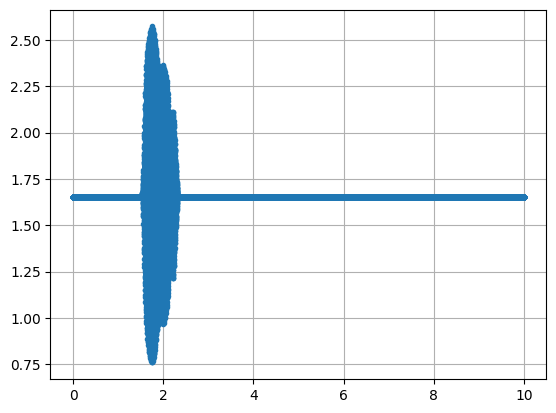

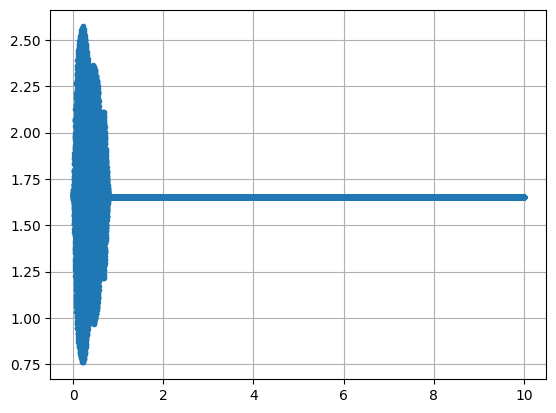

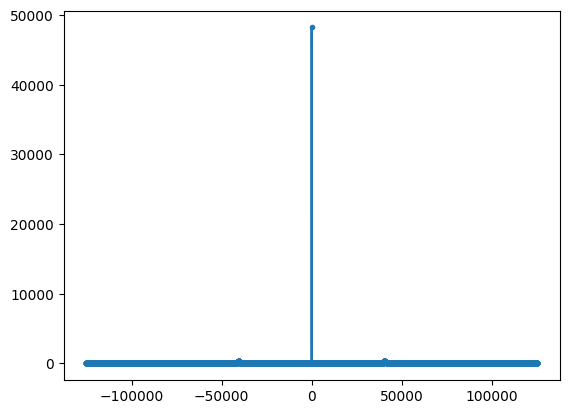

Lower:4490
Upper:6760
(29200,)


In [117]:
#Recieved waveform
v_rx=(x_rx*(3.3/(2^12)))

#Time
S=29200 #Number of samples expected
c = 343 # Speed of sound in air in m/s
timeSample=20/343 #+0.004 # Amount of time sampled for
dt=timeSample/S
t = collect(0:dt:timeSample)[1:S] # t=0:dt:t_max defines a “range”.
r = c*t/2;

Lower=4490
Upper=6760
println("Lower:",4490)
println("Upper:",6760)

chirp=zeros(S)
println(size(chirp))
for n = 1:S
    chirp[n]=1.65
    if n>(Lower-1)&& n < (Upper+1)
        chirp[n]=v_rx[n]
    end
end

#Plot
figure()
plot(r,chirp,".-")
grid("on")
show()

i =0
for n = 1:S
    chirp[n]=1.65
    if n>(Lower-1)&& n < (Upper+1)
        chirp[1+i]=v_rx[n]
        i+=1
    end
end

#Plot
figure()
plot(r,chirp,".-")
grid("on")
show()

N = length(t);
Δf = 1/(N*dt) # spacing in frequency domain
#create array of freq values stored in f_axis. First element maps to 0Hz
if mod(N,2)==0 # case N even
    f_axis = (-N/2:N/2-1)*Δf;
    else # case N odd
    f_axis = (-(N-1)/2 : (N-1)/2)*Δf;
end

CHIRP = fft(chirp)
figure()
plot(f_axis[7300:21900],fftshift(abs.(CHIRP))[7300:21900],".-") 
show()

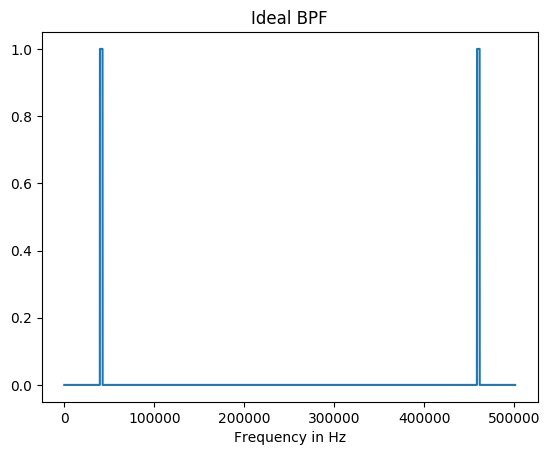

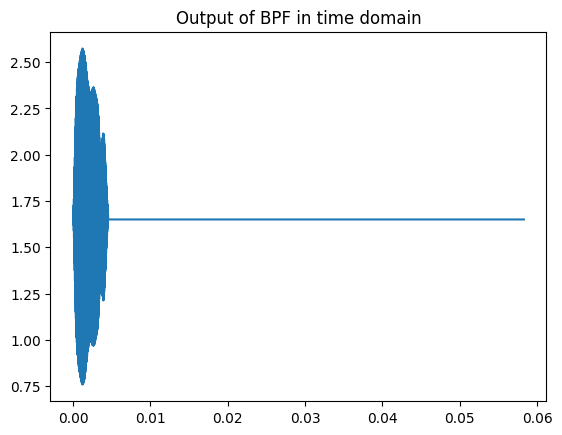

PyObject Text(0.5, 1, 'Output of BPF in time domain')

In [118]:
function rect(t)
    N = length(t)
    x = zeros(N)  # create array of zeros
    for n=1:N
        abs_t = abs(t[n]);    
        if abs_t > 0.5 
            x[n]=0.0
        elseif abs_t < 0.5 
            x[n]=1.0
        else
            x[n]=0.5     # case of t[n] = 0.5 (rising edge) or -0.5 (falling edge) 
        end
    end
    return x

end

Δt=dt
Δω = 2*pi/(N*Δt)   # Sample spacing in freq domain in rad/s

ω = 0:Δω:(N-1)*Δω
f = ω/(2*π)

## Pass square wave through a BPF centred on fundamental ω0
## The BPF is narrow enough only to allow the fundamental component to pass.

ω0=41000*2π

B = 3000 # filter bandwidth in Hz

# In the sampled frequency domain, position two rect() 
# i.e. centred on ω0 rad/s and on 2pi/Δt-ω0 rad/s.

H = rect((ω .- ω0)/(2*π*B)) + rect( (ω .+ (ω0 .- 2*π/Δt) )/(2*π*B) )

figure()
plot(f,H);    # Note, H in this case is purely real.
title("Ideal BPF")
xlabel("Frequency in Hz")



#Y = CHIRP .* H
Y = CHIRP 
y = ifft(Y)   # Transform back to time domain using inverse transform

figure()
plot(t,y)
title("Output of BPF in time domain")

In [119]:
MF = conj(Y);

## Transmit and Sample

In [135]:
#Setup variables
S=29200 #Number of samples expected
c = 343 # Speed of sound in air in m/s
i =1 #data samples recieved
x_rx=zeros(Int16,S) # Samples values recieved
#data=Array{Union{Nothing,String}}(nothing,S)
data=""

# Clear buffer
while (bytesavailable(sp)>0)
    readavailable(sp)
end

# Transmit and Sample command
write(sp,"t") 

while bytesavailable(sp) < 1
    continue # wait for a response    
end  
sleep(0.05) # This extra delay helps with reliability - it gives the micro time to send all it needs to

timeString=readavailable(sp)
timeArray=split(timeString,"\n")

# Get timing information
time = parse(UInt16,timeArray[1])
timeSeconds = time*10^-6
println("Time taken to sample ",timeSeconds, " s")

timeBetweenTransmitAndRecieve = parse(UInt16,timeArray[2])
println("Time between transmitting and receiving ",timeBetweenTransmitAndRecieve, " us")

# Create time and distance arrays
dt=timeSeconds/S # Time per sample
t = collect(0:dt:timeSeconds); # t=0:dt:t_max defines a “range”.
r = c*t/2;

# Clear buffer
while (bytesavailable(sp)>0)
    readavailable(sp)
end

#Grab samples
write(sp,"p") # Print DMA buffer

while bytesavailable(sp) < 1   
    continue # wait for a response    
end 

sleep(0.05)

while true
    if bytesavailable(sp) < 1
        sleep(0.010) # Wait and check again
        if bytesavailable(sp) < 1
            println("Finished Reading")
            break
        end
    end
    data=string(data,readavailable(sp))
    i += 1 
end

samples = split(data,"\r\n")
println("Number of samples received ", size(samples))

x_rx=zeros(Int16,S)
for n in 1:S
    x_rx[n]=parse(UInt16,samples[n])
end

# # Account for time between transmit and recieve
# sampleShift=Int(floor(500000*timeBetweenTransmitAndRecieve*10^-6)) #amount of shifts needed
# println("Shifts ",sampleShift)

# for n in 1:S
#     if (n+sampleShift)<S
#        x_rx[n]= x_rx[n+sampleShift]
#     end
# end

# # Truncate recieved signal
# x_rx=x_rx[1:S-sampleShift]

# Convert ADC output to voltage
v_rx=(x_rx*(3.3/(2^12)))

#Plot
figure()
plot(t[1:S],v_rx,"-")
ylim([0,3.3])
show()

figure()
plot(r[1:S],v_rx,"-")
ylim([0,3.3])
show()

println(size(v_rx))
println(size(t))

Time taken to sample 0.05446700000000002 s
Time between transmitting and receiving 4183 us
Finished Reading
Number of samples received (27784,)


OverflowError: OverflowError: overflow parsing "22702014"

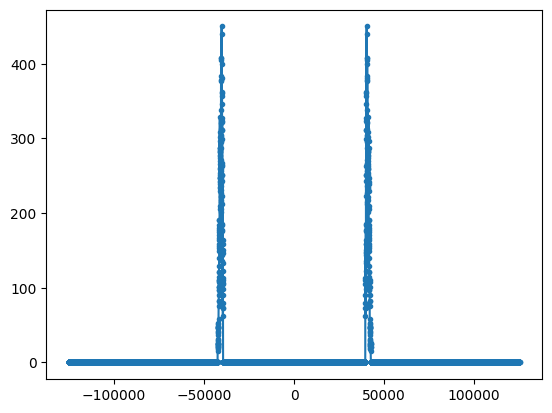

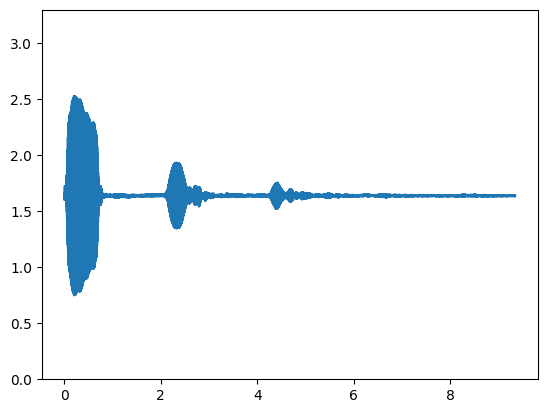

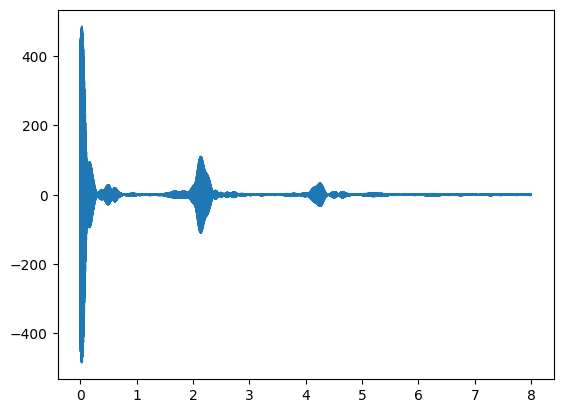

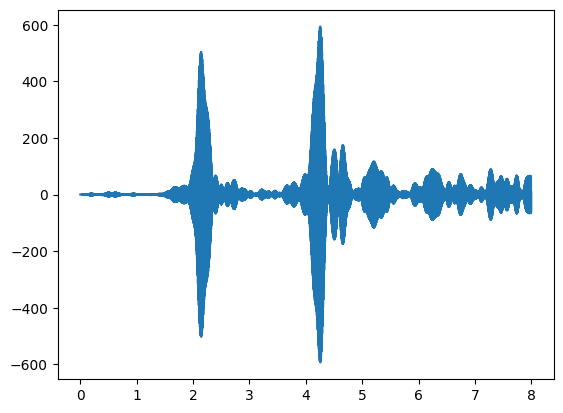

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f3e2e637780>

In [123]:

V_RX = fft(v_rx)

V_RX = V_RX .* H

#v_rx=ifft(V_RX)

figure()
plot(f_axis[7300:21900],fftshift(abs.(V_RX))[7300:21900],".-") 


figure()
plot(r[1:S],v_rx[1:S])
ylim([0,3.3])
show()

V_MF = MF[1:S].*V_RX[1:S];
v_mf = ifft(V_MF[1:S]);


figure()
plot(r[1:25000],v_mf[1:25000])


v_mf=v_mf.*r[1:S].*r[1:S]

figure()
plot(r[1:25000],v_mf[1:25000])

In [85]:
while true
    write(sp,"t") 
    sleep(0.08)
    
end

InterruptException: InterruptException:

In [130]:
print(x_rx)

Int16[2039, 2040, 2036, 2030, 2036, 2040, 2037, 2032, 2034, 2053, 2031, 2044, 2037, 2036, 2028, 2025, 2023, 2027, 2013, 2028, 2037, 2041, 2045, 2044, 2037, 2035, 2032, 2029, 2028, 2024, 2027, 2024, 2036, 2027, 2045, 2038, 2044, 2039, 2039, 2031, 2037, 2014, 2028, 2029, 2028, 2035, 2037, 2040, 2049, 2038, 2045, 2042, 2039, 2036, 2028, 2026, 2025, 2033, 2039, 2044, 2044, 2047, 2043, 2041, 2029, 2060, 2028, 2024, 2024, 2030, 2031, 2046, 2037, 2049, 2052, 2047, 2041, 2041, 2036, 2031, 2013, 2028, 2029, 2035, 2039, 2043, 2044, 2038, 2045, 2043, 2034, 2037, 2032, 2026, 2033, 2021, 2061, 2045, 2048, 2050, 2051, 2043, 2045, 2010, 2033, 2029, 2026, 2032, 2035, 2039, 2050, 2045, 2050, 2052, 2044, 2038, 2032, 2027, 2021, 2022, 2029, 2035, 2042, 2050, 2049, 2052, 2030, 2073, 2040, 2034, 2030, 2028, 2025, 2043, 2023, 2043, 2040, 2048, 2049, 2049, 2046, 2042, 2021, 2027, 2021, 2027, 2030, 2036, 2047, 2050, 2059, 2051, 2044, 2033, 2026, 2013, 2019, 2003, 2041, 2039, 2053, 2062, 2066, 2063, 2063, 2023

, 2306, 2337, 2289, 2173, 2019, 1873, 1757, 1750, 1781, 1893, 2044, 2190, 2294, 2340, 2278, 2184, 2035, 1886, 1769, 1732, 1774, 1886, 2018, 2180, 2287, 2329, 2300, 2195, 2046, 1898, 1784, 1737, 1769, 1867, 2020, 2164, 2281, 2325, 2324, 2207, 2060, 1913, 1792, 1737, 1772, 1840, 2003, 2149, 2266, 2322, 2306, 2212, 2077, 1923, 1809, 1744, 1761, 1848, 1985, 2138, 2257, 2322, 2310, 2222, 2088, 1944, 1810, 1755, 1748, 1864, 1977, 2125, 2251, 2321, 2311, 2241, 2087, 1956, 1829, 1762, 1759, 1836, 1966, 2118, 2235, 2319, 2317, 2240, 2114, 1968, 1840, 1758, 1760, 1823, 1954, 2102, 2235, 2308, 2323, 2241, 2153, 1981, 1847, 1775, 1764, 1820, 1949, 2071, 2222, 2304, 2319, 2258, 2139, 1987, 1856, 1765, 1759, 1818, 1933, 2077, 2210, 2303, 2315, 2267, 2147, 1997, 1866, 1779, 1756, 1818, 1913, 2086, 2201, 2295, 2319, 2272, 2155, 2016, 1865, 1779, 1752, 1799, 1912, 2050, 2192, 2297, 2306, 2276, 2170, 2026, 1889, 1779, 1752, 1787, 1906, 2041, 2182, 2284, 2325, 2283, 2188, 2031, 1907, 1783, 1748, 1784, 18

 2041, 2042, 2043, 2039, 2036, 2033, 2035, 2037, 2038, 2041, 2041, 2042, 2042, 2042, 2044, 2038, 2041, 2040, 2039, 2037, 2033, 2042, 2042, 2045, 2040, 2041, 2042, 2044, 2036, 2035, 2034, 2038, 2038, 2039, 2041, 2043, 2039, 2036, 2036, 2034, 2037, 2038, 2035, 2034, 2038, 2037, 2041, 2046, 2042, 2042, 2043, 2043, 2034, 2039, 2035, 2033, 2038, 2038, 2039, 2040, 2040, 2037, 2037, 2037, 2037, 2036, 2034, 2036, 2034, 2040, 2041, 2043, 2039, 2035, 2035, 2032, 2036, 2036, 2035, 2033, 2037, 2036, 2037, 2035, 2035, 2036, 2033, 2037, 2037, 2037, 2038, 2038, 2037, 2037, 2037, 2036, 2037, 2037, 2037, 2037, 2040, 2038, 2037, 2035, 2033, 2036, 2037, 2034, 2040, 2044, 2041, 2040, 2039, 2039, 2037, 2037, 2036, 2035, 2033, 2038, 2038, 2041, 2042, 2043, 2035, 2037, 2038, 2035, 2032, 2035, 2034, 2038, 2041, 2041, 2043, 2040, 2038, 2037, 2037, 2036, 2035, 2033, 2038, 2039, 2039, 2038, 2039, 2043, 2035, 2031, 2034, 2037, 2037, 2037, 2036, 2034, 2039, 2039, 2039, 2040, 2035, 2032, 2034, 2040, 2039, 2036, 203

, 2040, 2038, 2040, 2040, 2037, 2038, 2038, 2040, 2041, 2041, 2045, 2042, 2044, 2041, 2045, 2037, 2036, 2036, 2034, 2039, 2040, 2041, 2040, 2042, 2042, 2043, 2039, 2037, 2037, 2039, 2037, 2038, 2040, 2041, 2040, 2039, 2038, 2035, 2032, 2038, 2038, 2041, 2041, 2044, 2041, 2039, 2039, 2040, 2039, 2040, 2038, 2040, 2043, 2035, 2033, 2035, 2035, 2035, 2035, 2033, 2037, 2038, 2038, 2040, 2044, 2037, 2035, 2034, 2037, 2038, 2043, 2037, 2039, 2037, 2037, 2038, 2039, 2041, 2039, 2038, 2038, 2039, 2040, 2041, 2040, 2041, 2041, 2041, 2042, 2049, 2043, 2039, 2036, 2036, 2035, 2033, 2038, 2043, 2039, 2038, 2037, 2037, 2043, 2036, 2034, 2037, 2039, 2038, 2041, 2042, 2043, 2039, 2038, 2040, 2045, 2038, 2039, 2037, 2037, 2035, 2036, 2037, 2038, 2037, 2036, 2035, 2033, 2039, 2037, 2038, 2037, 2038, 2040, 2040, 2040, 2041, 2042, 2040, 2039, 2044, 2041, 2037, 2037, 2037, 2038, 2040, 2040, 2042, 2042, 2044, 2041, 2039, 2041, 2040, 2040, 2036, 2036, 2037, 2037, 2039, 2038, 2037, 2036, 2037, 2040, 2039, 20

 2039, 2040, 2044, 2038, 2039, 2038, 2038, 2035, 2037, 2035, 2032, 2037, 2037, 2037, 2038, 2041, 2041, 2043, 2042, 2044, 2043, 2037, 2038, 2040, 2034, 2041, 2040, 2040, 2038, 2040, 2039, 2037, 2037, 2041, 2042, 2042, 2045, 2044, 2040, 2041, 2039, 2038, 2037, 2039, 2036, 2037, 2038, 2037, 2038, 2037, 2041, 2042, 2044, 2041, 2041, 2042, 2045, 2041, 2040, 2040, 2039, 2038, 2036, 2040, 2038, 2038, 2039, 2040, 2042, 2040, 2044, 2040, 2040, 2038, 2039, 2036, 2037, 2038, 2037, 2038, 2038, 2040, 2038, 2042, 2045, 2036, 2040, 2035, 2037, 2038, 2038, 2038, 2039, 2037, 2039, 2039, 2039, 2035, 2033, 2036, 2038, 2037, 2039, 2037, 2037, 2037, 2038, 2038, 2041, 2040, 2039, 2033, 2041, 2041, 2043, 2039, 2039, 2032, 2038, 2039, 2043, 2038, 2037, 2038, 2039, 2038, 2041, 2042, 2043, 2039, 2040, 2039, 2036, 2039, 2037, 2036, 2035, 2035, 2035, 2032, 2035, 2037, 2035, 2033, 2040, 2040, 2033, 2043, 2037, 2037, 2038, 2041, 2039, 2036, 2035, 2034, 2040, 2039, 2041, 2038, 2039, 2040, 2039, 2039, 2033, 2041, 204

, 2037, 2041, 2039, 2037, 2037, 2038, 2039, 2037, 2037, 2036, 2036, 2035, 2034, 2040, 2039, 2037, 2035, 2032, 2035, 2035, 2036, 2034, 2037, 2037, 2036, 2033, 2042, 2041, 2041, 2039, 2040, 2040, 2039, 2035, 2034, 2038, 2037, 2040, 2037, 2039, 2041, 2038, 2037, 2037, 2038, 2040, 2040, 2040, 2039, 2035, 2029, 2036, 2029, 2041, 2036, 2035, 2034, 2038, 2039, 2037, 2035, 2032, 2038, 2040, 2039, 2034, 2038, 2039, 2035, 2037, 2038, 2041, 2039, 2038, 2037, 2033, 2041, 2040, 2038, 2036, 2035, 2034, 2040, 2041, 2041, 2043, 2038, 2039, 2038, 2038, 2035, 2034, 2041, 2040, 2041, 2043, 2038, 2037, 2037, 2038, 2037, 2041, 2040, 2039, 2038, 2038, 2040, 2036, 2037, 2034, 2041, 2039, 2040, 2037, 2036, 2036, 2032, 2037, 2039, 2038, 2037, 2035, 2034, 2038, 2039, 2033, 2038, 2040, 2041, 2042, 2042, 2048, 2042, 2043, 2038, 2039, 2038, 2037, 2036, 2034, 2036, 2035, 2035, 2030, 2035, 2036, 2035, 2036, 2031, 2035, 2031, 2033, 2036, 2036, 2037, 2038, 2038, 2040, 2041, 2039, 2036, 2037, 2033, 2040, 2041, 2040, 20

 2039, 2037, 2039, 2037, 2037, 2039, 2036, 2034, 2039, 2038, 2037, 2039, 2038, 2042, 2042, 2045, 2040, 2038, 2040, 2039, 2041, 2041, 2036, 2039, 2038, 2039, 2037, 2039, 2038, 2037, 2043, 2033, 2035, 2034, 2038, 2037, 2039, 2039, 2038, 2038, 2040, 2039, 2040, 2041, 2046, 2041, 2040, 2038, 2039, 2037, 2040, 2038, 2040, 2039, 2039, 2038, 2040, 2040, 2038, 2037, 2038, 2039, 2039, 2038, 2041, 2042, 2043, 2038, 2038, 2036, 2039, 2036, 2035, 2033, 2040, 2037, 2037, 2041, 2036, 2036, 2036, 2034, 2038, 2037, 2038, 2040, 2041, 2041, 2042, 2042, 2044, 2041, 2036, 2040, 2040, 2037, 2037, 2038, 2039, 2038, 2037, 2039, 2038, 2039, 2039, 2038, 2039, 2037, 2035, 2036, 2035, 2035, 2033, 2036, 2036, 2035, 2035, 2033, 2036, 2039, 2036, 2033, 2037, 2037, 2038, 2040, 2038, 2039, 2036, 2037, 2037, 2037, 2038, 2037, 2038, 2039, 2039, 2039, 2039, 2038, 2037, 2040, 2038, 2039, 2035, 2034, 2037, 2036, 2036, 2037, 2036, 2037, 2038, 2037, 2037, 2037, 2037, 2037, 2034, 2039, 2037, 2038, 2035, 2037, 2037, 2037, 203

, 2038, 2037, 2036, 2039, 2037, 2040, 2039, 2039, 2037, 2038, 2039, 2039, 2044, 2036, 2036, 2035, 2034, 2042, 2041, 2041, 2042, 2044, 2038, 2042, 2043, 2039, 2038, 2038, 2040, 2041, 2041, 2043, 2035, 2036, 2036, 2035, 2033, 2039, 2036, 2035, 2034, 2035, 2037, 2038, 2039, 2038, 2039, 2039, 2041, 2043, 2041, 2038, 2037, 2035, 2034, 2042, 2043, 2037, 2039, 2035, 2038, 2040, 2045, 2038, 2040, 2040, 2041, 2044, 2038, 2039, 2039, 2038, 2037, 2038, 2038, 2038, 2038, 2032, 2040, 2041, 2043, 2041, 2040, 2038, 2040, 2040, 2040, 2047, 2039, 2036, 2035, 2034, 2041, 2043, 2037, 2037, 2038, 2038, 2041, 2043, 2040, 2041, 2040, 2041, 2041, 2043, 2037, 2037, 2038, 2036, 2037, 2038, 2043, 2035, 2032, 2035, 2035, 2035, 2037, 2033, 2040, 2039, 2039, 2039, 2035, 2034, 2039, 2036, 2036, 2037, 2038, 2038, 2038, 2041, 2039, 2040, 2040, 2041, 2042, 2041, 2043, 2038, 2041, 2042, 2044, 2038, 2039, 2037, 2037, 2037, 2038, 2039, 2039, 2038, 2040, 2041, 2043, 2039, 2037, 2034, 2041, 2038, 2044, 2036, 2035, 2036, 20

 2040, 2039, 2038, 2037, 2032, 2039, 2037, 2037, 2039, 2038, 2040, 2038, 2037, 2037, 2037, 2037, 2039, 2038, 2038, 2038, 2040, 2040, 2040, 2039, 2038, 2038, 2038, 2039, 2037, 2037, 2039, 2038, 2037, 2036, 2037, 2036, 2038, 2037, 2037, 2041, 2039, 2039, 2038, 2040, 2040, 2037, 2037, 2037, 2043, 2036, 2038, 2037, 2038, 2039, 2038, 2036, 2036, 2029, 2033, 2037, 2038, 2042, 2043, 2037, 2038, 2036, 2035, 2036, 2036, 2033, 2035, 2037, 2037, 2038, 2038, 2038, 2038, 2041, 2040, 2039, 2034, 2041, 2041, 2043, 2039, 2038, 2039, 2040, 2040, 2039, 2038, 2038, 2044, 2038, 2035, 2033, 2038, 2039, 2038, 2038, 2039, 2037, 2037, 2037, 2036, 2039, 2034, 2040, 2038, 2042, 2044, 2038, 2041, 2042, 2042, 2044, 2041, 2045, 2041, 2040, 2037, 2039, 2039, 2036, 2036, 2038, 2038, 2037, 2039, 2036, 2037, 2037, 2037, 2042, 2041, 2043, 2039, 2038, 2040, 2038, 2039, 2039, 2039, 2039, 2037, 2037, 2038, 2039, 2040, 2036, 2034, 2040, 2039, 2039, 2037, 2042, 2041, 2042, 2041, 2042, 2042, 2044, 2042, 2043, 2039, 2038, 204

, 2037, 2037, 2037, 2038, 2039, 2038, 2038, 2041, 2039, 2037, 2044, 2035, 2036, 2032, 2036, 2035, 2034, 2041, 2041, 2041, 2038, 2040, 2041, 2040, 2035, 2036, 2036, 2035, 2035, 2031, 2037, 2035, 2035, 2035, 2030, 2038, 2035, 2035, 2033, 2036, 2036, 2033, 2037, 2038, 2038, 2039, 2035, 2038, 2038, 2037, 2037, 2038, 2038, 2041, 2043, 2034, 2043, 2036, 2035, 2033, 2039, 2034, 2039, 2038, 2039, 2038, 2039, 2041, 2042, 2039, 2040, 2038, 2042, 2041, 2041, 2040, 2040, 2037, 2040, 2037, 2037, 2037, 2038, 2039, 2037, 2042, 2045, 2041, 2041, 2041, 2041, 2041, 2041, 2042, 2043, 2040, 2039, 2038, 2040, 2038, 2038, 2039, 2037, 2038, 2041, 2042, 2043, 2040, 2037, 2038, 2041, 2039, 2038, 2038, 2040, 2042, 2042, 2044, 2037, 2040, 2039, 2037, 2041, 2043, 2038, 2037, 2036, 2036, 2037, 2035, 2035, 2033, 2036, 2034, 2035, 2039, 2037, 2036, 2033, 2039, 2040, 2034, 2043, 2039, 2037, 2037, 2037, 2037, 2036, 2035, 2034, 2037, 2037, 2037, 2038, 2039, 2039, 2039, 2039, 2038, 2039, 2038, 2038, 2039, 2038, 2038, 20

 2041, 2041, 2042, 2047, 2043, 2037, 2037, 2036, 2035, 2034, 2037, 2038, 2037, 2039, 2037, 2036, 2042, 2042, 2043, 2039, 2039, 2039, 2041, 2039, 2037, 2036, 2036, 2035, 2034, 2037, 2037, 2038, 2039, 2038, 2042, 2042, 2045, 2042, 2043, 2042, 2043, 2038, 2038, 2038, 2038, 2040, 2041, 2042, 2043, 2038, 2040, 2039, 2036, 2040, 2039, 2037, 2038, 2040, 2041, 2043, 2039, 2038, 2037, 2038, 2040, 2034, 2044, 2041, 2042, 2041, 2045, 2043, 2039, 2039, 2037, 2037, 2037, 2036, 2035, 2037, 2037, 2037, 2039, 2038, 2039, 2039, 2041, 2039, 2039, 2038, 2039, 2038, 2039, 2041, 2036, 2038, 2040, 2040, 2041, 2041, 2042, 2043, 2039, 2038, 2039, 2038, 2038, 2041, 2042, 2044, 2041, 2043, 2038, 2039, 2034, 2033, 2045, 2037, 2040, 2037, 2040, 2041, 2042, 2044, 2037, 2040, 2038, 2038, 2042, 2044, 2040, 2035, 2036, 2036, 2036, 2036, 2035, 2033, 2036, 2034, 2038, 2041, 2038, 2040, 2040, 2039, 2038, 2037, 2040, 2040, 2039, 2038, 2038, 2042, 2040, 2042, 2039, 2039, 2038, 2040, 2038, 2041, 2043, 2037, 2036, 2031, 203

, 2037, 2038, 2039, 2038, 2037, 2037, 2040, 2039, 2038, 2039, 2038, 2039, 2037, 2037, 2040, 2040, 2038, 2040, 2040, 2040, 2040, 2039, 2036, 2034, 2038, 2039, 2038, 2037, 2039, 2038, 2039, 2038, 2039, 2037, 2040, 2036, 2034, 2038, 2041, 2041, 2044, 2040, 2040, 2042, 2042, 2039, 2039, 2039, 2037, 2036, 2037, 2039, 2037, 2039, 2038, 2037, 2038, 2038, 2038, 2039, 2038, 2038, 2038, 2039, 2038, 2040, 2038, 2039, 2039, 2039, 2038, 2038, 2040, 2039, 2038, 2037, 2039, 2039, 2037, 2039, 2038, 2041, 2040, 2040, 2042, 2041, 2040, 2041, 2042, 2043, 2039, 2037, 2037, 2040, 2039, 2038, 2041, 2043, 2036, 2035, 2035, 2033, 2037, 2034, 2042, 2043, 2038, 2039, 2036, 2037, 2034, 2038, 2038, 2040, 2040, 2041, 2042, 2042, 2043, 2037, 2039, 2037, 2034, 2039, 2039, 2037, 2040, 2038, 2036, 2037, 2039, 2038, 2037, 2044, 2038, 2037, 2034, 2041, 2043, 2039, 2038, 2039, 2038, 2039, 2040, 2039, 2036, 2036, 2034, 2039, 2038, 2039, 2037, 2038, 2040, 2039, 2040, 2040, 2041, 2041, 2041, 2040, 2038, 2037, 2043, 2040, 20

 2036, 2038, 2039, 2037, 2036, 2032, 2037, 2037, 2038, 2036, 2033, 2038, 2038, 2041, 2042, 2043, 2033, 2034, 2041, 2044, 2041, 2040, 2040, 2038, 2040, 2039, 2035, 2035, 2034, 2036, 2037, 2038, 2039, 2038, 2036, 2036, 2035, 2034, 2039, 2038, 2038, 2039, 2036, 2037, 2036, 2034, 2040, 2039, 2037, 2036, 2034, 2041, 2042, 2041, 2041, 2042, 2044, 2041, 2039, 2040, 2037, 2038, 2036, 2037, 2036, 2036, 2033, 2037, 2037, 2037, 2036, 2036, 2035, 2035, 2032, 2038, 2038, 2037, 2039, 2036, 2035, 2035, 2031, 2034, 2038, 2038, 2038, 2039, 2038, 2038, 2038, 2037, 2039, 2039, 2033, 2040, 2037, 2039, 2037, 2036, 2037, 2038, 2036, 2039, 2036, 2034, 2038, 2040, 2041, 2039, 2039, 2038, 2038, 2040, 2041, 2039, 2038, 2038, 2039, 2040, 2040, 2039, 2043, 2041, 2037, 2041, 2043, 2037, 2035, 2034, 2039, 2037, 2037, 2037, 2039, 2037, 2036, 2035, 2031, 2038, 2036, 2033, 2038, 2039, 2037, 2039, 2037, 2037, 2038, 2037, 2038, 2043, 2038, 2037, 2037, 2039, 2037, 2037, 2035, 2035, 2034, 2039, 2039, 2036, 2036, 2036, 203

, 2041, 2044, 2038, 2038, 2040, 2039, 2039, 2039, 2039, 2035, 2033, 2040, 2038, 2041, 2042, 2041, 2044, 2041, 2038, 2040, 2042, 2037, 2037, 2038, 2039, 2037, 2038, 2038, 2040, 2038, 2037, 2039, 2039, 2037, 2036, 2035, 2034, 2044, 2038, 2038, 2039, 2038, 2038, 2038, 2037, 2039, 2034, 2039, 2038, 2041, 2041, 2043, 2037, 2036, 2035, 2035, 2035, 2033, 2038, 2037, 2036, 2038, 2037, 2039, 2038, 2038, 2035, 2036, 2036, 2033, 2041, 2037, 2038, 2038, 2041, 2041, 2040, 2042, 2043, 2038, 2036, 2038, 2035, 2034, 2037, 2035, 2035, 2033, 2040, 2039, 2038, 2038, 2037, 2035, 2035, 2033, 2035, 2037, 2037, 2038, 2039, 2039, 2037, 2037, 2037, 2036, 2037, 2037, 2037, 2036, 2034, 2038, 2041, 2043, 2038, 2038, 2039, 2036, 2037, 2037, 2039, 2035, 2033, 2038, 2037, 2039, 2040, 2038, 2038, 2038, 2038, 2040, 2041, 2039, 2038, 2039, 2038, 2036, 2037, 2038, 2035, 2036, 2035, 2033, 2036, 2038, 2037, 2033, 2038, 2038, 2040, 2042, 2042, 2042, 2044, 2039, 2041, 2039, 2037, 2034, 2038, 2040, 2039, 2041, 2041, 2042, 20

 2042, 2043, 2039, 2037, 2038, 2040, 2040, 2041, 2043, 2038, 2038, 2039, 2038, 2043, 2035, 2035, 2032, 2037, 2040, 2040, 2040, 2041, 2041, 2044, 2040, 2043, 2036, 2036, 2035, 2035, 2035, 2035, 2034, 2038, 2041, 2041, 2040, 2041, 2043, 2037, 2038, 2040, 2039, 2040, 2038, 2039, 2039, 2038, 2039, 2038, 2039, 2038, 2039, 2038, 2040, 2038, 2042, 2042, 2042, 2045, 2040, 2042, 2043, 2041, 2041, 2042, 2043, 2041, 2042, 2043, 2039, 2039, 2039, 2039, 2037, 2041, 2038, 2037, 2038, 2040, 2042, 2043, 2039, 2038, 2038, 2039, 2037, 2041, 2040, 2040, 2036, 2039, 2038, 2039, 2041, 2039, 2039, 2039, 2039, 2039, 2034, 2039, 2039, 2038, 2040, 2040, 2039, 2040, 2040, 2039, 2034, 2041, 2042, 2044, 2041, 2039, 2039, 2038, 2041, 2042, 2043, 2039, 2040, 2040, 2039, 2043, 2037, 2035, 2033, 2037, 2038, 2037, 2039, 2036, 2037, 2040, 2038, 2041, 2042, 2040, 2039, 2041, 2041, 2041, 2043, 2041, 2040, 2040, 2041, 2043, 2043, 2035, 2033, 2038, 2037, 2043, 2035, 2035, 2037, 2035, 2035, 2032, 2037, 2035, 2033, 2037, 203

, 2039, 2039, 2039, 2039, 2037, 2039, 2039, 2036, 2035, 2032, 2037, 2037, 2037, 2037, 2038, 2038, 2039, 2036, 2038, 2039, 2036, 2036, 2035, 2035, 2035, 2032, 2036, 2035, 2035, 2035, 2036, 2033, 2035, 2035, 2033, 2038, 2038, 2039, 2039, 2037, 2037, 2037, 2037, 2039, 2038, 2040, 2040, 2041, 2041, 2040, 2040, 2039, 2038, 2039, 2039, 2040, 2038, 2039, 2042, 2039, 2041, 2040, 2040, 2040, 2040, 2043, 2036, 2035, 2034, 2038, 2038, 2038, 2039, 2037, 2037, 2039, 2038, 2038, 2042, 2043, 2039, 2038, 2036, 2036, 2034, 2040, 2041, 2043, 2039, 2038, 2039, 2038, 2038, 2044, 2042, 2038, 2039, 2036, 2036, 2038, 2041, 2040, 2036, 2037, 2038, 2039, 2039, 2037, 2039, 2037, 2036, 2038, 2040, 2041, 2041, 2043, 2038, 2039, 2044, 2036, 2036, 2035, 2036, 2032, 2037, 2037, 2036, 2037, 2035, 2036, 2038, 2038, 2036, 2036, 2036, 2035, 2034, 2039, 2040, 2042, 2043, 2039, 2038, 2041, 2041, 2039, 2038, 2041, 2041, 2041, 2045, 2041, 2040, 2042, 2043, 2040, 2037, 2038, 2037, 2039, 2039, 2040, 2039, 2040, 2039, 2037, 20

 2038, 2037, 2037, 2037, 2038, 2039, 2038, 2039, 2037, 2037, 2037, 2039, 2037, 2035, 2035, 2032, 2037, 2039, 2037, 2037, 2038, 2038, 2036, 2036, 2037, 2036, 2034, 2039, 2040, 2040, 2040, 2038, 2039, 2037, 2039, 2038, 2040, 2037, 2038, 2038, 2034, 2042, 2042, 2044, 2041, 2041, 2042, 2043, 2036, 2037, 2037, 2035, 2034, 2037, 2040, 2040, 2038, 2039, 2037, 2035, 2036, 2036, 2036, 2033, 2037, 2037, 2038, 2039, 2037, 2038, 2038, 2039, 2036, 2037, 2037, 2036, 2034, 2038, 2039, 2036, 2040, 2039, 2036, 2035, 2033, 2038, 2039, 2037, 2034, 2037, 2040, 2039, 2042, 2041, 2041, 2041, 2041, 2040, 2041, 2041, 2046, 2042, 2042, 2043, 2040, 2039, 2040, 2038, 2040, 2040, 2038, 2042, 2043, 2039, 2036, 2036, 2035, 2035, 2033, 2037, 2036, 2037, 2036, 2034, 2041, 2040, 2040, 2042, 2042, 2042, 2044, 2041, 2041, 2041, 2042, 2043, 2038, 2039, 2037, 2036, 2037, 2036, 2037, 2038, 2040, 2038, 2040, 2038, 2039, 2039, 2037, 2036, 2035, 2031, 2035, 2034, 2037, 2038, 2038, 2038, 2038, 2042, 2041, 2042, 2044, 2039, 204

, 2040, 2040, 2038, 2038, 2040, 2040, 2039, 2038, 2039, 2040, 2037, 2040, 2040, 2039, 2038, 2039, 2038, 2041, 2039, 2041, 2042, 2043, 2041, 2041, 2043, 2037, 2038, 2038, 2039, 2037, 2041, 2041, 2043, 2040, 2039, 2036, 2039, 2037, 2037, 2036, 2037, 2035, 2035, 2034, 2038, 2040, 2040, 2040, 2039, 2039, 2038, 2038, 2039, 2038, 2040, 2040, 2036, 2036, 2036, 2036, 2037, 2037, 2039, 2038, 2037, 2038, 2039, 2040, 2038, 2040, 2038, 2042, 2043, 2040, 2041, 2040, 2040, 2037, 2039, 2040, 2037, 2037, 2037, 2040, 2039, 2038, 2039, 2039, 2034, 2039, 2039, 2037, 2039, 2036, 2037, 2037, 2039, 2038, 2035, 2034, 2040, 2040, 2040, 2037, 2039, 2038, 2040, 2041, 2042, 2044, 2039, 2039, 2039, 2039, 2037, 2036, 2036, 2035, 2031, 2035, 2034, 2038, 2040, 2038, 2041, 2042, 2044, 2041, 2042, 2044, 2039, 2038, 2040, 2040, 2040, 2041, 2041, 2042, 2043, 2038, 2039, 2038, 2039, 2038, 2038, 2038, 2040, 2039, 2037, 2034, 2041, 2042, 2043, 2038, 2040, 2038, 2037, 2039, 2040, 2040, 2040, 2039, 2035, 2037, 2037, 2037, 20